# 데이터 분석

## 1. 골드 이후 티어별 Top 200 플레이어 분석 

- 분석용 데이터 정제

In [ ]:
import pandas as pd
from scipy.stats import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ace_tools_open as tools
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
df_ranker_info = pd.read_csv('ranker_info.csv')

In [ ]:
import re

def extract_numbers(text):
    return "".join(re.findall(r"\d+", str(text))) 

df_ranker_info["게임횟수"] = df_ranker_info["게임횟수"].apply(extract_numbers)
df_ranker_info["승률"] = df_ranker_info["승률"].apply(extract_numbers)

df_ranker_info

,티어,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
0,platinum,초현식근동이물 #KR1,제드,17,41,미드,27
1,platinum,매우라 #5838,아크샨,5,80,미드,6
2,platinum,Dancin #kr2,이즈리얼,4,75,원딜,7
3,platinum,Namy000n #5111,제드,10,80,미드,10
4,platinum,Fly over you #wing,빅토르,6,67,원딜,17
...,...,...,...,...,...,...,...
1194,challenger,Chu성훈 #KR1,카르마,52,60,서폿,146
1195,challenger,The Herta #Hokai,판테온,115,56,탑,129
1196,challenger,렝 화 #렝 화,렝가,95,59,탑,109
1197,challenger,kfo #KR1,블라디미르,259,56,탑,506


In [ ]:
df_ranker_info['게임횟수'] = df_ranker_info['게임횟수'].astype(int)
df_ranker_info['승률'] = df_ranker_info['승률'].astype(int)

In [ ]:
tier_p = df_ranker_info[df_ranker_info['티어'] == 'platinum']
tier_e = df_ranker_info[df_ranker_info['티어'] == 'emerald']
tier_d = df_ranker_info[df_ranker_info['티어'] == 'diamond']
tier_m = df_ranker_info[df_ranker_info['티어'] == 'master']
tier_g = df_ranker_info[df_ranker_info['티어'] == 'grandmaster']
tier_c = df_ranker_info[df_ranker_info['티어'] == 'challenger']

In [ ]:
tier_e = tier_e.reset_index()
tier_d = tier_d.reset_index()
tier_m = tier_m.reset_index()
tier_g = tier_g.reset_index()
tier_c = tier_c.reset_index()

In [ ]:
tier_e = tier_e.drop(columns='index')
tier_d = tier_d.drop(columns='index')
tier_m = tier_m.drop(columns='index')
tier_g = tier_g.drop(columns='index')
tier_c = tier_c.drop(columns='index')

In [ ]:
tier_p['rank'] = tier_p.index + 1
tier_e['rank'] = tier_e.index + 1
tier_d['rank'] = tier_d.index + 1
tier_m['rank'] = tier_m.index + 1
tier_g['rank'] = tier_g.index + 1
tier_c['rank'] = tier_c.index + 1

In [ ]:
tier_col = ['티어','rank','닉네임','주챔피언','게임횟수','승률','포지션','포지션게임횟수']

tier_p = tier_p[tier_col]
tier_e = tier_e[tier_col]
tier_d = tier_d[tier_col]
tier_m = tier_m[tier_col]
tier_g = tier_g[tier_col]
tier_c = tier_c[tier_col]

### 1. Platinum 티어
- 단변량분석

In [ ]:
tier_p['주챔피언'].value_counts()

주챔피언
이즈리얼      18
리 신       14
제이스        6
비에고        6
요네         5
          ..
오리아나       1
블리츠크랭크     1
암베사        1
레오나        1
코르키        1
Name: count, Length: 86, dtype: int64

In [ ]:
tier_p['포지션'].value_counts()

포지션
정글    46
원딜    43
미드    42
탑     35
서폿    34
Name: count, dtype: int64

In [ ]:
tier_p.describe()

,게임횟수,승률,포지션게임횟수
count,200.000000,200.000000,200.000000
mean,18.545000,62.410000,35.585000
std,33.042655,23.339571,42.800493
min,1.000000,0.000000,2.000000
25%,3.000000,50.000000,8.000000
50%,8.000000,60.500000,20.000000
75%,21.000000,75.000000,46.750000
max,287.000000,100.000000,290.000000


In [ ]:
tier_p.describe(include=object)

,티어,닉네임,주챔피언,포지션
count,200,200,200,200
unique,1,200,86,5
top,platinum,초현식근동이물 #KR1,이즈리얼,정글
freq,200,1,18,46


In [ ]:
tier_p.sort_values('게임횟수',ascending=False)

,티어,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
10,platinum,鏡花水月 #白 豹,소라카,287,49,서폿,290
158,platinum,혜연언니 #1004,유미,211,55,서폿,250
111,platinum,교향곡 9번 #베토벤,카직스,197,55,정글,199
5,platinum,응우엔 #땅 굴,세트,113,59,탑,120
161,platinum,닉네임is뭔들 #5153,니코,104,57,서폿,94
...,...,...,...,...,...,...,...
187,platinum,청 순 #KR3,라이즈,1,100,미드,3
191,platinum,땅 콩 #작 콩,레오나,1,100,서폿,5
192,platinum,탄산당근오이 #KR1,미스 포츈,1,0,원딜,4
195,platinum,마산사는김영준 #KR1,블라디미르,1,100,탑,4


In [ ]:
tier_p.sort_values('승률',ascending=False)

,티어,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
41,platinum,라 만 #KR1,징크스,2,100,원딜,5
42,platinum,LGnS1WFbey #KR1,르블랑,4,100,미드,8
47,platinum,질량 X 가속도 #KR1,빅토르,3,100,미드,6
34,platinum,수 아 #625,이즈리얼,2,100,원딜,3
19,platinum,황색비둘기 #KR1,징크스,4,100,원딜,7
...,...,...,...,...,...,...,...
76,platinum,칠색조 #하트골드,알리스타,1,0,서폿,8
154,platinum,kaIi #KR1,르블랑,2,0,미드,9
184,platinum,랍스터소울펀치 #lsp,블리츠크랭크,1,0,서폿,5
192,platinum,탄산당근오이 #KR1,미스 포츈,1,0,원딜,4


In [ ]:
tier_p.sort_values('포지션게임횟수',ascending=False)

,티어,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
10,platinum,鏡花水月 #白 豹,소라카,287,49,서폿,290
158,platinum,혜연언니 #1004,유미,211,55,서폿,250
183,platinum,avoid the rush #KR1,리 신,94,49,정글,220
111,platinum,교향곡 9번 #베토벤,카직스,197,55,정글,199
144,platinum,김명운 #문희준,릴리아,33,76,정글,140
...,...,...,...,...,...,...,...
187,platinum,청 순 #KR3,라이즈,1,100,미드,3
197,platinum,칙 칙 #1113,오공,1,0,정글,3
193,platinum,Page Up #000,코르키,2,100,원딜,3
196,platinum,너네가 뭘 알아 #뭘아냐고,카타리나,3,67,미드,3


In [ ]:
tier_p[tier_p['주챔피언'] == '이즈리얼']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
2,platinum,3,Dancin #kr2,이즈리얼,4,75,원딜,7
20,platinum,21,Viper #asdkq,이즈리얼,5,40,원딜,19
25,platinum,26,Blue #KR7,이즈리얼,5,80,정글,12
34,platinum,35,수 아 #625,이즈리얼,2,100,원딜,3
46,platinum,47,부드러운치즈 #8931,이즈리얼,5,80,원딜,28
50,platinum,51,악성버니즈 #NJS,이즈리얼,5,80,원딜,9
58,platinum,59,행복이란무엇일카 #KR1,이즈리얼,21,57,원딜,39
77,platinum,78,나무같은인생 #KR1,이즈리얼,8,63,원딜,21
87,platinum,88,사미라 #KR40,이즈리얼,2,50,원딜,7
104,platinum,105,백춘삼 #1104,이즈리얼,6,67,원딜,28


In [ ]:
tier_p[tier_p['주챔피언'] == '리 신']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
17,platinum,18,뱍치기굥룡 #777,리 신,11,64,정글,32
31,platinum,32,미워도 다시 한번 #KR02,리 신,19,68,미드,45
35,platinum,36,난 최선을 다했어 #123,리 신,3,67,정글,5
48,platinum,49,코푸는푸 #KR1,리 신,38,55,정글,60
67,platinum,68,테런악신 #KR1,리 신,10,60,정글,35
75,platinum,76,천호동바위게 #qwer,리 신,33,52,정글,57
100,platinum,101,dmstp7270 #KR1,리 신,8,75,탑,61
107,platinum,108,김선아 #증산미시,리 신,2,100,정글,9
109,platinum,110,배봉초 득점왕 진하민 #Jin10,리 신,58,60,정글,90
121,platinum,122,Violet Mid #0926,리 신,32,72,정글,86


In [ ]:
tier_p[tier_p['주챔피언'] == '제이스']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
63,platinum,64,Koooo #KR1,제이스,3,33,정글,5
84,platinum,85,십팔새 #KR1,제이스,20,45,탑,57
89,platinum,90,Retro #00255,제이스,7,71,탑,14
117,platinum,118,안상구 #손장애,제이스,16,75,미드,29
130,platinum,131,상체게임가자 #KR1,제이스,4,25,탑,12
168,platinum,169,김유연 #이쁘덩,제이스,3,67,탑,6


In [ ]:
tier_p[tier_p['주챔피언'] == '비에고']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
57,platinum,58,빙 수 #0710,비에고,3,100,정글,7
102,platinum,103,쏭카페 #1194,비에고,3,67,정글,11
136,platinum,137,뽈롤롤롤 #ddd,비에고,19,42,원딜,82
143,platinum,144,단 아 #단아하다,비에고,17,59,정글,92
165,platinum,166,박적산 #KR1,비에고,21,48,정글,43
198,platinum,199,나한테붙으라고 #정글서폿,비에고,3,33,정글,4


In [ ]:
tier_p[tier_p['주챔피언'] == '요네']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
21,platinum,22,제우스 #전기공학과,요네,22,32,정글,53
150,platinum,151,밴달팬피그 #kor,요네,6,50,미드,28
153,platinum,154,끝나지않는여름우린죽어도사랑했다 #청 춘,요네,22,41,원딜,86
170,platinum,171,rlawnsgh #저지 불가,요네,10,60,미드,55
173,platinum,174,GIST #KR1,요네,27,44,미드,67


In [ ]:
# 정규성검증
print(f'게임횟수 : {shapiro(tier_p['게임횟수'])[1]}')
print(f'포지션게임횟수 : {shapiro(tier_p['포지션게임횟수'])[1]}')
print(f'승률 : {shapiro(tier_p['승률'])[1]}')

게임횟수 : 9.422223549038853e-24
포지션게임횟수 : 1.5473810577858923e-18
승률 : 4.970487951515639e-07


- 단변량 분석 정리 : <br><br>

플래티넘 티어 랭킹 200위에서 <br>
- 가장 많이 플레이하는 주챔피언 Top5 : 이즈리얼(원딜), 리신(정글), 제이스(탑), 비에고(정글), 요네(미드)<br>
- 가장 많이 플레이하는 라인 순서 : 정글 > 원딜 > 미드 > 탑 > 서폿 <br>
- 게임횟수 : 평균 18.5회이나 max값이 너무 큰 경우가 있음. 게임횟수 많은순으로 정렬한 결과, 순위와는 큰 연관이 없을 것으로 예상. <br>
- 승률 : 평균 62.41%. 승률이 높은 순으로 정렬한 결과, 게임횟수와 연관이 있을 가능성 높음. (게임횟수가 적으면 승률이 100이거나 0일 수 있음) <br>
- 포지션게임횟수 : 해당 라인에서 플레이한 횟수로, 평균 35회. 게임횟수와 연관이 있을 것으로 예상되며 순위와는 큰 연관이 없을 것으로 예상 <br><br>
- 게임횟수와 포지션게임횟수 승률 모두 정규성 보이지 않음


- 다변량 분석
    - 연속형 변수간의 상관관계 분석

In [ ]:
tier_p.groupby(['게임횟수', '승률'])['승률'].count()

게임횟수  승률 
1     0       5
      100     8
2     0       2
      50      5
      100    13
3     33      3
      67     12
      100     3
4     25      2
      50      3
      75      5
      100     3
5     20      1
      40      1
      80      9
      100     1
6     17      1
      33      2
      50      2
      67      5
      100     2
7     29      1
      43      2
      57      1
      71      2
      100     2
8     38      2
      50      3
      63      4
      75      2
9     56      3
      67      2
      78      1
10    30      1
      40      1
      60      2
      80      1
11    27      1
      64      1
12    58      1
      75      4
13    46      1
      62      1
14    50      1
      57      1
      64      1
      71      1
      79      1
16    50      1
      75      1
17    41      1
      47      1
      53      1
      59      2
18    61      1
      72      1
19    42      1
      53      1
      58      1
      68      1
      79      1
20    45      

In [ ]:
tier_p.groupby(['rank', '게임횟수'])['게임횟수'].count()

rank  게임횟수
1     17      1
2     5       1
3     4       1
4     10      1
5     6       1
6     113     1
7     19      1
8     3       1
9     17      1
10    5       1
11    287     1
12    61      1
13    12      1
14    14      1
15    1       1
16    9       1
17    3       1
18    11      1
19    1       1
20    4       1
21    5       1
22    22      1
23    5       1
24    1       1
25    9       1
26    5       1
27    37      1
28    5       1
29    39      1
30    8       1
31    1       1
32    19      1
33    17      1
34    9       1
35    2       1
36    3       1
37    6       1
38    9       1
39    8       1
40    11      1
41    30      1
42    2       1
43    4       1
44    6       1
45    4       1
46    2       1
47    5       1
48    3       1
49    38      1
50    2       1
51    5       1
52    5       1
53    8       1
54    51      1
55    6       1
56    10      1
57    25      1
58    3       1
59    21      1
60    6       1
61    33      1
62    7      

In [ ]:
tier_p.groupby(['rank', '포지션게임횟수'])['rank'].count()

rank  포지션게임횟수
1     27         1
2     6          1
3     7          1
4     10         1
5     17         1
6     120        1
7     26         1
8     9          1
9     65         1
10    7          1
11    290        1
12    128        1
13    19         1
14    21         1
15    9          1
16    20         1
17    11         1
18    32         1
19    4          1
20    7          1
21    19         1
22    53         1
23    8          1
24    5          1
25    13         1
26    12         1
27    44         1
28    17         1
29    111        1
30    30         1
31    5          1
32    45         1
33    33         1
34    9          1
35    3          1
36    5          1
37    11         1
38    30         1
39    8          1
40    49         1
41    32         1
42    5          1
43    8          1
44    18         1
45    7          1
46    9          1
47    28         1
48    6          1
49    60         1
50    9          1
51    9          1
52    8          

In [ ]:
tier_p.groupby(['rank', '승률'])['승률'].count()

rank  승률 
1     41     1
2     80     1
3     75     1
4     80     1
5     67     1
6     59     1
7     79     1
8     67     1
9     59     1
10    80     1
11    49     1
12    69     1
13    75     1
14    71     1
15    100    1
16    78     1
17    67     1
18    64     1
19    100    1
20    100    1
21    40     1
22    32     1
23    80     1
24    100    1
25    56     1
26    80     1
27    49     1
28    20     1
29    46     1
30    38     1
31    0      1
32    68     1
33    53     1
34    67     1
35    100    1
36    67     1
37    67     1
38    56     1
39    50     1
40    27     1
41    70     1
42    100    1
43    100    1
44    33     1
45    50     1
46    100    1
47    80     1
48    100    1
49    55     1
50    50     1
51    80     1
52    80     1
53    63     1
54    57     1
55    67     1
56    40     1
57    76     1
58    100    1
59    57     1
60    50     1
61    64     1
62    57     1
63    100    1
64    33     1
65    50     1
66    80     1


In [ ]:
tier_p.groupby(['포지션게임횟수', '승률'])['포지션게임횟수'].count()

포지션게임횟수  승률 
2        100    1
3        0      1
         67     1
         100    3
4        0      1
         33     1
         67     2
         100    4
5        0      2
         33     1
         50     1
         67     2
         75     1
         80     1
         100    4
6        67     2
         80     1
         100    3
7        50     3
         67     1
         75     1
         80     1
         100    3
8        0      1
         50     2
         67     1
         75     1
         80     2
         100    5
9        0      2
         33     1
         38     1
         50     2
         57     1
         63     1
         67     3
         80     1
         100    4
10       80     1
11       67     4
12       25     1
         50     2
         80     1
13       56     1
         75     1
14       25     1
         71     1
         75     2
         76     1
15       100    1
16       50     1
17       20     1
         62     1
         67     1
         75    

- 위에서 확인했듯이 모든 연속형 변수가 정규성을 가지지 않기 때문에 스피어만 상관계수를 통해 두 변수간의 상관관계를 확인한다

In [ ]:
print(f'rank와 승률의 상관관계 : {spearmanr(tier_p['rank'], tier_p['승률'])[1]}')
print(f'rank와 게임횟수의 상관관계 : {spearmanr(tier_p['rank'], tier_p['게임횟수'])[1]}')
print(f'rank와 포지션게임횟수의 상관관계 :{spearmanr(tier_p['rank'], tier_p['포지션게임횟수'])[1]}')
print(f'승률과 게임횟수의 상관관계 :{spearmanr(tier_p['승률'], tier_p['게임횟수'])[1]}')
print(f'승률과 포지션게임횟수의 상관관계 :{spearmanr(tier_p['승률'], tier_p['포지션게임횟수'])[1]}')
print(f'게임횟수와 포지션게임횟수의 상관관계 :{spearmanr(tier_p['게임횟수'], tier_p['포지션게임횟수'])[1]}')

rank와 승률의 상관관계 : 0.01097771644190058
rank와 게임횟수의 상관관계 : 0.15543272827732385
rank와 포지션게임횟수의 상관관계 :0.05838644136492373
승률과 게임횟수의 상관관계 :5.437450418881011e-06
승률과 포지션게임횟수의 상관관계 :1.0698773078626112e-07
게임횟수와 포지션게임횟수의 상관관계 :1.868583782998374e-68


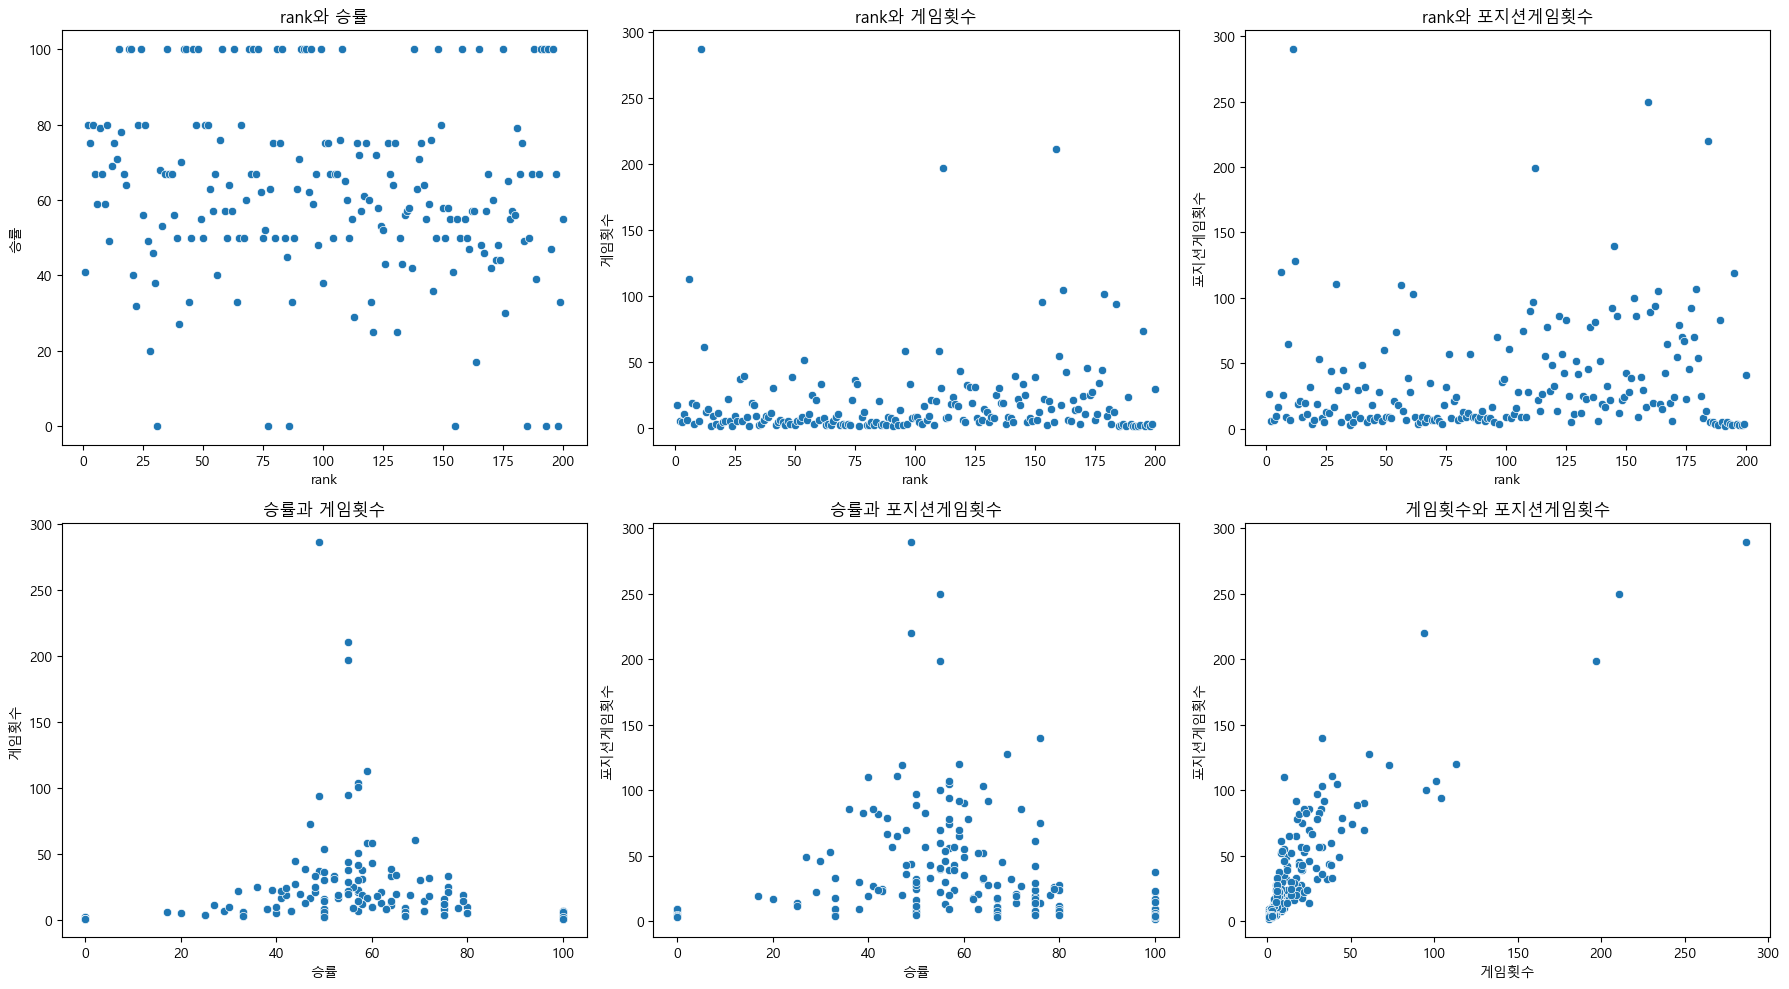

In [ ]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.scatterplot(x='rank', y='승률', data=tier_p, ax=axes[0, 0])
axes[0, 0].set_title('rank와 승률')

sns.scatterplot(x='rank', y='게임횟수', data=tier_p, ax=axes[0, 1])
axes[0, 1].set_title('rank와 게임횟수')

sns.scatterplot(x='rank', y='포지션게임횟수', data=tier_p, ax=axes[0, 2])
axes[0, 2].set_title('rank와 포지션게임횟수')

sns.scatterplot(x='승률', y='게임횟수', data=tier_p, ax=axes[1, 0])
axes[1, 0].set_title('승률과 게임횟수')

sns.scatterplot(x='승률', y='포지션게임횟수', data=tier_p, ax=axes[1, 1])
axes[1, 1].set_title('승률과 포지션게임횟수')

sns.scatterplot(x='게임횟수', y='포지션게임횟수', data=tier_p, ax=axes[1, 2])
axes[1, 2].set_title('게임횟수와 포지션게임횟수')

plt.tight_layout()
plt.show()


상관관계가 성립하려면 p값 < 0.05 이어야 하므로, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있음을 확인하고 상관계수를 파악한다

In [ ]:
print(f'승률과 게임횟수의 상관계수 :{spearmanr(tier_p['승률'], tier_p['게임횟수'])[0]}')
print(f'승률과 포지션게임횟수의 상관계수 :{spearmanr(tier_p['승률'], tier_p['포지션게임횟수'])[0]}')
print(f'게임횟수와 포지션게임횟수의 상관계수 :{spearmanr(tier_p['게임횟수'], tier_p['포지션게임횟수'])[0]}')

승률과 게임횟수의 상관계수 :-0.31527091317116057
승률과 포지션게임횟수의 상관계수 :-0.3650274434760585
게임횟수와 포지션게임횟수의 상관계수 :0.8872487967496799


확인결과, <br>
승률-게임횟수 : 약한 음의 상관관계 <br>
승률-포지션게임횟수 : 약한 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 강한 양의 상관관계 임을 확인할 수 있다

- 범주형 변수간의 독립성분석

범주형 변수간의 연관관계는 카이제곱 검정을 통해 가능하므로, 카이제곱 검정을 통해 범주형 변수인 주챔피언과 포지션의 독립성을 분석한다.

In [ ]:
table = pd.crosstab(tier_p['주챔피언'], tier_p['포지션'])
table

포지션,미드,서폿,원딜,정글,탑
주챔피언,,,,,
가렌,0,0,0,0,1
갈리오,2,0,0,0,0
갱플랭크,0,0,0,0,3
그웬,0,0,0,0,2
노틸러스,0,1,0,0,0
녹턴,0,0,0,4,0
니달리,0,0,0,3,0
니코,0,1,0,0,0
다리우스,0,0,0,0,2


In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(table)
print(f'주챔피언과 포지션의 독립성 : {chi2_contingency(table)[1]}')

주챔피언과 포지션의 독립성 : 8.338759052203916e-22


두 범주형 변수간의 독립성여부를 판단하려면 p값 > 0.05여야 하므로, <br>
주챔피언과 포지션간에는 독립성이 성립하지 않는다 (연관성 있음) <br>
두 변수간의 연관성 강도를 측정하기 위해 cramer's V 계수를 확인한다

In [ ]:
n = table.sum().sum()  
cramers_v = np.sqrt(chi2_stat / (n * (min(table.shape) - 1)))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.9022


cramer's V 계수가 0.9이므로 주챔피언과 포지션간에는 강한 연관성이 확인된다

- 다변량 분석 정리 : <br><br>

- 연속형 변수 : 'rank','승률','게임횟수','포지션게임횟수'
- 범주형 변수 : '주챔피언', '포지션' <br><br>

- 연속형 변수가 정규성을 띄지는 않음. 
- 서로 상관관계가 있는지 스피어만 검정을 통해 확인해 본 결과, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있고 <br>
승률-게임횟수 : 약한 음의 상관관계 <br>
승률-포지션게임횟수 : 약한 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 강한 양의 상관관계 임을 확인할 수 있다 <br><br>

- 범주형 변수간의 연관성을 카이제곱 검정으로 확인한 결과, 주챔피언과 포지션간에는 독립성이 성립하지 않으며(연관성이 있음이 확인되며며) cramer's V 계수를 통해 확인된 연관성의 강도는 강한 것으로 확인됨.


### 2. Emerald 티어
- 단변량분석

In [ ]:
tier_e['주챔피언'].value_counts()

주챔피언
리 신      14
미스 포츈    11
이즈리얼     10
빅토르       6
제이스       6
         ..
이블린       1
판테온       1
니달리       1
우르곳       1
노틸러스      1
Name: count, Length: 97, dtype: int64

In [ ]:
tier_e['포지션'].value_counts()

포지션
미드    47
원딜    42
탑     41
정글    36
서폿    34
Name: count, dtype: int64

In [ ]:
tier_e.describe()

,rank,게임횟수,승률,포지션게임횟수
count,200.000000,200.000000,200.000000,200.000000
mean,300.500000,13.360000,66.950000,23.845000
std,57.879185,23.139959,22.999181,31.082981
min,201.000000,1.000000,0.000000,3.000000
25%,250.750000,3.000000,52.750000,5.000000
50%,300.500000,5.000000,67.000000,11.500000
75%,350.250000,14.000000,80.000000,30.250000
max,400.000000,190.000000,100.000000,193.000000


In [ ]:
tier_e.describe(include=object)

,티어,닉네임,주챔피언,포지션
count,200,200,200,200
unique,1,200,97,5
top,emerald,n bee #1998,리 신,미드
freq,200,1,14,47


In [ ]:
tier_e.sort_values('게임횟수',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
132,emerald,133,광명시 철산동 #KR1,자크,190,54,정글,192
0,emerald,1,n bee #1998,오리아나,178,56,미드,178
44,emerald,45,노력하는자 #노력하는자,사일러스,93,57,미드,193
53,emerald,54,Girls Never Die #KR2,누누와 윌럼프,92,62,미드,64
178,emerald,179,금창의용사윤석열 #KR1,스웨인,74,54,탑,117
...,...,...,...,...,...,...,...,...
118,emerald,119,인생은도박이야 #KR1,잭스,1,0,탑,3
107,emerald,108,탑갱오면안함 #KR1,녹턴,1,100,탑,3
83,emerald,84,혜지으응 #KR1,블라디미르,1,0,미드,5
100,emerald,101,별하루 #원 딜,케이틀린,1,100,원딜,5


In [ ]:
tier_e.sort_values('승률',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
50,emerald,51,미 호 #야옹2,리 신,3,100,정글,5
52,emerald,53,프로랑친구하고싶다 #평생술안주,렐,2,100,서폿,5
49,emerald,50,괴물조쥐 #KR1,녹턴,1,100,정글,4
68,emerald,69,너쌓여있잖아 #2815,케인,2,100,정글,4
67,emerald,68,진흙경단의 천재가 있었네 #KR2,루시안,3,100,원딜,7
...,...,...,...,...,...,...,...,...
83,emerald,84,혜지으응 #KR1,블라디미르,1,0,미드,5
86,emerald,87,송 강 #존잘러,카르마,1,0,서폿,3
113,emerald,114,always sacrifice #KR1,제이스,1,0,미드,3
118,emerald,119,인생은도박이야 #KR1,잭스,1,0,탑,3


In [ ]:
tier_e.sort_values('포지션게임횟수',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
244,emerald,245,노력하는자 #노력하는자,사일러스,93,57,미드,193
332,emerald,333,광명시 철산동 #KR1,자크,190,54,정글,192
200,emerald,201,n bee #1998,오리아나,178,56,미드,178
378,emerald,379,금창의용사윤석열 #KR1,스웨인,74,54,탑,117
380,emerald,381,양현우 #1120,리 신,69,61,정글,108
...,...,...,...,...,...,...,...,...
318,emerald,319,인생은도박이야 #KR1,잭스,1,0,탑,3
313,emerald,314,always sacrifice #KR1,제이스,1,0,미드,3
307,emerald,308,탑갱오면안함 #KR1,녹턴,1,100,탑,3
342,emerald,343,둉 쟤 #KR1,제이스,2,100,탑,3


In [ ]:
tier_e[tier_e['주챔피언'] == '리 신']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
25,emerald,26,낭만바라기 #KR1,리 신,11,64,정글,21
31,emerald,32,TES mingyun #KR1,리 신,3,33,미드,10
33,emerald,34,양학용부캐 #막아봐,리 신,28,64,정글,79
39,emerald,40,Zeka #fads,리 신,8,75,미드,29
41,emerald,42,싸꾸룸뚜꾸룸 #123,리 신,40,60,정글,104
50,emerald,51,미 호 #야옹2,리 신,3,100,정글,5
71,emerald,72,공 룡 #연평1,리 신,6,67,서폿,26
123,emerald,124,butcher #6449,리 신,4,25,정글,12
129,emerald,130,꿀 밤 #꿀 밤,리 신,4,50,원딜,24
133,emerald,134,도산공원사거리 #KR1,리 신,4,75,정글,5


In [ ]:
tier_e[tier_e['주챔피언'] == '미스 포츈']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
15,emerald,16,Diaba #KR1,미스 포츈,4,25,원딜,20
17,emerald,18,authenticity #진짜임,미스 포츈,11,55,원딜,21
45,emerald,46,백공팔 #KR1,미스 포츈,15,73,원딜,34
51,emerald,52,Uniq R Gosu #Kor,미스 포츈,18,56,원딜,91
80,emerald,81,정은효 #KR1,미스 포츈,9,44,원딜,51
93,emerald,94,들뜨지마라 #5200,미스 포츈,4,100,원딜,5
105,emerald,106,마세라티 MC20 #KR1,미스 포츈,36,56,원딜,77
146,emerald,147,돌쇠야 가즈하 #KR486,미스 포츈,16,56,원딜,46
169,emerald,170,고창포 #KR1,미스 포츈,5,40,원딜,16
171,emerald,172,뚱냥이는 배고파 #KR1,미스 포츈,12,67,원딜,27


In [ ]:
tier_e[tier_e['주챔피언'] == '이즈리얼']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
7,emerald,8,off the grid #0412,이즈리얼,11,73,원딜,32
19,emerald,20,부산지킴이 #KR1,이즈리얼,24,54,원딜,47
38,emerald,39,PLAYLIST #0924,이즈리얼,9,56,원딜,29
58,emerald,59,명탐정 코남 #KR05,이즈리얼,4,75,원딜,5
63,emerald,64,아리달록 #KR1,이즈리얼,12,50,원딜,32
99,emerald,100,하 로 #야 미,이즈리얼,2,100,원딜,4
106,emerald,107,햇빛이성큼성큼걸어왔다 #0319,이즈리얼,2,100,원딜,4
136,emerald,137,김윈터 #말티즈,이즈리얼,3,67,원딜,7
143,emerald,144,Cyeee #KR1,이즈리얼,1,100,원딜,4
184,emerald,185,저시나 #KR1,이즈리얼,4,75,원딜,10


In [ ]:
tier_e[tier_e['주챔피언'] == '빅토르']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
2,emerald,3,RYAN #리안06,빅토르,23,39,미드,71
70,emerald,71,finalee #KR1,빅토르,5,80,미드,5
97,emerald,98,누구보다 큼 #KR1,빅토르,5,80,미드,5
101,emerald,102,Lidox #KR1,빅토르,37,59,미드,48
124,emerald,125,선비 도토리 #KR1,빅토르,2,100,미드,3
144,emerald,145,강영민 #KR1,빅토르,4,50,미드,7


In [ ]:
tier_e[tier_e['주챔피언'] == '제이스']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
82,emerald,83,Fromm #1228,제이스,2,100,미드,3
113,emerald,114,always sacrifice #KR1,제이스,1,0,미드,3
119,emerald,120,Found My Way #KR1,제이스,3,100,탑,5
142,emerald,143,둉 쟤 #KR1,제이스,2,100,탑,3
159,emerald,160,감자먹기 #KR1,제이스,2,100,탑,4
198,emerald,199,IG EDP #KR1,제이스,5,60,탑,10


In [ ]:
print(f'게임횟수 : {shapiro(tier_e['게임횟수'])[1]}')
print(f'포지션게임횟수 : {shapiro(tier_e['포지션게임횟수'])[1]}')
print(f'승률 : {shapiro(tier_e['승률'])[1]}')

게임횟수 : 1.7429886206199646e-23
포지션게임횟수 : 1.0369108497524409e-19
승률 : 8.44432408744634e-09


- 단변량 분석 정리 : <br><br>

에메랄드 티어 랭킹 200위에서 <br>
- 가장 많이 플레이하는 주챔피언 Top5 : 리신(정글), 미스 포츈(원딜), 이즈리얼(원딜), 빅토르(미드), 제이스(탑)<br>
- 가장 많이 플레이하는 라인 순서 : 미드 > 원딜 > 탑 > 정글 > 서폿 <br>
- 게임횟수 : 평균 13.3회이나 max값이 너무 큰 경우가 있음. 게임횟수 많은순으로 정렬한 결과, 순위와는 큰 연관이 없을 것으로 예상. <br>
- 승률 : 평균 66.9%. 승률이 높은 순으로 정렬한 결과, 게임횟수와 연관이 있을 가능성 높음. (게임횟수가 적으면 승률이 100이거나 0일 수 있음) <br>
- 포지션게임횟수 : 해당 라인에서 플레이한 횟수로, 평균 23회. 게임횟수와 연관이 있을 것으로 예상되며 순위와는 큰 연관이 없을 것으로 예상 <br><br>
- 게임횟수와 포지션게임횟수 승률 모두 정규성 보이지 않음

- 다변량 분석
    - 연속형 변수간의 상관관계 분석

In [ ]:
tier_e.groupby(['게임횟수', '승률'])['승률'].count()

게임횟수  승률 
1     0       5
      100     7
2     50     11
      100    24
3     0       1
             ..
74    54      1
92    62      1
93    57      1
178   56      1
190   54      1
Name: 승률, Length: 87, dtype: int64

In [ ]:
tier_e.groupby(['rank', '게임횟수'])['게임횟수'].count()

rank  게임횟수
1     178     1
2     9       1
3     23      1
4     20      1
5     14      1
             ..
196   48      1
197   3       1
198   7       1
199   5       1
200   14      1
Name: 게임횟수, Length: 200, dtype: int64

In [ ]:
tier_e.groupby(['rank', '포지션게임횟수'])['rank'].count()

rank  포지션게임횟수
1     178        1
2     19         1
3     71         1
4     19         1
5     20         1
                ..
196   64         1
197   13         1
198   21         1
199   10         1
200   67         1
Name: rank, Length: 200, dtype: int64

In [ ]:
tier_e.groupby(['rank', '승률'])['승률'].count()

rank  승률
1     56    1
2     67    1
3     39    1
4     55    1
5     86    1
           ..
196   54    1
197   0     1
198   71    1
199   60    1
200   50    1
Name: 승률, Length: 200, dtype: int64

In [ ]:
tier_e.groupby(['포지션게임횟수', '승률'])['포지션게임횟수'].count()

포지션게임횟수  승률 
3        0      3
         50     1
         67     1
         100    7
4        0      1
               ..
108      61     1
117      54     1
178      56     1
192      54     1
193      57     1
Name: 포지션게임횟수, Length: 130, dtype: int64

- 위에서 확인했듯이 모든 연속형 변수가 정규성을 가지지 않기 때문에 스피어만 상관계수를 통해 두 변수간의 상관관계를 확인한다

In [ ]:
print(f'rank와 승률의 상관관계 : {spearmanr(tier_e['rank'], tier_e['승률'])[1]}')
print(f'rank와 게임횟수의 상관관계 : {spearmanr(tier_e['rank'], tier_e['게임횟수'])[1]}')
print(f'rank와 포지션게임횟수의 상관관계 :{spearmanr(tier_e['rank'], tier_e['포지션게임횟수'])[1]}')
print(f'승률과 게임횟수의 상관관계 :{spearmanr(tier_e['승률'], tier_e['게임횟수'])[1]}')
print(f'승률과 포지션게임횟수의 상관관계 :{spearmanr(tier_e['승률'], tier_e['포지션게임횟수'])[1]}')
print(f'게임횟수와 포지션게임횟수의 상관관계 :{spearmanr(tier_e['게임횟수'], tier_e['포지션게임횟수'])[1]}')

rank와 승률의 상관관계 : 0.7442086184724404
rank와 게임횟수의 상관관계 : 0.0020045183874790712
rank와 포지션게임횟수의 상관관계 :0.0031136911513722967
승률과 게임횟수의 상관관계 :3.628023083017084e-08
승률과 포지션게임횟수의 상관관계 :3.027647875986345e-11
게임횟수와 포지션게임횟수의 상관관계 :2.523773013119474e-65


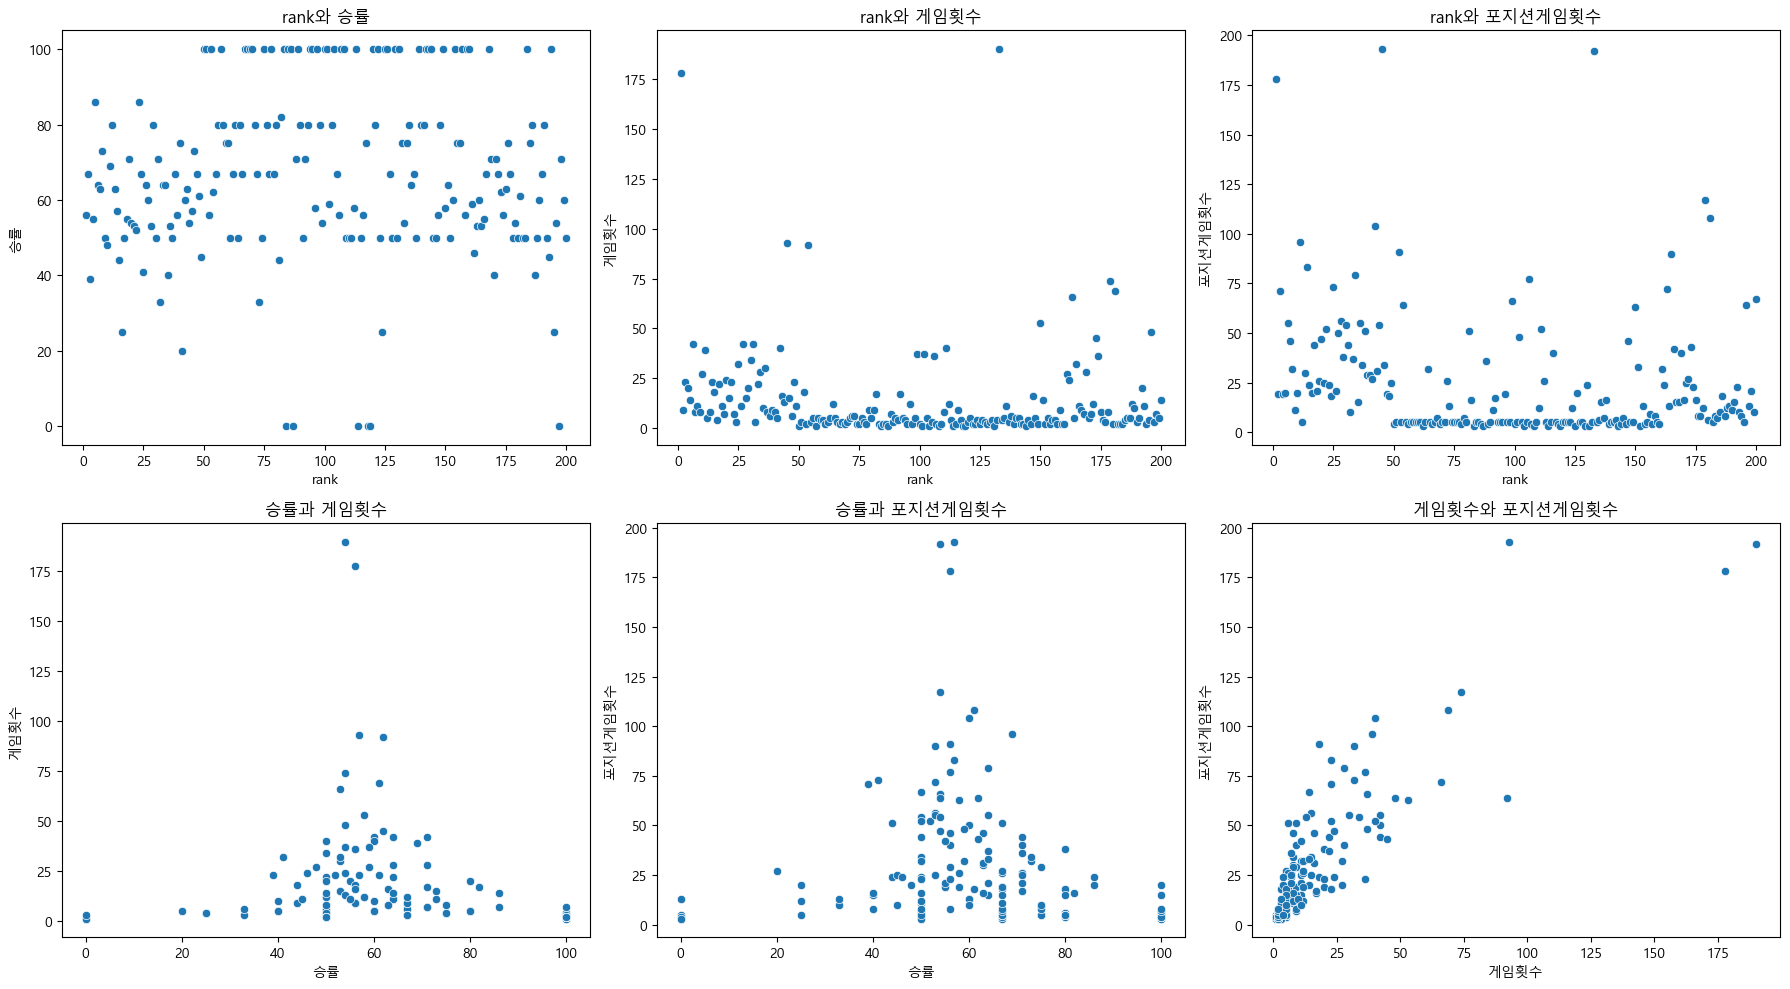

In [ ]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.scatterplot(x='rank', y='승률', data=tier_e, ax=axes[0, 0])
axes[0, 0].set_title('rank와 승률')

sns.scatterplot(x='rank', y='게임횟수', data=tier_e, ax=axes[0, 1])
axes[0, 1].set_title('rank와 게임횟수')

sns.scatterplot(x='rank', y='포지션게임횟수', data=tier_e, ax=axes[0, 2])
axes[0, 2].set_title('rank와 포지션게임횟수')

sns.scatterplot(x='승률', y='게임횟수', data=tier_e, ax=axes[1, 0])
axes[1, 0].set_title('승률과 게임횟수')

sns.scatterplot(x='승률', y='포지션게임횟수', data=tier_e, ax=axes[1, 1])
axes[1, 1].set_title('승률과 포지션게임횟수')

sns.scatterplot(x='게임횟수', y='포지션게임횟수', data=tier_e, ax=axes[1, 2])
axes[1, 2].set_title('게임횟수와 포지션게임횟수')

plt.tight_layout()
plt.show()


상관관계가 성립하려면 p값 < 0.05 이어야 하므로, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있음을 확인하고 상관계수를 파악한다

In [ ]:
print(f'승률과 게임횟수의 상관계수 :{spearmanr(tier_e['승률'], tier_e['게임횟수'])[0]}')
print(f'승률과 포지션게임횟수의 상관계수 :{spearmanr(tier_e['승률'], tier_e['포지션게임횟수'])[0]}')
print(f'게임횟수와 포지션게임횟수의 상관계수 :{spearmanr(tier_e['게임횟수'], tier_e['포지션게임횟수'])[0]}')

승률과 게임횟수의 상관계수 :-0.3773490651874423
승률과 포지션게임횟수의 상관계수 :-0.4476022361246829
게임횟수와 포지션게임횟수의 상관계수 :0.8781585427315373


확인결과, <br>
승률-게임횟수 : 약한 음의 상관관계 <br>
승률-포지션게임횟수 : 약한 음/또는 중간정도의 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 강한 양의 상관관계 임을 확인할 수 있다

- 범주형 변수간의 독립성분석

범주형 변수간의 연관관계는 카이제곱 검정을 통해 가능하므로, 카이제곱 검정을 통해 범주형 변수인 주챔피언과 포지션의 독립성을 분석한다.

In [ ]:
table_e = pd.crosstab(tier_e['주챔피언'], tier_e['포지션'])
table_e

포지션,미드,서폿,원딜,정글,탑
주챔피언,,,,,
가렌,0,0,0,0,1
갈리오,1,0,0,0,0
갱플랭크,0,0,0,0,1
그라가스,0,0,0,0,2
그레이브즈,0,0,0,3,0
...,...,...,...,...,...
트리스타나,0,0,1,0,0
트린다미어,0,0,0,0,2
파이크,0,3,0,0,0


In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(table_e)
print(f'주챔피언과 포지션의 독립성 : {chi2_contingency(table_e)[1]}')

주챔피언과 포지션의 독립성 : 8.338759052203916e-22


두 범주형 변수간의 독립성여부를 판단하려면 p값 > 0.05여야 하므로, <br>
주챔피언과 포지션간에는 독립성이 성립하지 않는다 (연관성 있음) <br>
두 변수간의 연관성 강도를 측정하기 위해 cramer's V 계수를 확인한다

In [ ]:
n = table_e.sum().sum()  
cramers_v = np.sqrt(chi2_stat / (n * (min(table_e.shape) - 1)))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.9181


cramer's V 계수가 0.9이므로 주챔피언과 포지션간에는 강한 연관성이 확인된다

- 다변량 분석 정리 : <br><br>

- 연속형 변수 : 'rank','승률','게임횟수','포지션게임횟수'
- 범주형 변수 : '주챔피언', '포지션' <br><br>

- 연속형 변수가 정규성을 띄지는 않음. 
- 서로 상관관계가 있는지 스피어만 검정을 통해 확인해 본 결과, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있고 <br>
승률-게임횟수 : 약한 음의 상관관계 <br>
승률-포지션게임횟수 : 약한 음 / 또는 중간정도의 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 강한 양의 상관관계 임을 확인할 수 있다 <br><br>

- 범주형 변수간의 연관성을 카이제곱 검정으로 확인한 결과, 주챔피언과 포지션간에는 독립성이 성립하지 않으며(연관성이 있음이 확인되며며) cramer's V 계수를 통해 확인된 연관성의 강도는 강한 것으로 확인됨.


### 3. Diamond 티어
- 단변량 분석

In [ ]:
tier_d['주챔피언'].value_counts()

주챔피언
리 신      14
이즈리얼      8
제이스       7
미스 포츈     6
엘리스       5
         ..
베이가       1
크산테       1
렉사이       1
탐 켄치      1
바드        1
Name: count, Length: 96, dtype: int64

In [ ]:
tier_d['포지션'].value_counts()

포지션
탑     44
정글    41
원딜    39
서폿    38
미드    38
Name: count, dtype: int64

In [ ]:
tier_d.sort_values('게임횟수',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
145,diamond,146,학살머신 #KR1,제드,243,51,미드,266
98,diamond,99,롤로노아 김동현 #KR1,피오라,178,50,탑,208
94,diamond,95,정수리로한다 #KR1,암베사,136,56,미드,171
191,diamond,192,여지니 때찌때찌 #KR1,유미,128,58,서폿,157
108,diamond,109,토실이파파 #KR1,녹턴,121,58,정글,182
...,...,...,...,...,...,...,...,...
47,diamond,48,Faker #G102,카이사,5,40,원딜,28
37,diamond,38,불청객2 #KR1,리 신,5,60,정글,20
81,diamond,82,관평동피바람 #KR1,벨베스,5,80,정글,32
52,diamond,53,박투신 #KR1,제이스,4,25,탑,33


In [ ]:
tier_d.sort_values('승률',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
194,diamond,195,OFF THE LEASH #0114,이즈리얼,15,93,원딜,54
143,diamond,144,후추단추 #KR1,카직스,10,90,정글,16
125,diamond,126,후 니 #KR1,코르키,9,89,원딜,27
161,diamond,162,선취킬 #KR1,리 신,6,83,정글,15
164,diamond,165,냠 쿰 #냠냠쿰척,룰루,18,83,서폿,18
...,...,...,...,...,...,...,...,...
104,diamond,105,IlIIIlllIlIlllII #IllIl,리 신,6,33,정글,39
117,diamond,118,cjno #2002,비에고,21,33,정글,75
119,diamond,120,정상길 #KR1,리 신,7,29,정글,35
52,diamond,53,박투신 #KR1,제이스,4,25,탑,33


In [ ]:
tier_d.sort_values('포지션게임횟수',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
72,diamond,73,Vinter #222,이즈리얼,85,48,원딜,298
145,diamond,146,학살머신 #KR1,제드,243,51,미드,266
74,diamond,75,레 렐 #레 렐,바루스,12,67,서폿,215
98,diamond,99,롤로노아 김동현 #KR1,피오라,178,50,탑,208
60,diamond,61,냥 냥 #KR1,애쉬,55,40,원딜,207
...,...,...,...,...,...,...,...,...
39,diamond,40,복 이 #BOK2,카르마,9,78,정글,18
102,diamond,103,이로하 #486,시비르,7,71,원딜,17
11,diamond,12,우기리기리깅 #우깅깅,제라스,14,50,탑,16
143,diamond,144,후추단추 #KR1,카직스,10,90,정글,16


In [ ]:
tier_d.describe()

,rank,게임횟수,승률,포지션게임횟수
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,31.785000,58.545000,67.955000
std,57.879185,31.655634,12.168745,48.519312
min,1.000000,3.000000,23.000000,15.000000
25%,50.750000,12.000000,50.000000,36.000000
50%,100.500000,23.000000,58.000000,49.000000
75%,150.250000,36.000000,67.000000,86.500000
max,200.000000,243.000000,93.000000,298.000000


In [ ]:
tier_d.describe(include=object)

,티어,닉네임,주챔피언,포지션
count,200,200,200,200
unique,1,200,96,5
top,diamond,Faker #KO1,리 신,탑
freq,200,1,14,44


In [ ]:
tier_d[tier_d['주챔피언'] == '리 신']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
1,diamond,2,ssuvilove #KR2,리 신,25,64,정글,42
7,diamond,8,정글프로라고할뻔 #KR1,리 신,9,56,정글,20
37,diamond,38,불청객2 #KR1,리 신,5,60,정글,20
43,diamond,44,love me like #0105,리 신,24,67,정글,68
51,diamond,52,Hakuna Matata #mute,리 신,29,48,정글,73
104,diamond,105,IlIIIlllIlIlllII #IllIl,리 신,6,33,정글,39
119,diamond,120,정상길 #KR1,리 신,7,29,정글,35
135,diamond,136,서러워도잘살아 #KR1,리 신,14,50,정글,92
161,diamond,162,선취킬 #KR1,리 신,6,83,정글,15
163,diamond,164,킹카가될뻔한리신 #KR1,리 신,27,56,정글,53


In [ ]:
tier_d[tier_d['주챔피언'] == '이즈리얼']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
48,diamond,49,SON #GOAT1,이즈리얼,22,23,원딜,89
64,diamond,65,와앙 캐리 #KR1,이즈리얼,12,67,원딜,41
72,diamond,73,Vinter #222,이즈리얼,85,48,원딜,298
123,diamond,124,Bugwon #부구언,이즈리얼,11,55,원딜,45
137,diamond,138,listen to me #KR1,이즈리얼,7,43,서폿,49
181,diamond,182,アンズの花 #KR3,이즈리얼,34,47,원딜,157
194,diamond,195,OFF THE LEASH #0114,이즈리얼,15,93,원딜,54
196,diamond,197,원딜로그마갈래 #KR0,이즈리얼,17,59,원딜,29


In [ ]:
tier_d[tier_d['주챔피언'] == '제이스']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
22,diamond,23,내일을 향한 여정 #KR1,제이스,17,71,탑,39
34,diamond,35,겨 울 #0829,제이스,25,68,미드,41
52,diamond,53,박투신 #KR1,제이스,4,25,탑,33
113,diamond,114,망고바나나I #KR1,제이스,25,48,탑,59
126,diamond,127,2001 #kbj,제이스,37,59,탑,92
142,diamond,143,Inha ex machlna #0102,제이스,11,55,탑,44
158,diamond,159,테이저건지이익 #KR1,제이스,24,42,탑,113


In [ ]:
tier_d[tier_d['주챔피언'] == '미스 포츈']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
25,diamond,26,곰돌이 푸 #OwO,미스 포츈,37,59,원딜,141
40,diamond,41,애 환 #KR1,미스 포츈,11,55,원딜,39
54,diamond,55,웃으면서살자 #KR0,미스 포츈,18,39,원딜,44
167,diamond,168,Selena Gomez #Fans,미스 포츈,8,75,원딜,56
186,diamond,187,SBox #KR1,미스 포츈,13,69,원딜,36
190,diamond,191,푸푸린 #안졸려zZ,미스 포츈,14,57,원딜,68


In [ ]:
tier_d[tier_d['주챔피언'] == '엘리스']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
6,diamond,7,오픈해본적없음 #KR0,엘리스,34,53,정글,92
12,diamond,13,하모냠 #KR1,엘리스,48,77,정글,125
35,diamond,36,echo QAQ #9099,엘리스,26,73,정글,26
99,diamond,100,Zhitao #QAQ,엘리스,14,50,서폿,23
101,diamond,102,스몰더하면처박음 #고oa스더,엘리스,8,63,정글,47


In [ ]:
print(f'게임횟수 : {shapiro(tier_d['게임횟수'])[1]}')
print(f'포지션게임횟수 : {shapiro(tier_d['포지션게임횟수'])[1]}')
print(f'승률 : {shapiro(tier_d['승률'])[1]}')

게임횟수 : 1.106235677714346e-18
포지션게임횟수 : 2.0872162970535867e-14
승률 : 0.7248905662818279


- 단변량 분석 정리 : <br><br>

다이아몬드 티어 랭킹 200위에서 <br>
- 가장 많이 플레이하는 주챔피언 Top5 : 리신(정글), 이즈리얼(원딜),미스 포츈(원딜), 제이스(탑), 엘리스(정글)<br>
- 가장 많이 플레이하는 라인 순서 : 탑 > 정글 > 원딜 > 서폿 > 미드 <br>
- 게임횟수 : 평균 31.7회이나 max값이 너무 큰 경우가 있음. 게임횟수 많은순으로 정렬한 결과, 순위와는 큰 연관이 없을 것으로 예상. <br>
- 승률 : 평균 59.5%. 승률이 높은 순으로 정렬한 결과, 게임횟수와 연관이 있을 가능성 높음. (게임횟수가 적으면 승률이 아주 높거나 아주 낮을 수 있음) <br>
- 포지션게임횟수 : 해당 라인에서 플레이한 횟수로, 평균 67회. 게임횟수나 순위와는 큰 연관이 없을 것으로 예상 <br><br>
- 게임횟수와 포지션게임횟수는 정규성을 보이지 않으나, 승률은 정규성을 보임

- 다변량 분석
    - 연속형 변수간의 상관관계 분석

In [ ]:
tier_d.groupby(['게임횟수', '승률'])['승률'].count()

게임횟수  승률
3     67    1
4     25    1
5     40    1
      60    1
      80    1
           ..
121   58    1
128   58    1
136   56    1
178   50    1
243   51    1
Name: 승률, Length: 150, dtype: int64

In [ ]:
tier_d.groupby(['rank', '게임횟수'])['게임횟수'].count()

rank  게임횟수
1     9       1
2     25      1
3     23      1
4     48      1
5     22      1
             ..
196   25      1
197   17      1
198   17      1
199   23      1
200   108     1
Name: 게임횟수, Length: 200, dtype: int64

In [ ]:
tier_d.groupby(['rank', '포지션게임횟수'])['rank'].count()

rank  포지션게임횟수
1     44         1
2     42         1
3     46         1
4     48         1
5     65         1
                ..
196   77         1
197   29         1
198   38         1
199   55         1
200   117        1
Name: rank, Length: 200, dtype: int64

In [ ]:
tier_d.groupby(['rank', '승률'])['승률'].count()

rank  승률
1     56    1
2     64    1
3     70    1
4     52    1
5     45    1
           ..
196   56    1
197   59    1
198   65    1
199   52    1
200   64    1
Name: 승률, Length: 200, dtype: int64

In [ ]:
tier_d.groupby(['포지션게임횟수', '승률'])['포지션게임횟수'].count()

포지션게임횟수  승률
15       83    1
16       50    1
         90    1
17       71    1
18       78    1
              ..
207      40    1
208      50    1
215      67    1
266      51    1
298      48    1
Name: 포지션게임횟수, Length: 194, dtype: int64

- 위에서 확인했듯이 모든 연속형 변수가 정규성을 가지는 것은 아니기 때문에 스피어만 상관계수를 통해 두 변수간의 상관관계를 확인한다
- 스피어만 상관계수는 정규성을 가지는 변수와 그렇지 않은 변수간의 상관관계를 파악할 때도 활용이 가능하다

In [ ]:
print(f'rank와 승률의 상관관계 : {spearmanr(tier_d['rank'], tier_d['승률'])[1]}')
print(f'rank와 게임횟수의 상관관계 : {spearmanr(tier_d['rank'], tier_d['게임횟수'])[1]}')
print(f'rank와 포지션게임횟수의 상관관계 :{spearmanr(tier_d['rank'], tier_d['포지션게임횟수'])[1]}')
print(f'승률과 게임횟수의 상관관계 :{spearmanr(tier_d['승률'], tier_d['게임횟수'])[1]}')
print(f'승률과 포지션게임횟수의 상관관계 :{spearmanr(tier_d['승률'], tier_d['포지션게임횟수'])[1]}')
print(f'게임횟수와 포지션게임횟수의 상관관계 :{spearmanr(tier_d['게임횟수'], tier_d['포지션게임횟수'])[1]}')

rank와 승률의 상관관계 : 0.3800403708946002
rank와 게임횟수의 상관관계 : 0.641823402837961
rank와 포지션게임횟수의 상관관계 :0.941434256298066
승률과 게임횟수의 상관관계 :0.00010436895027958742
승률과 포지션게임횟수의 상관관계 :1.5602137658638372e-09
게임횟수와 포지션게임횟수의 상관관계 :1.0289621740207582e-24


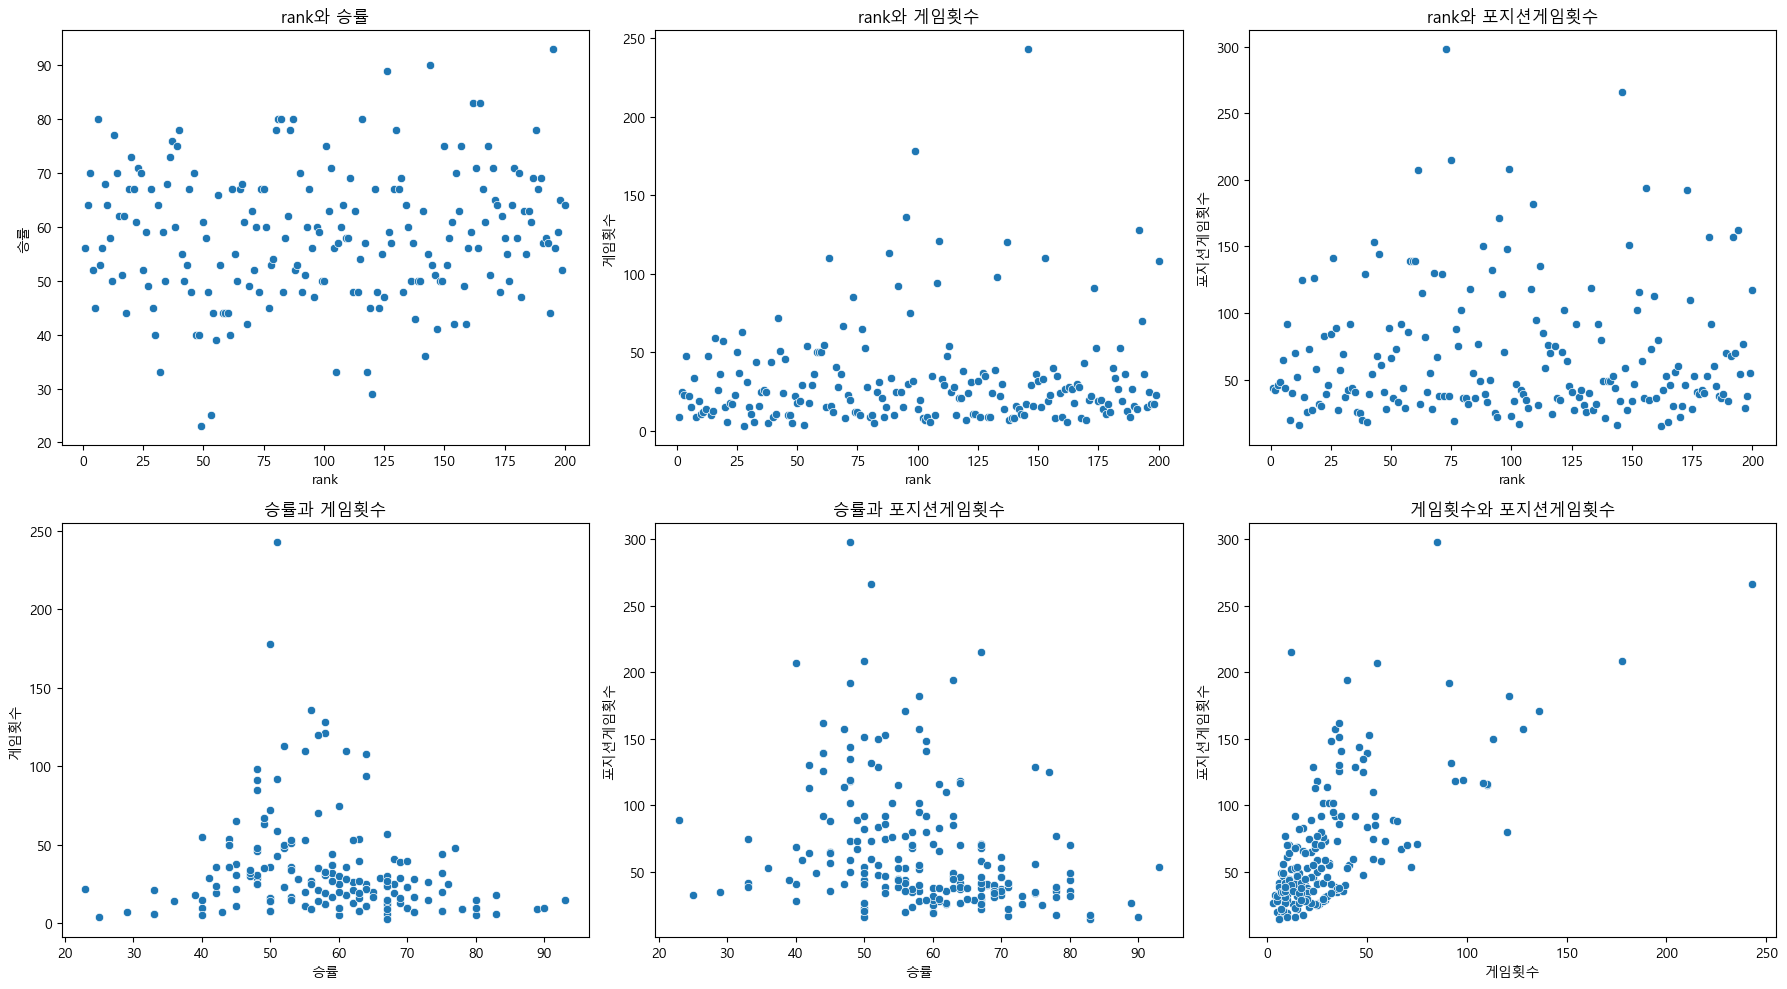

In [ ]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.scatterplot(x='rank', y='승률', data=tier_d, ax=axes[0, 0])
axes[0, 0].set_title('rank와 승률')

sns.scatterplot(x='rank', y='게임횟수', data=tier_d, ax=axes[0, 1])
axes[0, 1].set_title('rank와 게임횟수')

sns.scatterplot(x='rank', y='포지션게임횟수', data=tier_d, ax=axes[0, 2])
axes[0, 2].set_title('rank와 포지션게임횟수')

sns.scatterplot(x='승률', y='게임횟수', data=tier_d, ax=axes[1, 0])
axes[1, 0].set_title('승률과 게임횟수')

sns.scatterplot(x='승률', y='포지션게임횟수', data=tier_d, ax=axes[1, 1])
axes[1, 1].set_title('승률과 포지션게임횟수')

sns.scatterplot(x='게임횟수', y='포지션게임횟수', data=tier_d, ax=axes[1, 2])
axes[1, 2].set_title('게임횟수와 포지션게임횟수')

plt.tight_layout()
plt.show()


상관관계가 성립하려면 p값 < 0.05 이어야 하므로, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있음을 확인하고 상관계수를 파악한다

In [ ]:
print(f'승률과 게임횟수의 상관계수 :{spearmanr(tier_d['승률'], tier_d['게임횟수'])[0]}')
print(f'승률과 포지션게임횟수의 상관계수 :{spearmanr(tier_d['승률'], tier_d['포지션게임횟수'])[0]}')
print(f'게임횟수와 포지션게임횟수의 상관계수 :{spearmanr(tier_d['게임횟수'], tier_d['포지션게임횟수'])[0]}')

승률과 게임횟수의 상관계수 :-0.27092099887597343
승률과 포지션게임횟수의 상관계수 :-0.4105521506990797
게임횟수와 포지션게임횟수의 상관계수 :0.6429124699089177


확인결과, <br>
승률-게임횟수 : 약한 음의 상관관계 <br>
승률-포지션게임횟수 : 약한 음/또는 중간정도의 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 중간정도의 양의 상관관계 임을 확인할 수 있다

- 범주형 변수간의 독립성분석

범주형 변수간의 연관관계는 카이제곱 검정을 통해 가능하므로, 카이제곱 검정을 통해 범주형 변수인 주챔피언과 포지션의 독립성을 분석한다.

In [ ]:
table_d = pd.crosstab(tier_d['주챔피언'], tier_d['포지션'])
table_d

포지션,미드,서폿,원딜,정글,탑
주챔피언,,,,,
가렌,0,0,0,0,1
갈리오,0,1,0,0,0
갱플랭크,0,0,0,0,2
그라가스,0,1,0,0,0
그레이브즈,0,0,0,2,0
...,...,...,...,...,...
트린다미어,0,0,0,0,1
티모,0,0,0,0,1
판테온,0,0,0,0,2


In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(table_d)
print(f'주챔피언과 포지션의 독립성 : {chi2_contingency(table_d)[1]}')

주챔피언과 포지션의 독립성 : 7.084959069910448e-23


두 범주형 변수간의 독립성여부를 판단하려면 p값 > 0.05여야 하므로, <br>
주챔피언과 포지션간에는 독립성이 성립하지 않는다 (연관성 있음) <br>
두 변수간의 연관성 강도를 측정하기 위해 cramer's V 계수를 확인한다

In [ ]:
n = table_d.sum().sum()  
cramers_v = np.sqrt(chi2_stat / (n * (min(table_d.shape) - 1)))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.9459


cramer's V 계수가 0.9이므로 주챔피언과 포지션간에는 강한 연관성이 확인된다

- 다변량 분석 정리 : <br><br>

- 연속형 변수 : 'rank','승률','게임횟수','포지션게임횟수'
- 범주형 변수 : '주챔피언', '포지션' <br><br>

- 연속형 변수 중 '승률'만 정규성을 띄고, 나머지는 정규성을 띄지 않음
- 서로 상관관계가 있는지 스피어만 검정을 통해 확인해 본 결과, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있고 <br>
승률-게임횟수 : 약한 음의 상관관계 <br>
승률-포지션게임횟수 : 약한 음 / 또는 중간정도의 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 중간정도의 양의 상관관계 임을 확인할 수 있다 <br><br>

- 범주형 변수간의 연관성을 카이제곱 검정으로 확인한 결과, 주챔피언과 포지션간에는 독립성이 성립하지 않으며(연관성이 있음이 확인되며) cramer's V 계수를 통해 확인된 연관성의 강도는 강한 것으로 확인됨.


### 4. Master 티어
- 단변량 분석

In [ ]:
tier_m['주챔피언'].value_counts()

주챔피언
리 신      10
이즈리얼      9
코르키       9
빅토르       9
제이스       9
         ..
트리스타나     1
케넨        1
흐웨이       1
코그모       1
세나        1
Name: count, Length: 85, dtype: int64

In [ ]:
tier_m['포지션'].value_counts()

포지션
미드    52
원딜    45
탑     41
정글    34
서폿    28
Name: count, dtype: int64

In [ ]:
tier_m.sort_values('게임횟수',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
194,master,195,쪼 모 #쪼 모,럼블,310,51,탑,293
106,master,107,잉친이 #우정잉,자이라,267,58,정글,304
91,master,92,스 칼 #KR 1,클레드,249,54,탑,185
19,master,20,웅무무 #KR1,자르반 4세,221,53,정글,222
164,master,165,개 미이는 검 다 #CN1,타릭,212,53,서폿,232
...,...,...,...,...,...,...,...,...
117,master,118,ツ ユ #都落ち,빅토르,12,50,미드,73
5,master,6,젠레스존제로우 #KR1,바루스,11,91,원딜,77
76,master,77,I SHOULD #렛츠고,자이라,11,55,서폿,133
199,master,200,인천물주먹 #인천사람,요네,11,64,미드,94


In [ ]:
tier_m.sort_values('승률',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
5,master,6,젠레스존제로우 #KR1,바루스,11,91,원딜,77
85,master,86,스타 도구 #서폿강사,파이크,17,82,서폿,108
14,master,15,김치 정글 #김치 JG,리 신,26,81,정글,88
141,master,142,이세돌4집 #기대컨,제이스,25,80,탑,79
21,master,22,the one #PRO,코르키,24,79,미드,88
...,...,...,...,...,...,...,...,...
172,master,173,solo kill top #KR1,럼블,41,41,탑,159
51,master,52,Kirby #kr12,미스 포츈,23,39,원딜,156
71,master,72,bom #jojo1,암베사,13,38,탑,107
94,master,95,쭌 베 #KR1,갈리오,8,38,미드,54


In [ ]:
tier_m.sort_values('포지션게임횟수',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
145,master,146,Rosevary #로즈배리,미스 포츈,77,60,원딜,384
100,master,101,망 태 #망 태,빅토르,128,52,미드,360
142,master,143,No92 #KR1,마오카이,65,57,서폿,338
106,master,107,잉친이 #우정잉,자이라,267,58,정글,304
194,master,195,쪼 모 #쪼 모,럼블,310,51,탑,293
...,...,...,...,...,...,...,...,...
104,master,105,화장실지키미쿠키 #KR1,리 신,21,57,정글,52
73,master,74,뇌가 없다 #123,리 신,27,63,정글,51
68,master,69,조관우급 늪 설치 #KR0,카시오페아,91,60,원딜,49
187,master,188,생각없이 #들이박기,이렐리아,58,59,미드,46


In [ ]:
tier_m.describe()

,rank,게임횟수,승률,포지션게임횟수
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,66.125000,58.255000,139.660000
std,57.879185,55.594362,8.574238,58.375447
min,1.000000,8.000000,35.000000,44.000000
25%,50.750000,25.750000,53.000000,97.750000
50%,100.500000,48.000000,58.000000,132.500000
75%,150.250000,87.500000,63.000000,165.250000
max,200.000000,310.000000,91.000000,384.000000


In [ ]:
tier_m.describe(include=object)

,티어,닉네임,주챔피언,포지션
count,200,200,200,200
unique,1,200,85,5
top,master,就送就送嘿嘿嘿 #0220,리 신,미드
freq,200,1,10,52


In [ ]:
tier_m[tier_m['주챔피언'] == '리 신']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
14,master,15,김치 정글 #김치 JG,리 신,26,81,정글,88
23,master,24,롤스타팀 꾸릉이 #2025,리 신,21,43,정글,104
31,master,32,Haru #0603,리 신,19,58,정글,89
52,master,53,zuo qing #12345,리 신,34,53,정글,147
63,master,64,梦想家 #ouo,리 신,15,73,정글,77
73,master,74,뇌가 없다 #123,리 신,27,63,정글,51
104,master,105,화장실지키미쿠키 #KR1,리 신,21,57,정글,52
119,master,120,피피피 피지컬 #KR1,리 신,29,66,정글,89
148,master,149,젝키첸 #5229,리 신,89,53,정글,216
186,master,187,스타 핑구 #JgJg,리 신,29,55,정글,131


In [ ]:
tier_m[tier_m['주챔피언'] == '이즈리얼']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
11,master,12,박몽총 #fan,이즈리얼,54,41,원딜,168
15,master,16,Aragakiui #0609,이즈리얼,31,71,원딜,95
48,master,49,BULL #kr11,이즈리얼,55,58,원딜,101
54,master,55,noseniorzone #KR2,이즈리얼,28,43,원딜,136
74,master,75,Vancouver #0602,이즈리얼,32,50,원딜,137
150,master,151,잊어야 한다는 마음으로 #0303,이즈리얼,36,61,원딜,144
163,master,164,김다승 #KR2,이즈리얼,41,63,원딜,142
174,master,175,wanan theworld #xdbx1,이즈리얼,25,52,원딜,94
189,master,190,Rike #Luhoo,이즈리얼,30,67,원딜,134


In [ ]:
tier_m[tier_m['주챔피언'] == '코르키']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
0,master,1,就送就送嘿嘿嘿 #0220,코르키,87,61,원딜,164
21,master,22,the one #PRO,코르키,24,79,미드,88
59,master,60,우리팀 하위팅 #KR1,코르키,38,58,원딜,129
97,master,98,azrard #kr2,코르키,58,53,원딜,220
127,master,128,신사원딜 #신사임당,코르키,33,67,원딜,120
129,master,130,Feliz #KR11,코르키,24,50,원딜,100
139,master,140,갈 라 #GALA,코르키,115,57,원딜,135
162,master,163,SQUEEZE #PLAY,코르키,28,64,원딜,86
182,master,183,우기영 #KR1,코르키,62,45,원딜,203


In [ ]:
tier_m[tier_m['주챔피언'] == '빅토르']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
45,master,46,렛츠고 박석현 #123,빅토르,20,70,원딜,75
66,master,67,midqvq9 #KR11,빅토르,19,47,미드,97
100,master,101,망 태 #망 태,빅토르,128,52,미드,360
114,master,115,tfhto #KR1,빅토르,20,65,미드,103
117,master,118,ツ ユ #都落ち,빅토르,12,50,미드,73
135,master,136,어 나 마산사는 02김재훈인데 #飞雷神,빅토르,47,60,미드,233
168,master,169,hazyy #KR11,빅토르,18,61,원딜,79
171,master,172,남시욱 #1998,빅토르,37,59,미드,85
173,master,174,z z #T T,빅토르,41,46,미드,170


In [ ]:
tier_m[tier_m['주챔피언'] == '제이스']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
29,master,30,동하링 #KR1,제이스,48,67,탑,216
83,master,84,나자신을사랑 #2040,제이스,64,52,탑,191
96,master,97,Ripple #2006,제이스,77,52,탑,252
133,master,134,Chill 재립 Guy #KR420,제이스,165,56,탑,199
134,master,135,Equinox #fa04,제이스,13,54,탑,74
136,master,137,마딱이 김지호 #9696,제이스,26,46,미드,96
138,master,139,어쩌라고맞짱뜰까 #HOYA,제이스,23,61,탑,73
141,master,142,이세돌4집 #기대컨,제이스,25,80,탑,79
192,master,193,용우팀 탑 #대리팀아님,제이스,29,69,탑,112


In [ ]:
print(f'게임횟수 : {shapiro(tier_m['게임횟수'])[1]}')
print(f'포지션게임횟수 : {shapiro(tier_m['포지션게임횟수'])[1]}')
print(f'승률 : {shapiro(tier_m['승률'])[1]}')

게임횟수 : 4.848326605678484e-14
포지션게임횟수 : 7.116410659132514e-09
승률 : 0.005926045183878379


- 단변량 분석 정리 : <br><br>

마스터 티어 랭킹 200위에서 <br>
- 가장 많이 플레이하는 주챔피언 Top5 : 리신(정글), 이즈리얼(원딜),코르키(원딜), 빅토르(미드), 제이스(탑)<br>
- 가장 많이 플레이하는 라인 순서 : 미드 > 원딜 > 탑 > 정글 > 서폿 <br>
- 게임횟수 : 평균 31.7회이나 max값이 너무 큰 경우가 있음. 게임횟수 많은순으로 정렬한 결과, 순위와는 큰 연관이 없을 것으로 예상. <br>
- 승률 : 평균 59.5%. 승률이 높은 순으로 정렬한 결과, 게임횟수와 연관이 있을 가능성 높음. (게임횟수가 적으면 승률이 아주 높거나 아주 낮을 수 있음) <br>
- 포지션게임횟수 : 해당 라인에서 플레이한 횟수로, 평균 67회. 게임횟수나 순위와는 큰 연관이 없을 것으로 예상 <br><br>
- 게임횟수와 포지션게임횟수는 정규성을 보이지 않으나, 승률은 정규성을 보임

- 다변량 분석
    - 연속형 변수간의 상관관계 분석

In [ ]:
tier_m.groupby(['게임횟수', '승률'])['승률'].count()

게임횟수  승률
8     38    1
11    55    1
      64    1
      91    1
12    50    1
           ..
212   53    1
221   53    1
249   54    1
267   58    1
310   51    1
Name: 승률, Length: 182, dtype: int64

In [ ]:
tier_m.groupby(['rank', '게임횟수'])['게임횟수'].count()

rank  게임횟수
1     87      1
2     13      1
3     73      1
4     22      1
5     93      1
             ..
196   17      1
197   34      1
198   98      1
199   74      1
200   11      1
Name: 게임횟수, Length: 200, dtype: int64

In [ ]:
tier_m.groupby(['rank', '포지션게임횟수'])['rank'].count()

rank  포지션게임횟수
1     164        1
2     89         1
3     75         1
4     102        1
5     106        1
                ..
196   98         1
197   140        1
198   75         1
199   113        1
200   94         1
Name: rank, Length: 200, dtype: int64

In [ ]:
tier_m.groupby(['rank', '승률'])['승률'].count()

rank  승률
1     61    1
2     77    1
3     70    1
4     45    1
5     60    1
           ..
196   76    1
197   50    1
198   58    1
199   61    1
200   64    1
Name: 승률, Length: 200, dtype: int64

- 위에서 확인했듯이 모든 연속형 변수가 정규성을 가지는 것은 아니기 때문에 스피어만 상관계수를 통해 두 변수간의 상관관계를 확인한다
- 스피어만 상관계수는 정규성을 가지는 변수와 그렇지 않은 변수간의 상관관계를 파악할 때도 활용이 가능하다

In [ ]:
print(f'rank와 승률의 상관관계 : {spearmanr(tier_m['rank'], tier_m['승률'])[1]}')
print(f'rank와 게임횟수의 상관관계 : {spearmanr(tier_m['rank'], tier_m['게임횟수'])[1]}')
print(f'rank와 포지션게임횟수의 상관관계 :{spearmanr(tier_m['rank'], tier_m['포지션게임횟수'])[1]}')
print(f'승률과 게임횟수의 상관관계 :{spearmanr(tier_m['승률'], tier_m['게임횟수'])[1]}')
print(f'승률과 포지션게임횟수의 상관관계 :{spearmanr(tier_m['승률'], tier_m['포지션게임횟수'])[1]}')
print(f'게임횟수와 포지션게임횟수의 상관관계 :{spearmanr(tier_m['게임횟수'], tier_m['포지션게임횟수'])[1]}')

rank와 승률의 상관관계 : 0.07219802781940067
rank와 게임횟수의 상관관계 : 0.7926261560229457
rank와 포지션게임횟수의 상관관계 :0.9207601189394738
승률과 게임횟수의 상관관계 :0.00023981492336346919
승률과 포지션게임횟수의 상관관계 :6.340872893515868e-08
게임횟수와 포지션게임횟수의 상관관계 :5.329406520199829e-20


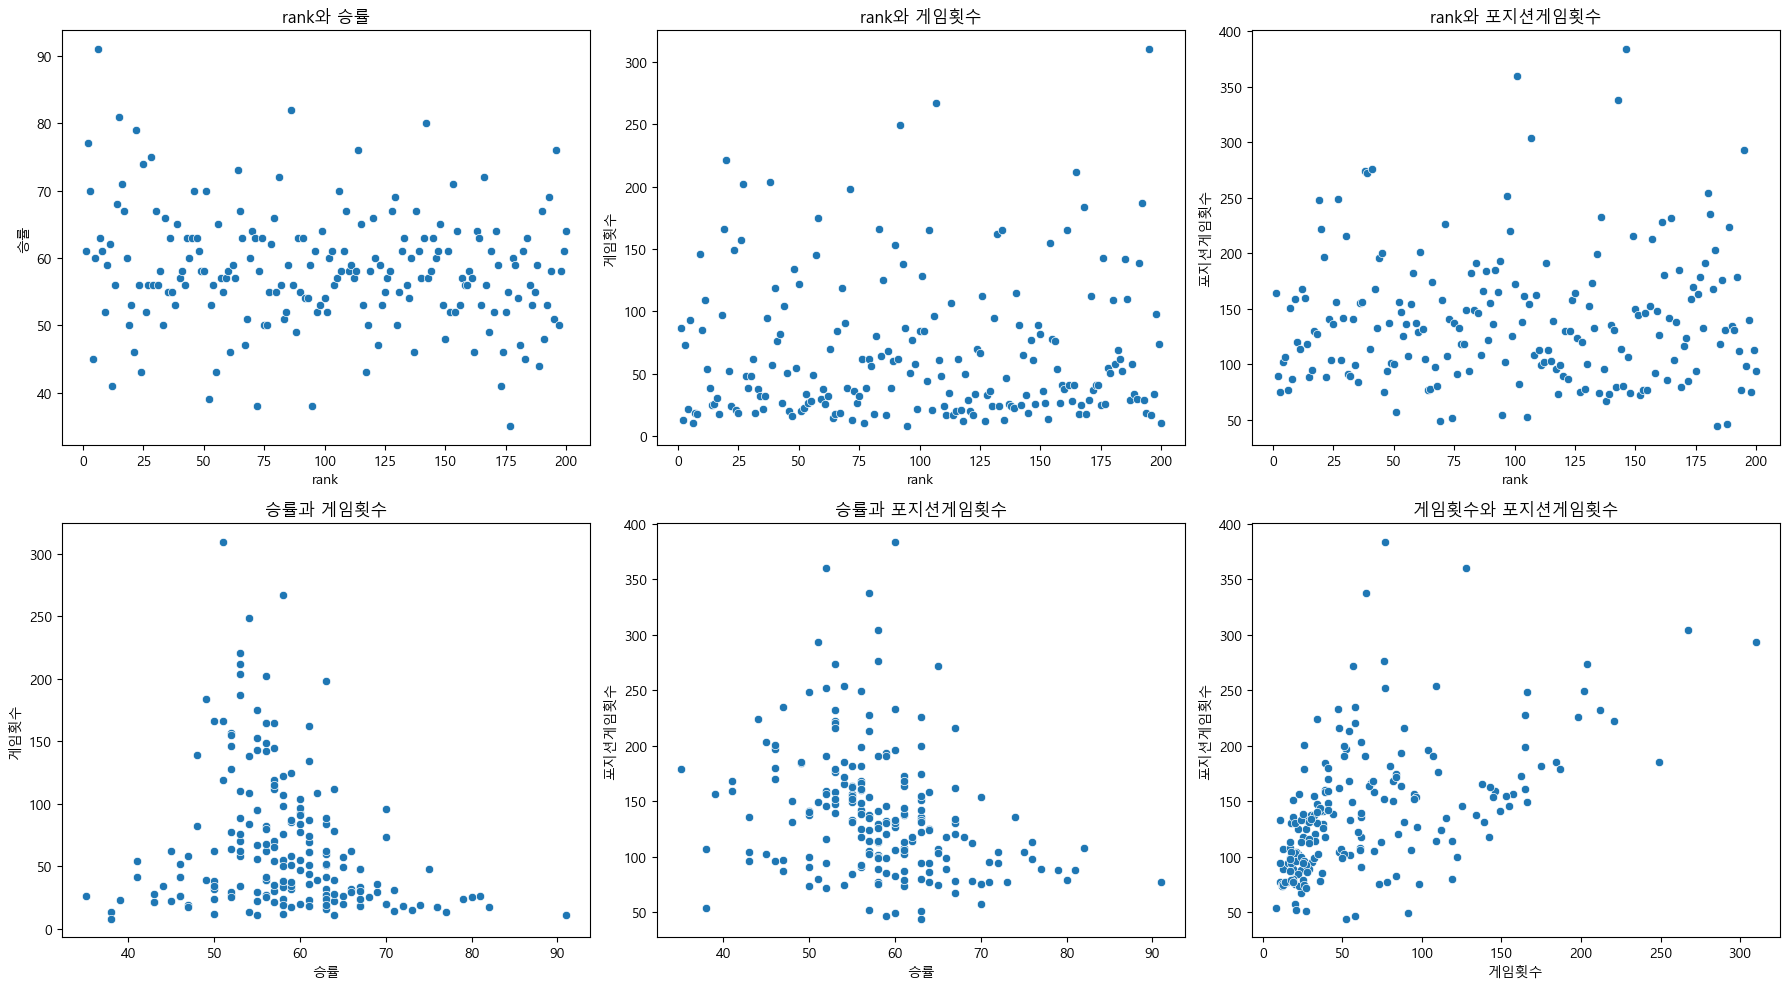

In [ ]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.scatterplot(x='rank', y='승률', data=tier_m, ax=axes[0, 0])
axes[0, 0].set_title('rank와 승률')

sns.scatterplot(x='rank', y='게임횟수', data=tier_m, ax=axes[0, 1])
axes[0, 1].set_title('rank와 게임횟수')

sns.scatterplot(x='rank', y='포지션게임횟수', data=tier_m, ax=axes[0, 2])
axes[0, 2].set_title('rank와 포지션게임횟수')

sns.scatterplot(x='승률', y='게임횟수', data=tier_m, ax=axes[1, 0])
axes[1, 0].set_title('승률과 게임횟수')

sns.scatterplot(x='승률', y='포지션게임횟수', data=tier_m, ax=axes[1, 1])
axes[1, 1].set_title('승률과 포지션게임횟수')

sns.scatterplot(x='게임횟수', y='포지션게임횟수', data=tier_m, ax=axes[1, 2])
axes[1, 2].set_title('게임횟수와 포지션게임횟수')

plt.tight_layout()
plt.show()


상관관계가 성립하려면 p값 < 0.05 이어야 하므로, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있음을 확인하고 상관계수를 파악한다

In [ ]:
print(f'승률과 게임횟수의 상관계수 :{spearmanr(tier_m['승률'], tier_m['게임횟수'])[0]}')
print(f'승률과 포지션게임횟수의 상관계수 :{spearmanr(tier_m['승률'], tier_m['포지션게임횟수'])[0]}')
print(f'게임횟수와 포지션게임횟수의 상관계수 :{spearmanr(tier_m['게임횟수'], tier_m['포지션게임횟수'])[0]}')

승률과 게임횟수의 상관계수 :-0.25694950226500013
승률과 포지션게임횟수의 상관계수 :-0.37105182303549067
게임횟수와 포지션게임횟수의 상관계수 :0.5881539258841525


확인결과, <br>
승률-게임횟수 : 약한 음의 상관관계 <br>
승률-포지션게임횟수 : 약한 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 중간정도의 양의 상관관계 임을 확인할 수 있다

- 범주형 변수간의 독립성분석

범주형 변수간의 연관관계는 카이제곱 검정을 통해 가능하므로, 카이제곱 검정을 통해 범주형 변수인 주챔피언과 포지션의 독립성을 분석한다.

In [ ]:
table_m = pd.crosstab(tier_m['주챔피언'], tier_m['포지션'])
table_m

포지션,미드,서폿,원딜,정글,탑
주챔피언,,,,,
갈리오,6,0,0,0,0
갱플랭크,1,0,0,0,1
그레이브즈,0,0,0,2,0
나피리,1,0,0,0,0
노틸러스,0,1,0,0,0
...,...,...,...,...,...
파이크,0,2,0,0,0
판테온,0,0,0,1,0
피오라,0,0,0,0,2


In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(table_m)
print(f'주챔피언과 포지션의 독립성 : {chi2_contingency(table_m)[1]}')

주챔피언과 포지션의 독립성 : 2.0149612112102452e-29


두 범주형 변수간의 독립성여부를 판단하려면 p값 > 0.05여야 하므로, <br>
주챔피언과 포지션간에는 독립성이 성립하지 않는다 (연관성 있음) <br>
두 변수간의 연관성 강도를 측정하기 위해 cramer's V 계수를 확인한다

In [ ]:
n = table_m.sum().sum() 
cramers_v = np.sqrt(chi2_stat / (n * (min(table_m.shape) - 1)))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.9450


cramer's V 계수가 0.9이므로 주챔피언과 포지션간에는 강한 연관성이 확인된다

- 다변량 분석 정리 : <br><br>

- 연속형 변수 : 'rank','승률','게임횟수','포지션게임횟수'
- 범주형 변수 : '주챔피언', '포지션' <br><br>

- 연속형 변수중 승률을 제외한 나머지 변수들은 정규성을 띄지 않음. 
- 서로 상관관계가 있는지 스피어만 검정을 통해 확인해 본 결과, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있고 <br>
승률-게임횟수 : 약한 음의 상관관계 <br>
승률-포지션게임횟수 : 약한 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 중간정도의 양의 상관관계 임을 확인할 수 있다 <br><br>

- 범주형 변수간의 연관성을 카이제곱 검정으로 확인한 결과, 주챔피언과 포지션간에는 독립성이 성립하지 않으며(연관성이 있음이 확인되며며) cramer's V 계수를 통해 확인된 연관성의 강도는 강한 것으로 확인됨.


### 5. Grand Master 티어
- 단변량분석

In [ ]:
tier_g['주챔피언'].value_counts()

주챔피언
비에고        12
제이스        12
암베사        11
리 신        10
빅토르         8
           ..
럼블          1
블라디미르       1
누누와 윌럼프     1
아우렐리온 솔     1
세나          1
Name: count, Length: 78, dtype: int64

In [ ]:
tier_g['포지션'].value_counts()

포지션
미드    45
정글    44
원딜    42
탑     39
서폿    30
Name: count, dtype: int64

In [ ]:
tier_g.sort_values('게임횟수',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
188,grandmaster,189,음유시인 #418,카이사,346,53,원딜,298
179,grandmaster,180,Honpi #KR1,라칸,264,55,서폿,268
20,grandmaster,21,虎牙丶斧帝 #zypp,드레이븐,263,55,원딜,277
79,grandmaster,80,小狮子King #DYxsz,렝가,263,54,정글,267
166,grandmaster,167,유똥별 #KR1,소라카,261,54,서폿,267
...,...,...,...,...,...,...,...,...
43,grandmaster,44,허거덩 #0303,갈리오,13,77,미드,68
115,grandmaster,116,역천괴 #Ker10,뽀삐,13,77,서폿,63
141,grandmaster,142,Capybara #ker10,이즈리얼,13,77,원딜,77
34,grandmaster,35,胡小青超酷 #douyu,오른,12,67,미드,88


In [ ]:
tier_g.sort_values('승률',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
108,grandmaster,109,도깨비참깨 #KR2,판테온,16,81,서폿,31
111,grandmaster,112,Bluffing #1207,뽀삐,20,80,서폿,132
143,grandmaster,144,심규제 #심규제,코르키,23,78,원딜,104
43,grandmaster,44,허거덩 #0303,갈리오,13,77,미드,68
115,grandmaster,116,역천괴 #Ker10,뽀삐,13,77,서폿,63
...,...,...,...,...,...,...,...,...
177,grandmaster,178,샤오 쑤A #KR1,제이스,18,44,탑,81
62,grandmaster,63,Heru #KR821,오로라,15,40,미드,122
164,grandmaster,165,HLE Eclipse3 #KR3,이즈리얼,47,38,원딜,215
154,grandmaster,155,헤이스트 #헤이스트,아크샨,45,38,미드,121


In [ ]:
tier_g.sort_values('포지션게임횟수',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
98,grandmaster,99,EFF2CT #45800,렐,70,53,서폿,394
82,grandmaster,83,ww1w #qqq,리 신,87,49,정글,358
138,grandmaster,139,롤못하는사람123 #KR1,리 신,54,50,정글,343
9,grandmaster,10,수민갱 #0830,오로라,47,51,미드,330
132,grandmaster,133,Finale #5542,빅토르,189,52,미드,325
...,...,...,...,...,...,...,...,...
43,grandmaster,44,허거덩 #0303,갈리오,13,77,미드,68
126,grandmaster,127,Bwipo #lol,코르키,43,70,원딜,66
115,grandmaster,116,역천괴 #Ker10,뽀삐,13,77,서폿,63
185,grandmaster,186,독 니 #KR1,카시오페아,99,62,탑,50


In [ ]:
tier_g.describe()

,rank,게임횟수,승률,포지션게임횟수
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,71.290000,59.135000,156.555000
std,57.879185,61.119258,8.466711,64.565241
min,1.000000,11.000000,18.000000,31.000000
25%,50.750000,27.750000,54.000000,105.750000
50%,100.500000,49.000000,59.000000,144.000000
75%,150.250000,91.500000,64.000000,199.250000
max,200.000000,346.000000,81.000000,394.000000


In [ ]:
tier_g.describe(include=object)

,티어,닉네임,주챔피언,포지션
count,200,200,200,200
unique,1,200,78,5
top,grandmaster,Keshi #Lqh,비에고,미드
freq,200,1,12,45


In [ ]:
tier_g[tier_g['주챔피언'] == '비에고']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
54,grandmaster,55,FA 정글 #05년생,비에고,96,51,정글,223
63,grandmaster,64,LFT Myunseo #I M,비에고,82,57,정글,232
70,grandmaster,71,05JUG #TAO,비에고,57,63,정글,113
84,grandmaster,85,Aumuha #1122,비에고,63,52,정글,187
91,grandmaster,92,길호태 #KR1,비에고,46,63,정글,144
105,grandmaster,106,es ju9 #pzzp,비에고,41,46,정글,145
120,grandmaster,121,zhang wen zi #KR1,비에고,26,54,정글,119
125,grandmaster,126,wjdrmf #djfuq,비에고,57,53,정글,275
134,grandmaster,135,Japiana #777,비에고,53,60,정글,197
144,grandmaster,145,Chenxii #2025,비에고,57,49,정글,151


In [ ]:
tier_g[tier_g['주챔피언'] == '제이스']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
27,grandmaster,28,괴롭히지마 #살려주세요,제이스,26,50,미드,122
41,grandmaster,42,thichnuocdua #1805,제이스,40,53,탑,178
48,grandmaster,49,탐식의 이광수 #하니보니,제이스,62,60,탑,162
65,grandmaster,66,자신감을잃지말자 #KR1,제이스,31,52,탑,132
77,grandmaster,78,戴云青 #Dai,제이스,48,69,탑,151
113,grandmaster,114,qwrqdsad #111,제이스,27,59,탑,119
122,grandmaster,123,상욱Ryu #KR1,제이스,28,50,탑,101
146,grandmaster,147,무채색 #03030,제이스,45,49,탑,199
170,grandmaster,171,17ge #snake,제이스,47,55,탑,170
176,grandmaster,177,정복자 교장선생님 #12345,제이스,19,58,미드,98


In [ ]:
tier_g[tier_g['주챔피언'] == '암베사']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
1,grandmaster,2,카리나 #8359,암베사,26,54,탑,131
2,grandmaster,3,JzJd #2628,암베사,17,47,미드,107
7,grandmaster,8,너덜너덜 #NDND,암베사,24,67,탑,83
18,grandmaster,19,kiin #KR1,암베사,21,52,탑,80
47,grandmaster,48,클래식좀들어라 #KR2,암베사,15,53,정글,71
51,grandmaster,52,Retireplayer #15ggn,암베사,74,65,탑,102
60,grandmaster,61,스트리머 백색말 #SOOP,암베사,51,65,미드,90
75,grandmaster,76,racerr #FA1,암베사,66,50,탑,224
86,grandmaster,87,어리고싶다 #KR1,암베사,29,76,탑,125
104,grandmaster,105,REJECT탑 #RC03,암베사,32,59,탑,138


In [ ]:
tier_g[tier_g['주챔피언'] == '리 신']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
13,grandmaster,14,의문의프로지망생 #KR130,리 신,45,56,정글,149
26,grandmaster,27,Wave to earth #KR37,리 신,78,56,정글,219
33,grandmaster,34,Natalie #KR 1,리 신,26,58,정글,111
82,grandmaster,83,ww1w #qqq,리 신,87,49,정글,358
89,grandmaster,90,예측불허 #KR1,리 신,121,61,정글,161
90,grandmaster,91,다정다감 #0314,리 신,46,65,정글,236
96,grandmaster,97,Rebe1Heart #0924,리 신,37,59,정글,202
138,grandmaster,139,롤못하는사람123 #KR1,리 신,54,50,정글,343
153,grandmaster,154,눈앞이캄캄 #1997,리 신,19,74,원딜,84
196,grandmaster,197,건강한 마음 #888,리 신,55,60,정글,209


In [ ]:
tier_g[tier_g['주챔피언'] == '빅토르']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
6,grandmaster,7,xxgg #zypp,빅토르,41,44,미드,180
58,grandmaster,59,shilibugou #06Mid,빅토르,24,50,미드,102
67,grandmaster,68,파멸의 이광수 #보니하니,빅토르,13,77,미드,87
85,grandmaster,86,허거덩 #KR39,빅토르,46,67,미드,113
112,grandmaster,113,i kid #아이키드,빅토르,15,60,미드,88
132,grandmaster,133,Finale #5542,빅토르,189,52,미드,325
140,grandmaster,141,전 설 #3605,빅토르,27,48,미드,182
161,grandmaster,162,恋童癖 #syyw,빅토르,90,54,미드,235


In [ ]:
print(f'게임횟수 : {shapiro(tier_g['게임횟수'])[1]}')
print(f'포지션게임횟수 : {shapiro(tier_g['포지션게임횟수'])[1]}')
print(f'승률 : {shapiro(tier_g['승률'])[1]}')

게임횟수 : 5.789853182625808e-15
포지션게임횟수 : 4.573160578247854e-07
승률 : 0.0001097986658838429


- 단변량 분석 정리 : <br><br>

그랜드 마스터 티어 랭킹 200위에서 <br>
- 가장 많이 플레이하는 주챔피언 Top5 : 비에고(정글), 제이스(탑), 암베사(탑), 리신(정글), 빅토르(미드)<br>
- 가장 많이 플레이하는 라인 순서 : 미드 > 정글 > 원딜 > 탑 > 서폿 <br>
- 게임횟수 : 평균 71.2회이나 max값이 너무 큰 경우가 있음. 게임횟수 많은순으로 정렬한 결과, 순위와는 큰 연관이 없을 것으로 예상. <br>
- 승률 : 평균 58.1%. 승률이 높은 순으로 정렬한 결과, 저티어와 다르게 0이나 100같은 극단치는 나타나지 않음. 최대치가 81%로 확인됨. <br>
- 포지션게임횟수 : 해당 라인에서 플레이한 횟수로, 평균 156회. 게임횟수나 순위와는 큰 연관이 없을 것으로 예상 <br><br>
- 게임횟수와 포지션게임횟수는 정규성을 보이지 않으나, 승률은 정규성을 보임

- 다변량 분석
    - 연속형 변수간의 상관관계 분석

In [ ]:
tier_g.groupby(['게임횟수', '승률'])['승률'].count()

게임횟수  승률
11    18    1
12    67    1
13    77    4
14    64    1
      71    1
           ..
261   54    1
263   54    1
      55    1
264   55    1
346   53    1
Name: 승률, Length: 184, dtype: int64

In [ ]:
tier_g.groupby(['rank', '게임횟수'])['게임횟수'].count()

rank  게임횟수
1     32      1
2     26      1
3     17      1
4     59      1
5     52      1
             ..
196   102     1
197   55      1
198   26      1
199   45      1
200   103     1
Name: 게임횟수, Length: 200, dtype: int64

In [ ]:
tier_g.groupby(['rank', '포지션게임횟수'])['rank'].count()

rank  포지션게임횟수
1     139        1
2     131        1
3     107        1
4     200        1
5     122        1
                ..
196   102        1
197   209        1
198   147        1
199   128        1
200   108        1
Name: rank, Length: 200, dtype: int64

In [ ]:
tier_g.groupby(['rank', '승률'])['승률'].count()

rank  승률
1     53    1
2     54    1
3     47    1
4     58    1
5     62    1
           ..
196   57    1
197   60    1
198   58    1
199   64    1
200   67    1
Name: 승률, Length: 200, dtype: int64

In [ ]:
tier_g.groupby(['포지션게임횟수', '승률'])['포지션게임횟수'].count()

포지션게임횟수  승률
31       81    1
50       62    1
63       77    1
66       70    1
68       77    1
              ..
325      52    1
330      51    1
343      50    1
358      49    1
394      53    1
Name: 포지션게임횟수, Length: 193, dtype: int64

- 위에서 확인했듯이 모든 연속형 변수가 정규성을 가지는 것은 아니기 때문에 스피어만 상관계수를 통해 두 변수간의 상관관계를 확인한다
- 스피어만 상관계수는 정규성을 가지는 변수와 그렇지 않은 변수간의 상관관계를 파악할 때도 활용이 가능하다

In [ ]:
print(f'rank와 승률의 상관관계 : {spearmanr(tier_g['rank'], tier_g['승률'])[1]}')
print(f'rank와 게임횟수의 상관관계 : {spearmanr(tier_g['rank'], tier_g['게임횟수'])[1]}')
print(f'rank와 포지션게임횟수의 상관관계 :{spearmanr(tier_g['rank'], tier_g['포지션게임횟수'])[1]}')
print(f'승률과 게임횟수의 상관관계 :{spearmanr(tier_g['승률'], tier_g['게임횟수'])[1]}')
print(f'승률과 포지션게임횟수의 상관관계 :{spearmanr(tier_g['승률'], tier_g['포지션게임횟수'])[1]}')
print(f'게임횟수와 포지션게임횟수의 상관관계 :{spearmanr(tier_g['게임횟수'], tier_g['포지션게임횟수'])[1]}')

rank와 승률의 상관관계 : 0.2453491072596267
rank와 게임횟수의 상관관계 : 0.36354013113211137
rank와 포지션게임횟수의 상관관계 :0.4193619877832313
승률과 게임횟수의 상관관계 :0.004925620610126506
승률과 포지션게임횟수의 상관관계 :4.751451683987349e-09
게임횟수와 포지션게임횟수의 상관관계 :9.998360366908818e-16


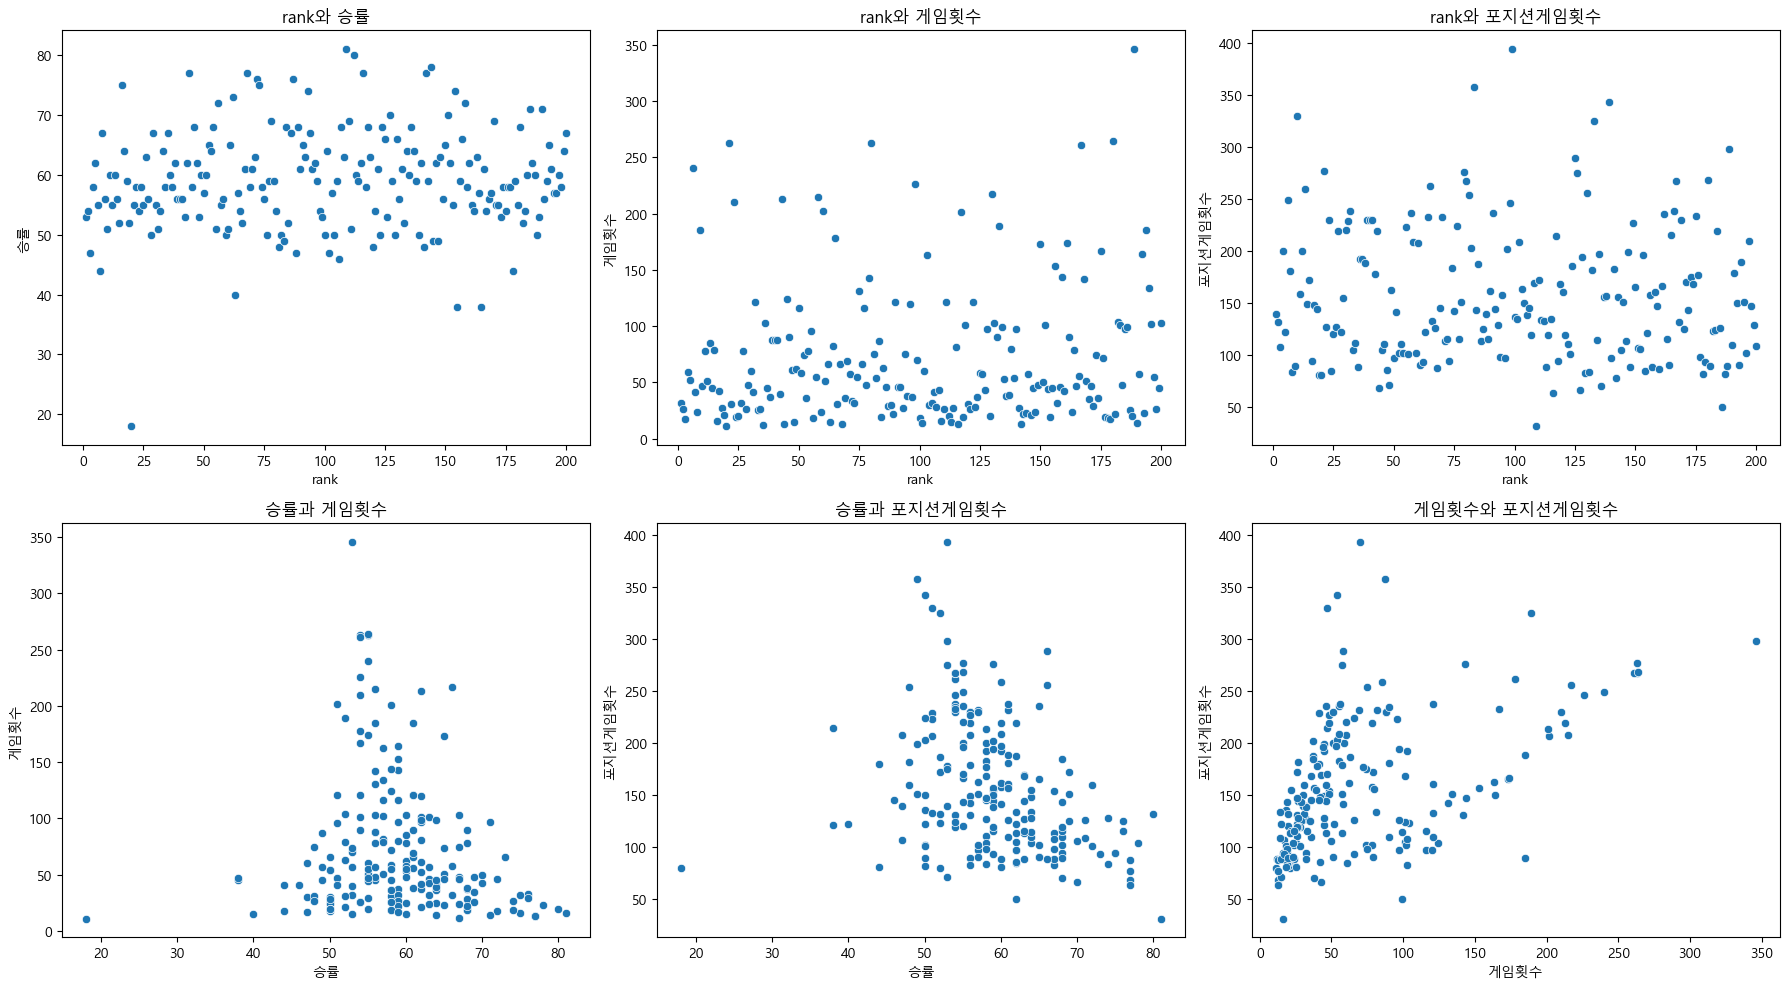

In [ ]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.scatterplot(x='rank', y='승률', data=tier_g, ax=axes[0, 0])
axes[0, 0].set_title('rank와 승률')

sns.scatterplot(x='rank', y='게임횟수', data=tier_g, ax=axes[0, 1])
axes[0, 1].set_title('rank와 게임횟수')

sns.scatterplot(x='rank', y='포지션게임횟수', data=tier_g, ax=axes[0, 2])
axes[0, 2].set_title('rank와 포지션게임횟수')

sns.scatterplot(x='승률', y='게임횟수', data=tier_g, ax=axes[1, 0])
axes[1, 0].set_title('승률과 게임횟수')

sns.scatterplot(x='승률', y='포지션게임횟수', data=tier_g, ax=axes[1, 1])
axes[1, 1].set_title('승률과 포지션게임횟수')

sns.scatterplot(x='게임횟수', y='포지션게임횟수', data=tier_g, ax=axes[1, 2])
axes[1, 2].set_title('게임횟수와 포지션게임횟수')

plt.tight_layout()
plt.show()


상관관계가 성립하려면 p값 < 0.05 이어야 하므로, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있음을 확인하고 상관계수를 파악한다

In [ ]:
print(f'승률과 게임횟수의 상관계수 :{spearmanr(tier_g['승률'], tier_g['게임횟수'])[0]}')
print(f'승률과 포지션게임횟수의 상관계수 :{spearmanr(tier_g['승률'], tier_g['포지션게임횟수'])[0]}')
print(f'게임횟수와 포지션게임횟수의 상관계수 :{spearmanr(tier_g['게임횟수'], tier_g['포지션게임횟수'])[0]}')

승률과 게임횟수의 상관계수 :-0.1980958371796139
승률과 포지션게임횟수의 상관계수 :-0.39921470067057147
게임횟수와 포지션게임횟수의 상관계수 :0.5275842973718868


확인결과, <br>
승률-게임횟수 : 거의 상관 없음 <br>
승률-포지션게임횟수 : 약한 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 중간정도의 양의 상관관계 임을 확인할 수 있다

- 범주형 변수간의 독립성분석

범주형 변수간의 연관관계는 카이제곱 검정을 통해 가능하므로, 카이제곱 검정을 통해 범주형 변수인 주챔피언과 포지션의 독립성을 분석한다.

In [ ]:
table_g = pd.crosstab(tier_g['주챔피언'], tier_g['포지션'])
table_g

포지션,미드,서폿,원딜,정글,탑
주챔피언,,,,,
갈리오,2,0,0,0,1
노틸러스,0,1,0,0,0
누누와 윌럼프,0,0,0,1,0
니달리,0,0,0,1,0
니코,0,1,0,0,0
...,...,...,...,...,...
티모,0,0,0,0,1
파이크,0,1,0,0,0
판테온,0,1,0,1,1


In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(table_g)
print(f'주챔피언과 포지션의 독립성 : {chi2_contingency(table_g)[1]}')

주챔피언과 포지션의 독립성 : 8.686146412574686e-32


두 범주형 변수간의 독립성여부를 판단하려면 p값 > 0.05여야 하므로, <br>
주챔피언과 포지션간에는 독립성이 성립하지 않는다 (연관성 있음) <br>
두 변수간의 연관성 강도를 측정하기 위해 cramer's V 계수를 확인한다

In [ ]:
n = table_g.sum().sum() 
cramers_v = np.sqrt(chi2_stat / (n * (min(table_g.shape) - 1)))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.9313


cramer's V 계수가 0.9이므로 주챔피언과 포지션간에는 강한 연관성이 확인된다

- 다변량 분석 정리 : <br><br>

- 연속형 변수 : 'rank','승률','게임횟수','포지션게임횟수'
- 범주형 변수 : '주챔피언', '포지션' <br><br>

- 연속형 변수중 승률을 제외한 나머지 변수들은 정규성을 띄지 않음. 
- 서로 상관관계가 있는지 스피어만 검정을 통해 확인해 본 결과, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있고 <br>
승률-게임횟수 : 거의 상관 없음 <br>
승률-포지션게임횟수 : 약한 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 중간정도의 양의 상관관계 임을 확인할 수 있다 <br><br>

- 범주형 변수간의 연관성을 카이제곱 검정으로 확인한 결과, 주챔피언과 포지션간에는 독립성이 성립하지 않으며(연관성이 있음이 확인되며며) cramer's V 계수를 통해 확인된 연관성의 강도는 강한 것으로 확인됨.


### 6. Challenger 티어
- 단변량분석

In [ ]:
tier_c['주챔피언'].value_counts()

주챔피언
이즈리얼     20
비에고      13
렐        11
미스 포츈    10
암베사       8
         ..
올라프       1
브라이어      1
아트록스      1
카르마       1
렝가        1
Name: count, Length: 68, dtype: int64

In [ ]:
tier_c['포지션'].value_counts()

포지션
정글    45
원딜    42
미드    40
탑     39
서폿    33
Name: count, dtype: int64

In [ ]:
tier_c.sort_values('게임횟수',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
183,challenger,184,두둠칫 #바 드,바드,341,53,서폿,354
2,challenger,3,LOVE WIN #KR1,제라스,318,58,미드,429
154,challenger,155,행복한 사람이 되다 #888,볼리베어,310,55,탑,243
177,challenger,178,hy442975 #N J F,피들스틱,302,54,정글,196
16,challenger,17,YeQiuFengZZ #叶秋枫,키아나,281,54,미드,246
...,...,...,...,...,...,...,...,...
5,challenger,6,JUGKlNG #KR1,니달리,18,78,정글,79
41,challenger,42,Duro #Gen,사일러스,18,72,서폿,130
76,challenger,77,Beware #KR2,이즈리얼,15,73,원딜,80
151,challenger,152,수원 남현준 #1111,제리,14,64,미드,94


In [ ]:
tier_c.sort_values('승률',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
81,challenger,82,알파메일이태영 #0707,니코,39,85,서폿,108
169,challenger,170,Valhalla #9 9,사일러스,38,82,미드,168
13,challenger,14,Blue #KR33,이즈리얼,20,80,원딜,94
5,challenger,6,JUGKlNG #KR1,니달리,18,78,정글,79
157,challenger,158,ckadmfdls #zypp,알리스타,28,75,서폿,100
...,...,...,...,...,...,...,...,...
70,challenger,71,sdsagfhjfdx #666,이즈리얼,55,45,원딜,258
59,challenger,60,DDo1V #DNF,리 신,25,44,정글,118
26,challenger,27,민철이여친구함 #0415,갈리오,24,42,미드,125
53,challenger,54,딸기따르트으 #KR1,크산테,51,41,탑,233


In [ ]:
tier_c.sort_values('포지션게임횟수',ascending=False)

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
197,challenger,198,kfo #KR1,블라디미르,259,56,탑,506
2,challenger,3,LOVE WIN #KR1,제라스,318,58,미드,429
179,challenger,180,경상도 왕 #1111,비에고,109,54,정글,405
52,challenger,53,Dahanshuangc #扬我国威,세라핀,143,53,서폿,384
121,challenger,122,FA 김문찬 #07년생,코르키,57,63,원딜,380
...,...,...,...,...,...,...,...,...
170,challenger,171,Oner #KR222,리 신,21,52,정글,78
136,challenger,137,cikcik #KR1,제이스,14,71,미드,77
113,challenger,114,Phago #0312,갱플랭크,48,65,탑,74
143,challenger,144,꼬마딩구리 #KR1,오리아나,42,67,미드,65


In [ ]:
tier_c.describe()

,rank,게임횟수,승률,포지션게임횟수
count,199.000000,199.000000,199.00000,199.000000
mean,100.000000,79.597990,59.38191,181.105528
std,57.590508,65.007297,7.15802,71.484292
min,1.000000,14.000000,41.00000,59.000000
25%,50.500000,36.500000,55.00000,133.500000
50%,100.000000,53.000000,59.00000,165.000000
75%,149.500000,97.500000,63.00000,219.500000
max,199.000000,341.000000,85.00000,506.000000


In [ ]:
tier_c.describe(include=object)

,티어,닉네임,주챔피언,포지션
count,199,199,199,199
unique,1,199,68,5
top,challenger,닝 닝 #1126,이즈리얼,정글
freq,199,1,20,45


In [ ]:
tier_c[tier_c['주챔피언'] == '이즈리얼']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
4,challenger,5,스컬지 #K T,이즈리얼,39,59,원딜,119
6,challenger,7,langmanbusi #KR1,이즈리얼,23,70,미드,140
13,challenger,14,Blue #KR33,이즈리얼,20,80,원딜,94
18,challenger,19,T1 Gumayusi #KR1,이즈리얼,36,58,원딜,149
32,challenger,33,T1 Smash #KR3,이즈리얼,20,60,원딜,108
36,challenger,37,소년가장 원딜 #KR1,이즈리얼,37,70,원딜,149
39,challenger,40,Juhana #DRX25,이즈리얼,31,65,정글,151
44,challenger,45,soop ART #ART,이즈리얼,31,55,원딜,203
60,challenger,61,귀찮게하지마 #KR3,이즈리얼,31,52,원딜,111
67,challenger,68,근데 막 어른이 돼 #0303,이즈리얼,35,69,원딜,184


In [ ]:
tier_c[tier_c['주챔피언'] == '비에고']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
10,challenger,11,Attack Fight #0923,비에고,89,62,정글,268
30,challenger,31,멍란1 #yaha,비에고,84,62,정글,243
40,challenger,41,Epilogue for you #EP1,비에고,74,50,정글,227
57,challenger,58,빨뚜참이슬 #하이트,비에고,36,72,정글,122
58,challenger,59,Swamp #0916,비에고,53,57,정글,152
72,challenger,73,中 国 #中 国,비에고,34,62,정글,111
92,challenger,93,Kimman #zxfkk,비에고,21,62,정글,98
103,challenger,104,kai #59666,비에고,28,54,정글,135
123,challenger,124,일산전영찬 #KR1,비에고,57,56,정글,163
125,challenger,126,Shout Baby #0123,비에고,46,61,정글,168


In [ ]:
tier_c[tier_c['주챔피언'] == '렐']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
7,challenger,8,Parukia #Maga,렐,42,64,서폿,149
22,challenger,23,Lovepanpan #KR1,렐,69,49,서폿,344
46,challenger,47,Berrrrrr #KR3,렐,57,61,서폿,220
83,challenger,84,니 아 #KR00,렐,19,47,서폿,143
108,challenger,109,Always With U xD #0907,렐,32,59,서폿,155
112,challenger,113,골가나르 #3972,렐,189,56,서폿,237
129,challenger,130,shy9 29 #2008,렐,56,68,서폿,196
176,challenger,177,렐복치 #KR1,렐,139,57,서폿,153
178,challenger,179,독박 이니시 #안해 못해,렐,104,61,서폿,368
190,challenger,191,喜欢吃薯条 #Chips,렐,98,59,서폿,222


In [ ]:
tier_c[tier_c['주챔피언'] == '미스 포츈']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
34,challenger,35,누완노 #한재성,미스 포츈,37,59,원딜,154
38,challenger,39,NASA #쟁 구,미스 포츈,72,64,원딜,169
62,challenger,63,WE GO #이나경,미스 포츈,55,51,원딜,264
78,challenger,79,치피치피차파차파 #0918,미스 포츈,36,61,원딜,142
87,challenger,88,your era #3031,미스 포츈,81,57,원딜,213
128,challenger,129,미국인이며 #bee,미스 포츈,21,52,서폿,103
134,challenger,135,홀로서기 #KR3,미스 포츈,80,55,원딜,148
140,challenger,141,희라콩콩이 #0429,미스 포츈,53,57,원딜,169
155,challenger,156,FA휘파 #zepa,미스 포츈,66,59,원딜,273
161,challenger,162,小枣小枣 #wxuzi,미스 포츈,122,57,원딜,234


In [ ]:
tier_c[tier_c['주챔피언'] == '암베사']

,티어,rank,닉네임,주챔피언,게임횟수,승률,포지션,포지션게임횟수
8,challenger,9,차가운코끼리 #KR0,암베사,88,56,탑,198
21,challenger,22,FA holder #KR2,암베사,42,55,탑,190
50,challenger,51,2024FMVP #KR1,암베사,34,59,미드,142
68,challenger,69,14小孩幻想赢对线 #4453,암베사,74,55,탑,213
75,challenger,76,사박궤 #123,암베사,65,49,탑,179
79,challenger,80,This game canwin #KR1,암베사,40,53,탑,141
109,challenger,110,66666 #444,암베사,51,53,미드,263
137,challenger,138,Zimmer #KR5,암베사,41,49,탑,162


In [ ]:
print(f'게임횟수 : {shapiro(tier_c['게임횟수'])[1]}')
print(f'포지션게임횟수 : {shapiro(tier_c['포지션게임횟수'])[1]}')
print(f'승률 : {shapiro(tier_c['승률'])[1]}')

게임횟수 : 1.2841682000960052e-15
포지션게임횟수 : 2.850031529698586e-09
승률 : 0.0021202845863704817


- 단변량 분석 정리 : <br><br>

챌린저 티어 랭킹 200위에서 <br>
- 가장 많이 플레이하는 주챔피언 Top5 : 이즈리얼(원딜), 비에고(정글), 렐(서폿), 미스 포츈(원딜), 암베사(탑)<br>
- 가장 많이 플레이하는 라인 순서 : 정글 > 원딜 > 미드 > 탑 > 서폿 <br>
- 게임횟수 : 평균 79.5회이나 max값이 너무 큰 경우가 있음. 게임횟수 많은순으로 정렬한 결과, 순위와는 큰 연관이 없을 것으로 예상. <br>
- 승률 : 평균 59.3%. 승률이 높은 순으로 정렬한 결과, 바로 직전 티어인 그랜드 마스터보다도 최소치가 상승하나 최대치는 85%로 비슷한 값을 보임. <br>
- 포지션게임횟수 : 해당 라인에서 플레이한 횟수로, 평균 181회. 게임횟수나 순위와는 큰 연관이 없을 것으로 예상 <br><br>
- 게임횟수와 포지션게임횟수는 정규성을 보이지 않으나, 승률은 정규성을 보임

- 다변량 분석
    - 연속형 변수간의 상관관계 분석

In [ ]:
tier_c.groupby(['게임횟수', '승률'])['승률'].count()

게임횟수  승률
14    64    1
      71    1
15    73    1
18    72    1
      78    1
           ..
281   54    1
302   54    1
310   55    1
318   58    1
341   53    1
Name: 승률, Length: 184, dtype: int64

In [ ]:
tier_c.groupby(['rank', '게임횟수'])['게임횟수'].count()

rank  게임횟수
1     109     1
2     175     1
3     318     1
4     96      1
5     39      1
             ..
195   52      1
196   115     1
197   95      1
198   259     1
199   33      1
Name: 게임횟수, Length: 199, dtype: int64

In [ ]:
tier_c.groupby(['rank', '포지션게임횟수'])['rank'].count()

rank  포지션게임횟수
1     295        1
2     199        1
3     429        1
4     263        1
5     119        1
                ..
195   146        1
196   129        1
197   109        1
198   506        1
199   89         1
Name: rank, Length: 199, dtype: int64

In [ ]:
tier_c.groupby(['rank', '승률'])['승률'].count()

rank  승률
1     57    1
2     62    1
3     58    1
4     50    1
5     59    1
           ..
195   60    1
196   56    1
197   59    1
198   56    1
199   58    1
Name: 승률, Length: 199, dtype: int64

In [ ]:
tier_c.groupby(['포지션게임횟수', '승률'])['포지션게임횟수'].count()

포지션게임횟수  승률
59       70    1
65       67    1
74       65    1
77       71    1
78       52    1
              ..
380      63    1
384      53    1
405      54    1
429      58    1
506      56    1
Name: 포지션게임횟수, Length: 194, dtype: int64

- 위에서 확인했듯이 모든 연속형 변수가 정규성을 가지는 것은 아니기 때문에 스피어만 상관계수를 통해 두 변수간의 상관관계를 확인한다
- 스피어만 상관계수는 정규성을 가지는 변수와 그렇지 않은 변수간의 상관관계를 파악할 때도 활용이 가능하다

In [ ]:
print(f'rank와 승률의 상관관계 : {spearmanr(tier_c['rank'], tier_c['승률'])[1]}')
print(f'rank와 게임횟수의 상관관계 : {spearmanr(tier_c['rank'], tier_c['게임횟수'])[1]}')
print(f'rank와 포지션게임횟수의 상관관계 :{spearmanr(tier_c['rank'], tier_c['포지션게임횟수'])[1]}')
print(f'승률과 게임횟수의 상관관계 :{spearmanr(tier_c['승률'], tier_c['게임횟수'])[1]}')
print(f'승률과 포지션게임횟수의 상관관계 :{spearmanr(tier_c['승률'], tier_c['포지션게임횟수'])[1]}')
print(f'게임횟수와 포지션게임횟수의 상관관계 :{spearmanr(tier_c['게임횟수'], tier_c['포지션게임횟수'])[1]}')

rank와 승률의 상관관계 : 0.8155972297197019
rank와 게임횟수의 상관관계 : 0.04934181464391436
rank와 포지션게임횟수의 상관관계 :0.3800392883288579
승률과 게임횟수의 상관관계 :0.03198836527838241
승률과 포지션게임횟수의 상관관계 :0.001415453181440943
게임횟수와 포지션게임횟수의 상관관계 :5.40661766194206e-13


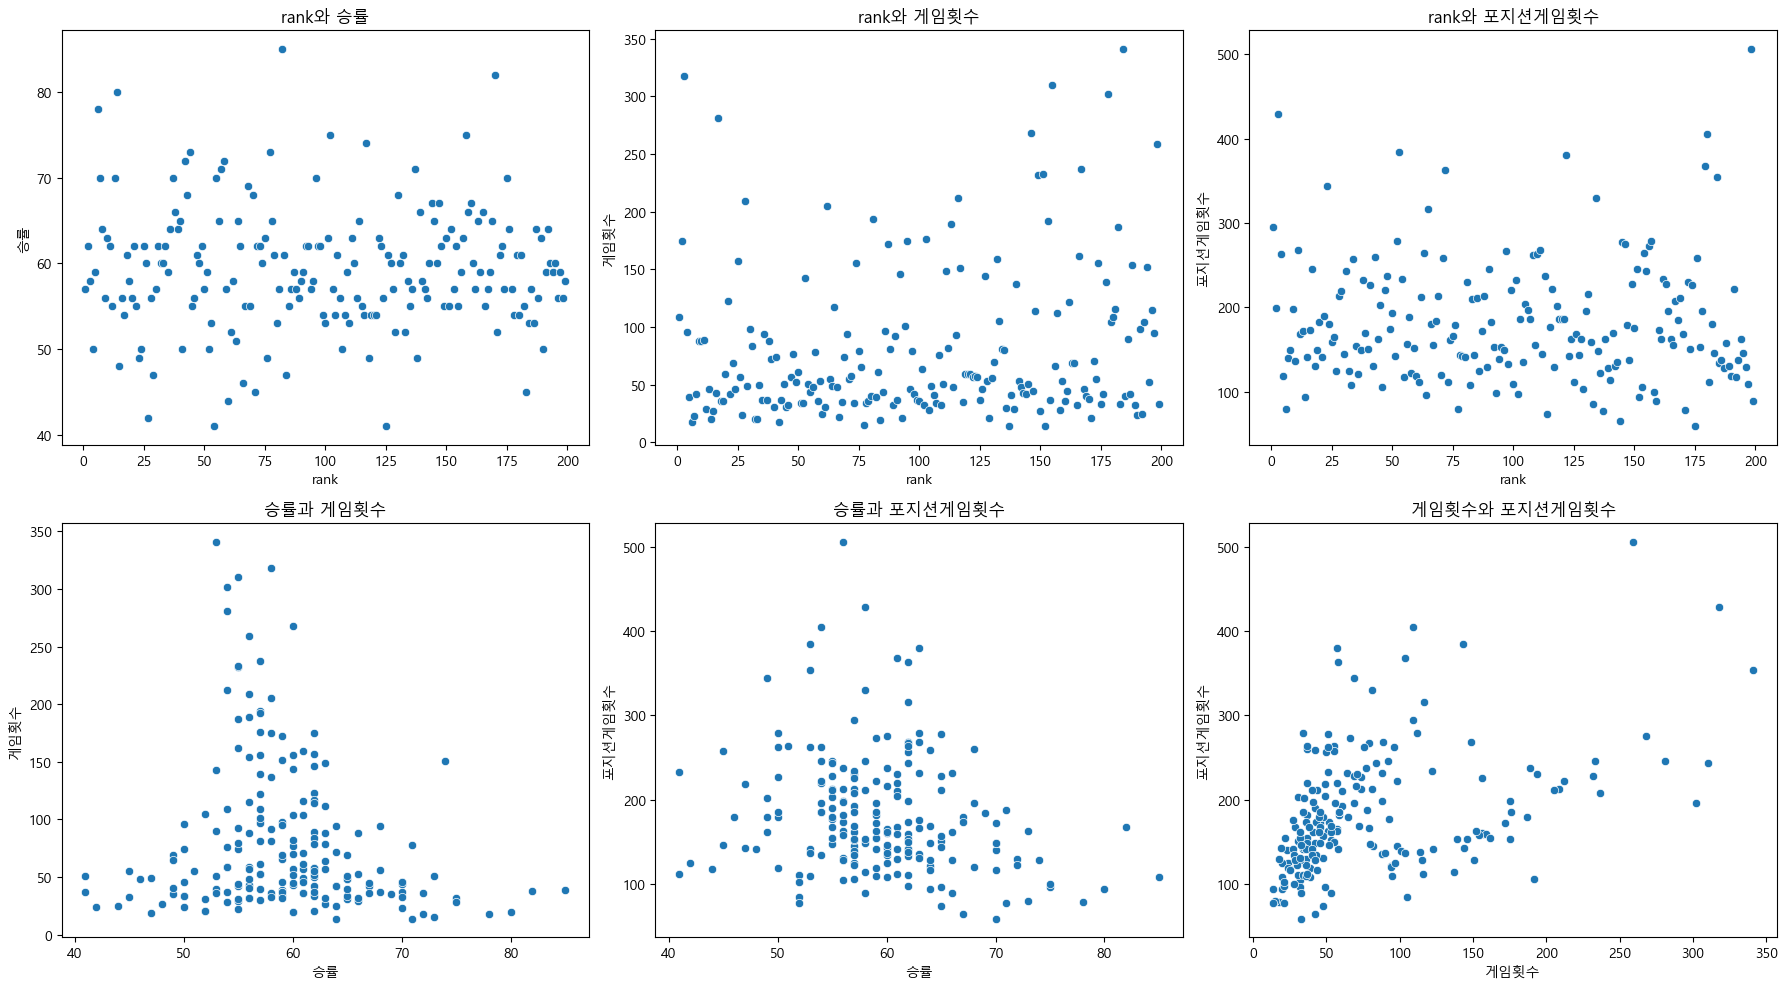

In [ ]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.scatterplot(x='rank', y='승률', data=tier_c, ax=axes[0, 0])
axes[0, 0].set_title('rank와 승률')

sns.scatterplot(x='rank', y='게임횟수', data=tier_c, ax=axes[0, 1])
axes[0, 1].set_title('rank와 게임횟수')

sns.scatterplot(x='rank', y='포지션게임횟수', data=tier_c, ax=axes[0, 2])
axes[0, 2].set_title('rank와 포지션게임횟수')

sns.scatterplot(x='승률', y='게임횟수', data=tier_c, ax=axes[1, 0])
axes[1, 0].set_title('승률과 게임횟수')

sns.scatterplot(x='승률', y='포지션게임횟수', data=tier_c, ax=axes[1, 1])
axes[1, 1].set_title('승률과 포지션게임횟수')

sns.scatterplot(x='게임횟수', y='포지션게임횟수', data=tier_c, ax=axes[1, 2])
axes[1, 2].set_title('게임횟수와 포지션게임횟수')

plt.tight_layout()
plt.show()


상관관계가 성립하려면 p값 < 0.05 이어야 하므로, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있음을 확인하고 상관계수를 파악한다

In [ ]:
print(f'승률과 게임횟수의 상관계수 :{spearmanr(tier_c['승률'], tier_c['게임횟수'])[0]}')
print(f'승률과 포지션게임횟수의 상관계수 :{spearmanr(tier_c['승률'], tier_c['포지션게임횟수'])[0]}')
print(f'게임횟수와 포지션게임횟수의 상관계수 :{spearmanr(tier_c['게임횟수'], tier_c['포지션게임횟수'])[0]}')

승률과 게임횟수의 상관계수 :-0.15209611444889792
승률과 포지션게임횟수의 상관계수 :-0.2247524393396925
게임횟수와 포지션게임횟수의 상관계수 :0.4823895396414712


확인결과, <br>
승률-게임횟수 : 거의 상관없음 <br>
승률-포지션게임횟수 : 약한 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 중간정도의 양의 상관관계 임을 확인할 수 있다

- 범주형 변수간의 독립성분석

범주형 변수간의 연관관계는 카이제곱 검정을 통해 가능하므로, 카이제곱 검정을 통해 범주형 변수인 주챔피언과 포지션의 독립성을 분석한다.

In [ ]:
table_c = pd.crosstab(tier_c['주챔피언'], tier_c['포지션'])
table_c

포지션,미드,서폿,원딜,정글,탑
주챔피언,,,,,
갈리오,2,0,0,0,0
갱플랭크,0,0,0,0,2
그레이브즈,0,0,0,1,0
노틸러스,0,2,0,0,0
녹턴,0,0,0,0,1
...,...,...,...,...,...
판테온,0,0,0,2,1
피들스틱,0,0,0,2,0
피오라,0,0,0,0,2


In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(table_c)
print(f'주챔피언과 포지션의 독립성 : {chi2_contingency(table_c)[1]}')

주챔피언과 포지션의 독립성 : 8.37292993921358e-39


두 범주형 변수간의 독립성여부를 판단하려면 p값 > 0.05여야 하므로, <br>
주챔피언과 포지션간에는 독립성이 성립하지 않는다 (연관성 있음) <br>
두 변수간의 연관성 강도를 측정하기 위해 cramer's V 계수를 확인한다

In [ ]:
n = table_c.sum().sum()  
cramers_v = np.sqrt(chi2_stat / (n * (min(table_c.shape) - 1)))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.9301


cramer's V 계수가 0.9이므로 주챔피언과 포지션간에는 강한 연관성이 확인된다

- 다변량 분석 정리 : <br><br>

- 연속형 변수 : 'rank','승률','게임횟수','포지션게임횟수'
- 범주형 변수 : '주챔피언', '포지션' <br><br>

- 연속형 변수중 승률을 제외한 나머지 변수들은 정규성을 띄지 않음. 
- 서로 상관관계가 있는지 스피어만 검정을 통해 확인해 본 결과, <br>
승률-게임횟수, 승률-포지션게임횟수, 게임횟수-포지션게임횟수 세가지 조건만이 상관관계가 있고 <br>
승률-게임횟수 : 거의 상관 없음 <br>
승률-포지션게임횟수 : 약한 음의 상관관계 <br>
게임횟수-포지션게임횟수 : 중간정도의 양의 상관관계 임을 확인할 수 있다 <br><br>

- 범주형 변수간의 연관성을 카이제곱 검정으로 확인한 결과, 주챔피언과 포지션간에는 독립성이 성립하지 않으며(연관성이 있음이 확인되며며) cramer's V 계수를 통해 확인된 연관성의 강도는 강한 것으로 확인됨.


### 7. 티어별 승률, 게임횟수, 포지션게임횟수의 분포 차이

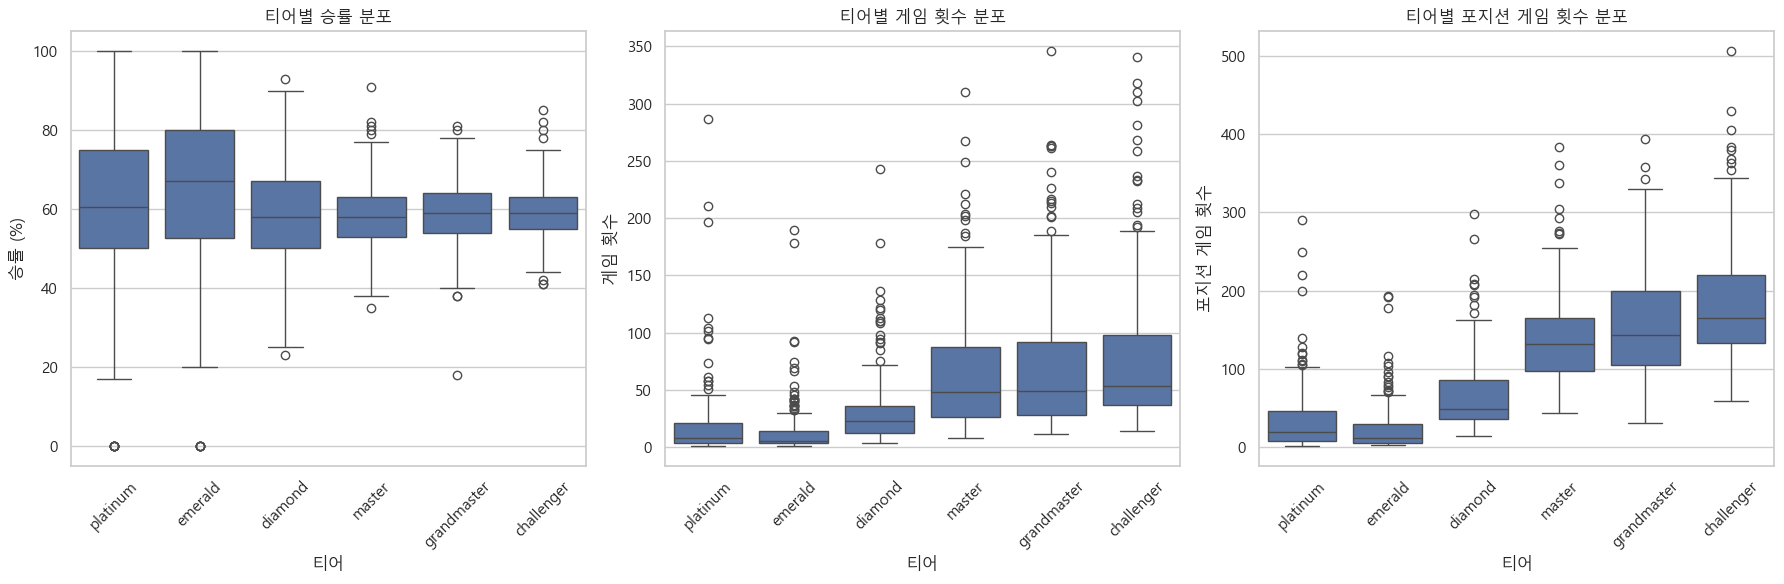

In [ ]:
sns.set(style="whitegrid")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], x="티어", y="승률", data=df_ranker_info, order=["platinum", "emerald", "diamond", "master", "grandmaster", "challenger"])
axes[0].set_title("티어별 승률 분포")
axes[0].set_xlabel("티어")
axes[0].set_ylabel("승률 (%)")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1], x="티어", y="게임횟수", data=df_ranker_info, order=["platinum", "emerald", "diamond", "master", "grandmaster", "challenger"])
axes[1].set_title("티어별 게임 횟수 분포")
axes[1].set_xlabel("티어")
axes[1].set_ylabel("게임 횟수")
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[2], x="티어", y="포지션게임횟수", data=df_ranker_info, order=["platinum", "emerald", "diamond", "master", "grandmaster", "challenger"])
axes[2].set_title("티어별 포지션 게임 횟수 분포")
axes[2].set_xlabel("티어")
axes[2].set_ylabel("포지션 게임 횟수")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


- 분석결과, 티어가 높아질 수록 승률의 분포의 폭이 좁아지지만 게임횟수와 포지션게임횟수의 분포의 폭이 커짐을 알 수 있고, 특히 포지션게임횟수는 기본적인 수치 자체가 증가함을 알 수 있다.

### 8. 티어별 최빈챔피언 Top5와 티어별 포지션 분포

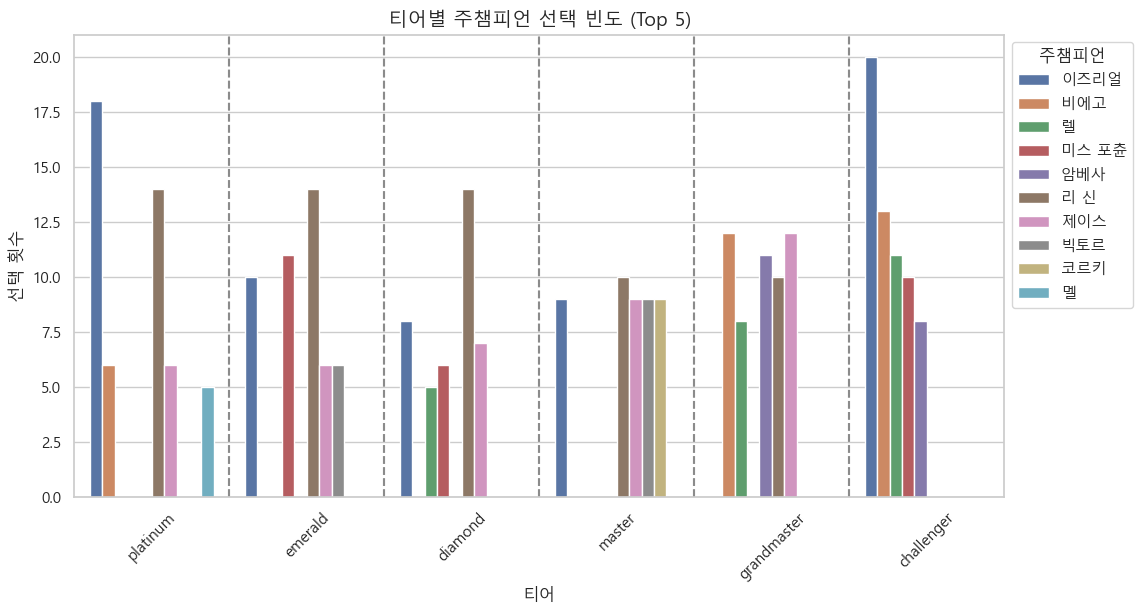

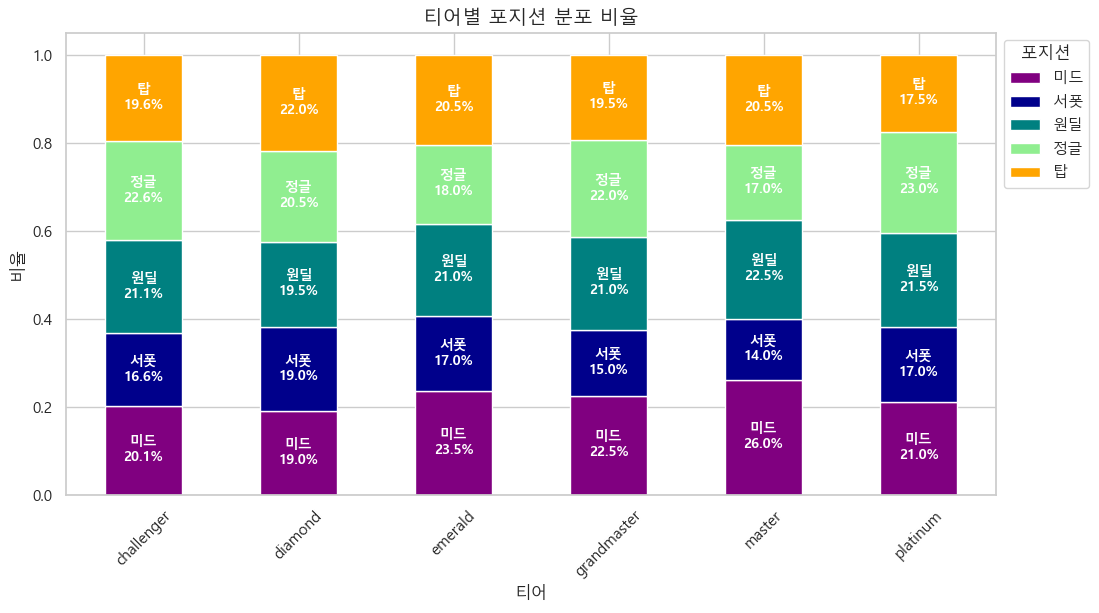

In [ ]:
sns.set(style="whitegrid")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  

champ_counts = df_ranker_info.groupby("티어")["주챔피언"].value_counts().groupby(level=0).head(5).reset_index()
champ_counts.columns = ["티어", "주챔피언", "횟수"]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="티어", y="횟수", hue="주챔피언", data=champ_counts, order=["platinum", "emerald", "diamond", "master", "grandmaster", "challenger"])
plt.title("티어별 주챔피언 선택 빈도 (Top 5)", fontsize=14)
plt.xlabel("티어")
plt.ylabel("선택 횟수")
plt.xticks(rotation=45)
plt.legend(title="주챔피언", bbox_to_anchor=(1, 1))

tier_positions = range(len(["platinum", "emerald", "diamond", "master", "grandmaster", "challenger"]))
for pos in tier_positions[:-1]:  
    ax.axvline(x=pos + 0.5, color="gray", linestyle="--", alpha=0.7)  

tier_positions = range(len(["platinum", "emerald", "diamond", "master", "grandmaster", "challenger"]))
for pos in tier_positions[:-1]: 
    ax.axvline(x=pos + 0.5, color="gray", linestyle="--", alpha=0.7)  

plt.show()


position_counts = df_ranker_info.groupby("티어")["포지션"].value_counts(normalize=True).unstack()

colors = ["purple", "darkblue", "teal", "lightgreen", "orange"]

fig, ax = plt.subplots(figsize=(12, 6))
position_counts.plot(kind="bar", stacked=True, color=colors, ax=ax)

plt.title("티어별 포지션 분포 비율", fontsize=14)
plt.xlabel("티어")
plt.ylabel("비율")
plt.xticks(rotation=45)
plt.legend(title="포지션", bbox_to_anchor=(1, 1))

for i, tier in enumerate(position_counts.index):  
    cumulative_height = 0  
    for j, position in enumerate(position_counts.columns): 
        height = position_counts.loc[tier, position]
        if height > 0.05:  
            ax.text(i, cumulative_height + height / 2, f"{position}\n{height:.1%}",
                    ha="center", va="center", fontsize=10, color="white", fontweight="bold")
        cumulative_height += height  

plt.show()


### 9. 티어별 승률 분포

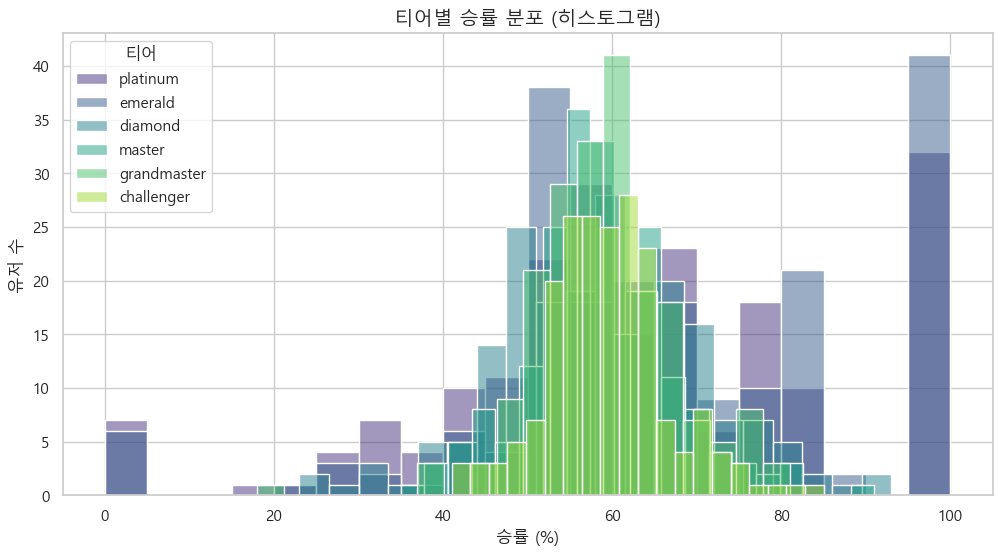

C:\Users\Haeun\AppData\Local\Temp\ipykernel_8364\3016663570.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_combined[df_combined["티어"] == tier]["승률"], shade=True, color=color, label=tier, alpha=0.7)
C:\Users\Haeun\AppData\Local\Temp\ipykernel_8364\3016663570.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_combined[df_combined["티어"] == tier]["승률"], shade=True, color=color, label=tier, alpha=0.7)
C:\Users\Haeun\AppData\Local\Temp\ipykernel_8364\3016663570.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_combined[df_combined["티어"] == tier]["승률"], shade=True, color=color, label=tier, alpha=0.7)
C:\User

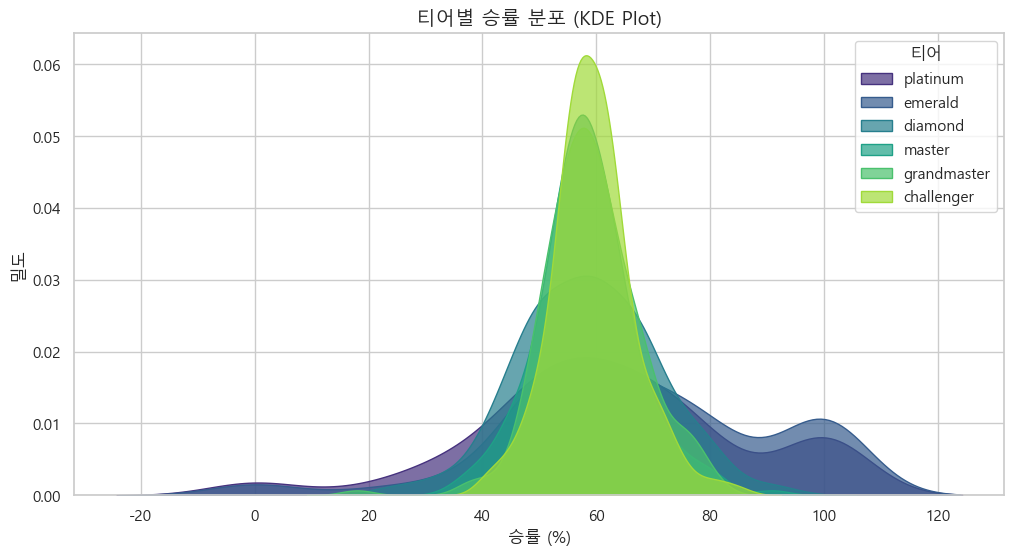

In [ ]:
sns.set(style="whitegrid")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  

plt.figure(figsize=(12, 6))
tiers = ["platinum", "emerald", "diamond", "master", "grandmaster", "challenger"]
colors = sns.color_palette("viridis", len(tiers))  

for tier, color in zip(tiers, colors):
    sns.histplot(df_ranker_info[df_ranker_info["티어"] == tier]["승률"], bins=20, kde=False, color=color, label=tier, alpha=0.5)

plt.title("티어별 승률 분포 (히스토그램)", fontsize=14)
plt.xlabel("승률 (%)")
plt.ylabel("유저 수")
plt.legend(title="티어")
plt.show()

plt.figure(figsize=(12, 6))

for tier, color in zip(tiers, colors):
    sns.kdeplot(df_ranker_info[df_ranker_info["티어"] == tier]["승률"], shade=True, color=color, label=tier, alpha=0.7)

plt.title("티어별 승률 분포 (KDE Plot)", fontsize=14)
plt.xlabel("승률 (%)")
plt.ylabel("밀도")
plt.legend(title="티어")
plt.show()


### 10. 티어별 주챔피언, 승률, 게임횟수 비교

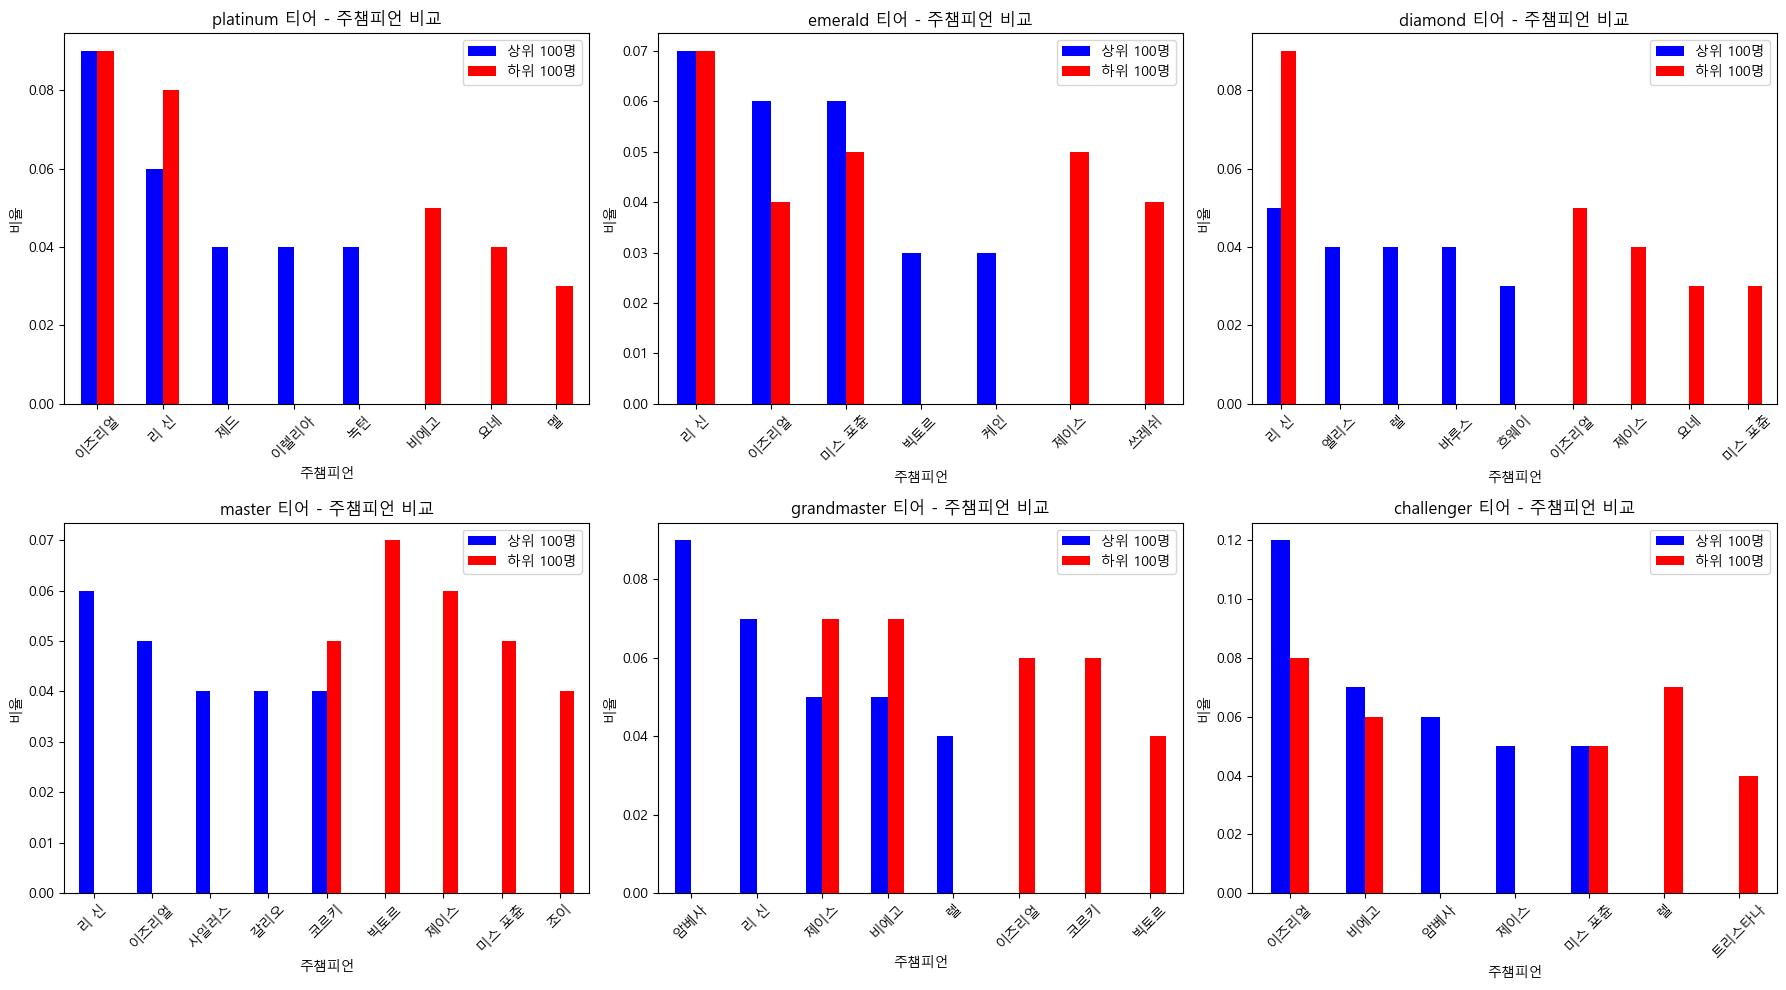

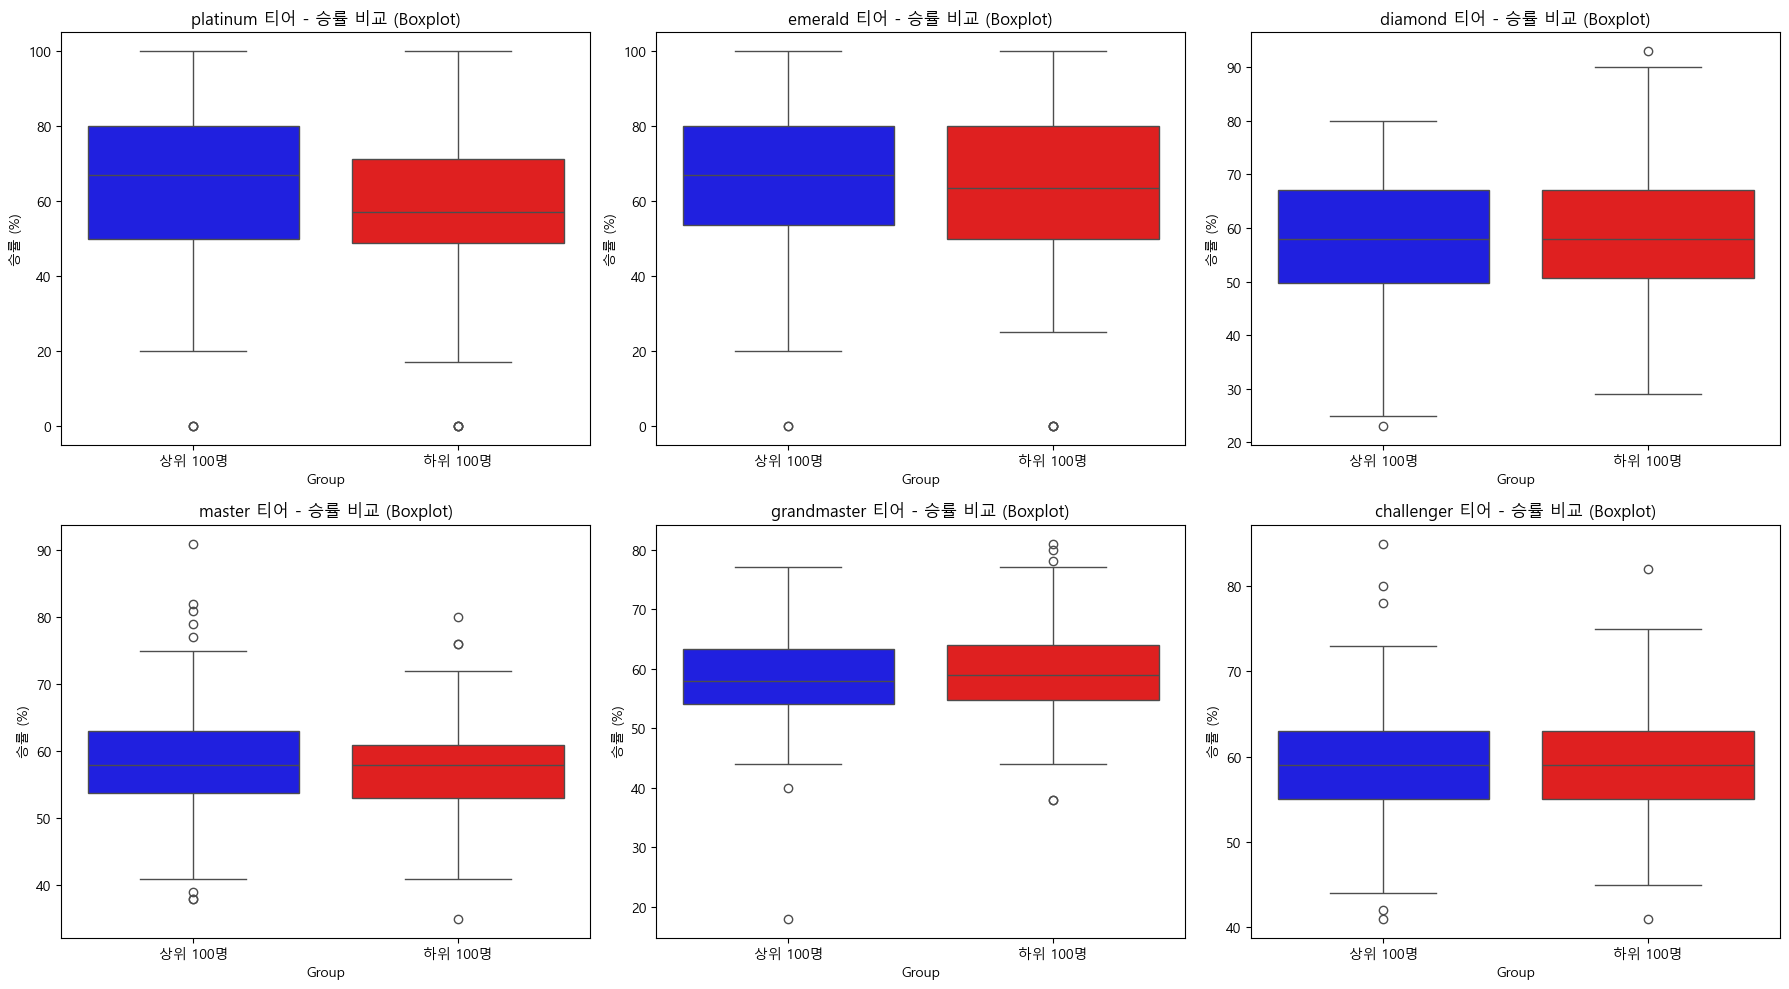

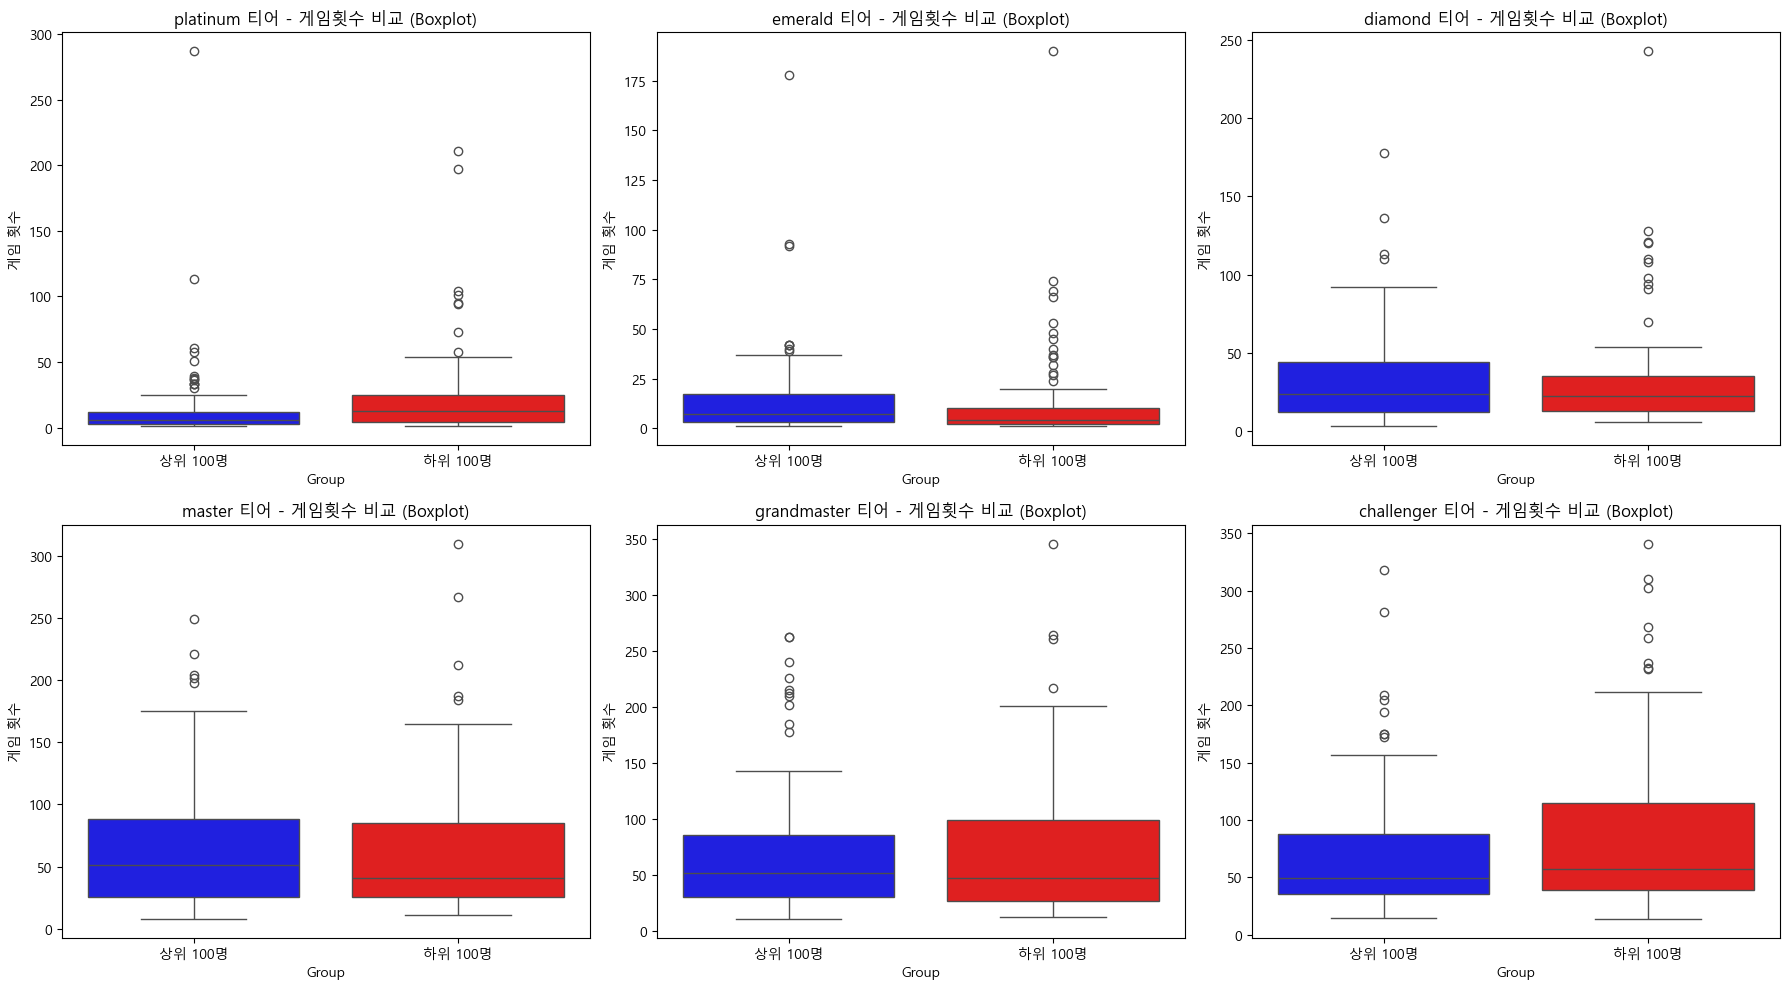

In [ ]:
tier_dfs = {
    "platinum": tier_p,
    "emerald": tier_e,
    "diamond": tier_d,
    "master": tier_m,
    "grandmaster": tier_g,
    "challenger": tier_c
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (tier, df_tier) in enumerate(tier_dfs.items()):
    df_tier_sorted = df_tier.sort_values(by="rank")
    top_100 = df_tier_sorted.head(100)
    bottom_100 = df_tier_sorted.tail(100)

    top_champs = top_100["주챔피언"].value_counts(normalize=True).head(5)
    bottom_champs = bottom_100["주챔피언"].value_counts(normalize=True).head(5)

    champ_df = pd.concat([top_champs, bottom_champs], axis=1).fillna(0)
    champ_df.columns = ["상위 100명", "하위 100명"]
    champ_df.plot(kind="bar", ax=axes[i], title=f"{tier} 티어 - 주챔피언 비교", color=["blue", "red"])
    axes[i].set_ylabel("비율")
    axes[i].set_xticklabels(champ_df.index, rotation=45)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (tier, df_tier) in enumerate(tier_dfs.items()):
    df_tier_sorted = df_tier.sort_values(by="rank")
    top_100 = df_tier_sorted.head(100)
    bottom_100 = df_tier_sorted.tail(100)

    combined_df = pd.concat([top_100.assign(Group="상위 100명"), bottom_100.assign(Group="하위 100명")])

    sns.boxplot(x="Group", y="승률", hue="Group", data=combined_df, 
                palette={"상위 100명": "blue", "하위 100명": "red"}, 
                legend=False, ax=axes[i])

    axes[i].set_title(f"{tier} 티어 - 승률 비교 (Boxplot)")
    axes[i].set_ylabel("승률 (%)")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (tier, df_tier) in enumerate(tier_dfs.items()):
    df_tier_sorted = df_tier.sort_values(by="rank")
    top_100 = df_tier_sorted.head(100)
    bottom_100 = df_tier_sorted.tail(100)

    combined_df = pd.concat([top_100.assign(Group="상위 100명"), bottom_100.assign(Group="하위 100명")])

    sns.boxplot(x="Group", y="게임횟수", hue="Group", data=combined_df, 
                palette={"상위 100명": "blue", "하위 100명": "red"}, 
                legend=False, ax=axes[i])

    axes[i].set_title(f"{tier} 티어 - 게임횟수 비교 (Boxplot)")
    axes[i].set_ylabel("게임 횟수")

plt.tight_layout()
plt.show()



### 11. 티어별 상위랭킹의 포지션 분석

C:\Users\Haeun\AppData\Local\Temp\ipykernel_26964\668950876.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="포지션", y="rank", data=df_all, palette="Set2", ax=ax)


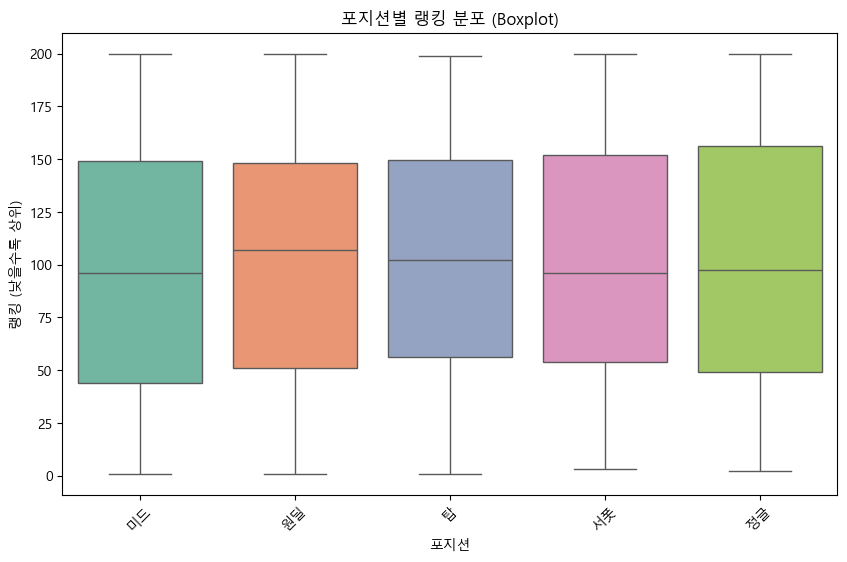

Kruskal-Wallis Test 결과: H-statistic=1.9771, p-value=0.7400
포지션별 랭킹 차이가 통계적으로 유의미하지 않습니다. (p ≥ 0.05)


In [ ]:
df_all = pd.concat(tier_dfs.values())  

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x="포지션", y="rank", data=df_all, palette="Set2", ax=ax)
ax.set_title("포지션별 랭킹 분포 (Boxplot)")
ax.set_xlabel("포지션")
ax.set_ylabel("랭킹 (낮을수록 상위)")

plt.xticks(rotation=45)
plt.show()

pos_ranking_groups = [df_all[df_all["포지션"] == pos]["rank"] for pos in df_all["포지션"].unique()]
stat, p_value = stats.kruskal(*pos_ranking_groups)

print(f"Kruskal-Wallis Test 결과: H-statistic={stat:.4f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("포지션별 랭킹 차이가 통계적으로 유의미합니다 (p < 0.05)")
else:
    print("포지션별 랭킹 차이가 통계적으로 유의미하지 않습니다. (p ≥ 0.05)")


### 12. 포지션별 승률, 게임횟수 차이 비교

In [ ]:
pos_stats = df_ranker_info.groupby("포지션")[["승률", "게임횟수"]].mean().sort_values(by="승률", ascending=False)
pos_stats

,승률,게임횟수
포지션,,
원딜,61.581028,37.691700
정글,60.947154,49.463415
미드,60.795455,46.087121
서폿,60.289340,47.416244
탑,60.150628,53.761506


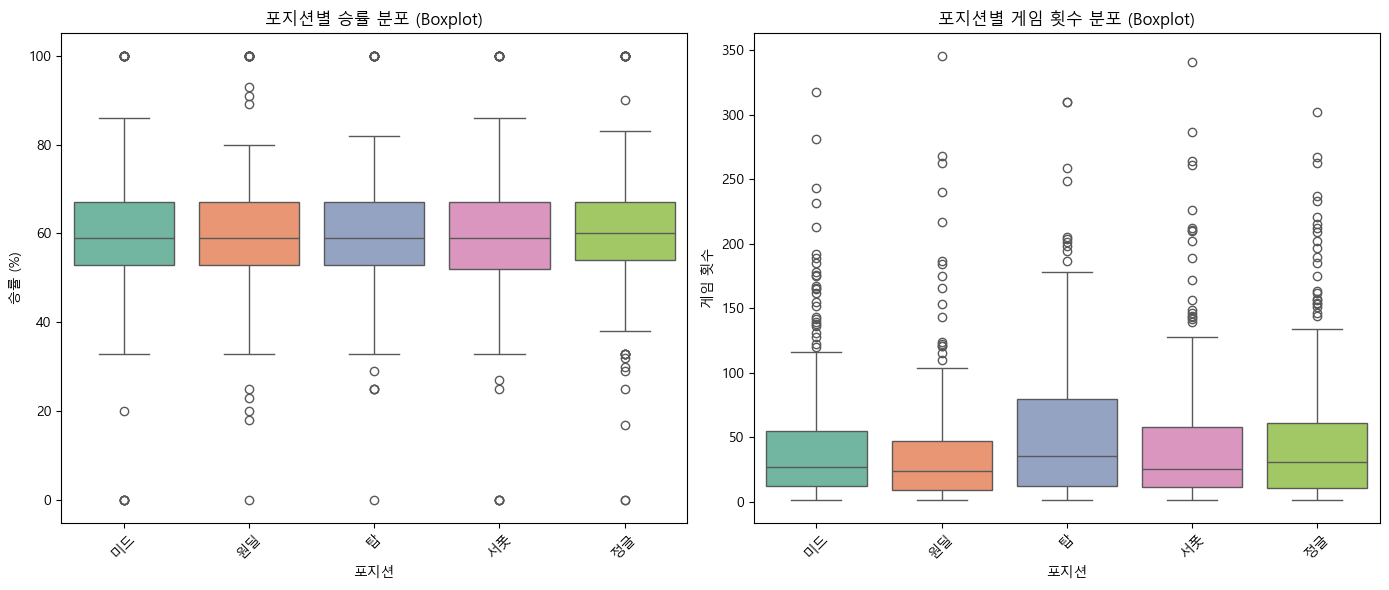

Shapiro-Wilk Test (정규성 검정) p-values: {'승률': 1.4666309393877435e-25, '게임횟수': 3.497503383924759e-39}

포지션별 승률 차이 검정 (Kruskal-Wallis Test):
   - Statistic = 1.0836, p-value = 0.8969
포지션별 승률 차이가 통계적으로 유의미하지 않습니다. (p ≥ 0.05)

포지션별 게임 횟수 차이 검정 (Kruskal-Wallis Test):
   - Statistic = 10.8724, p-value = 0.0280
포지션별 게임 횟수 차이가 통계적으로 유의미합니다 (p < 0.05)


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x="포지션", y="승률", hue="포지션", data=df_ranker_info, palette="Set2", legend=False, ax=axes[0])
axes[0].set_title("포지션별 승률 분포 (Boxplot)")
axes[0].set_xlabel("포지션")
axes[0].set_ylabel("승률 (%)")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x="포지션", y="게임횟수", hue="포지션", data=df_ranker_info, palette="Set2", legend=False, ax=axes[1])
axes[1].set_title("포지션별 게임 횟수 분포 (Boxplot)")
axes[1].set_xlabel("포지션")
axes[1].set_ylabel("게임 횟수")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

shapiro_p_values = {
    "승률": stats.shapiro(df_ranker_info["승률"])[1], 
    "게임횟수": stats.shapiro(df_ranker_info["게임횟수"])[1]
}

print(f"Shapiro-Wilk Test (정규성 검정) p-values: {shapiro_p_values}")

pos_winrate_groups = [df_ranker_info[df_ranker_info["포지션"] == pos]["승률"] for pos in df_ranker_info["포지션"].unique()]
pos_games_groups = [df_ranker_info[df_ranker_info["포지션"] == pos]["게임횟수"] for pos in df_ranker_info["포지션"].unique()]

if shapiro_p_values["승률"] > 0.05:
    winrate_stat, winrate_p = stats.f_oneway(*pos_winrate_groups) 
    winrate_test = "ANOVA"
else:
    winrate_stat, winrate_p = stats.kruskal(*pos_winrate_groups)  
    winrate_test = "Kruskal-Wallis"

if shapiro_p_values["게임횟수"] > 0.05:
    games_stat, games_p = stats.f_oneway(*pos_games_groups) 
    games_test = "ANOVA"
else:
    games_stat, games_p = stats.kruskal(*pos_games_groups)  
    games_test = "Kruskal-Wallis"


print(f"\n포지션별 승률 차이 검정 ({winrate_test} Test):")
print(f"   - Statistic = {winrate_stat:.4f}, p-value = {winrate_p:.4f}")

if winrate_p < 0.05:
    print("포지션별 승률 차이가 통계적으로 유의미합니다 (p < 0.05)")
else:
    print("포지션별 승률 차이가 통계적으로 유의미하지 않습니다. (p ≥ 0.05)")

print(f"\n포지션별 게임 횟수 차이 검정 ({games_test} Test):")
print(f"   - Statistic = {games_stat:.4f}, p-value = {games_p:.4f}")

if games_p < 0.05:
    print("포지션별 게임 횟수 차이가 통계적으로 유의미합니다 (p < 0.05)")
else:
    print("포지션별 게임 횟수 차이가 통계적으로 유의미하지 않습니다. (p ≥ 0.05)")

### 13. 포지션별 사용되는 챔피언 갯수 분석

C:\Users\Haeun\AppData\Local\Temp\ipykernel_26964\3746621561.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="포지션", y="Shannon Entropy", data=df_diversity, palette="viridis", ax=axes[0])
C:\Users\Haeun\AppData\Local\Temp\ipykernel_26964\3746621561.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="포지션", y="Simpson Index", data=df_diversity, palette="magma", ax=axes[1])


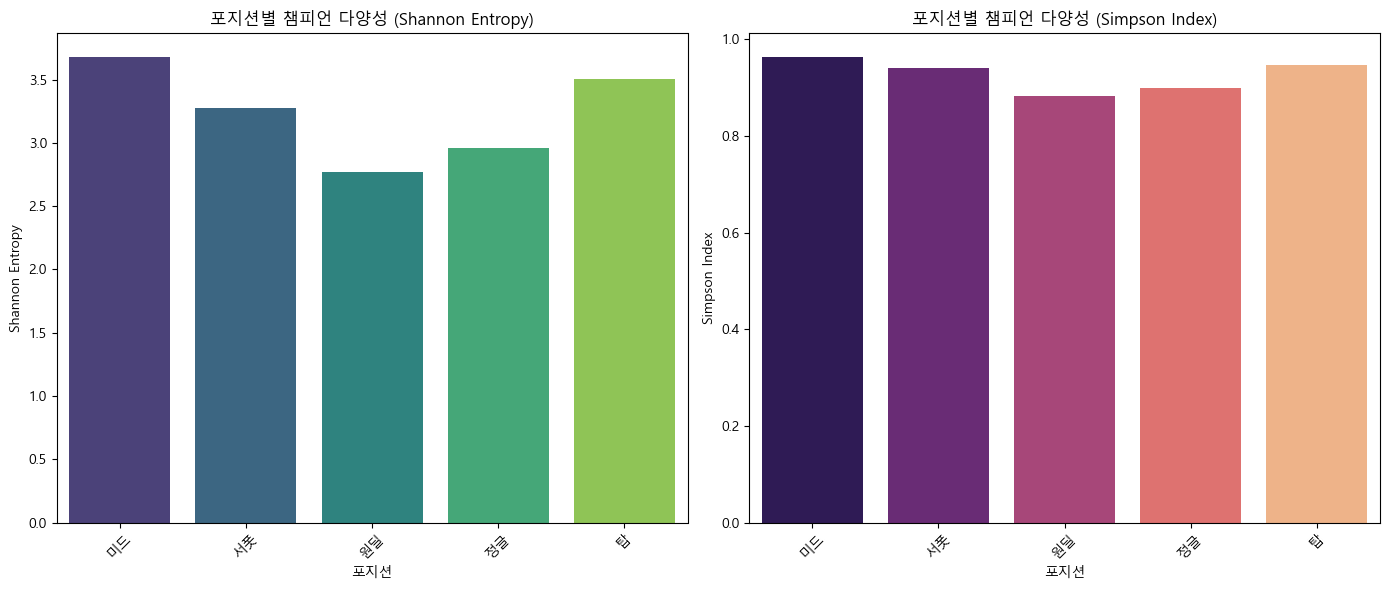


Shannon Entropy 차이 검정 (Kruskal-Wallis Test):
   - Statistic = 4.0000, p-value = 0.4060
포지션별 Shannon Entropy 차이가 통계적으로 유의미하지 않습니다. (p ≥ 0.05)

simpson Index 차이 검정 (Kruskal-Wallis Test):
   - Statistic = 4.0000, p-value = 0.4060
포지션별 Simpson Index 차이가 통계적으로 유의미하지 않습니다. (p ≥ 0.05)


C:\Users\Haeun\AppData\Local\Temp\ipykernel_26964\3746621561.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="포지션", y="챔피언 개수", data=df_diversity, palette="coolwarm")


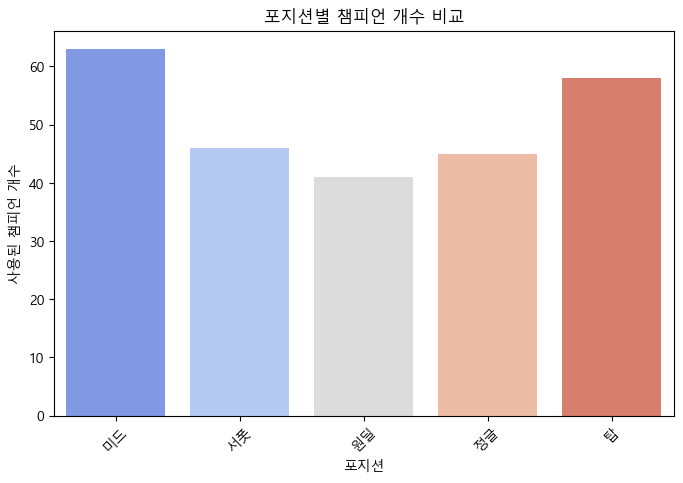

,포지션,Shannon Entropy,Simpson Index,챔피언 개수
0,미드,3.682227,0.964187,63
1,서폿,3.277717,0.940555,46
2,원딜,2.771177,0.883688,41
3,정글,2.961920,0.898440,45
4,탑,3.503699,0.947252,58


In [ ]:
def shannon_entropy(champion_counts):
    proportions = champion_counts / champion_counts.sum()
    return entropy(proportions)

def simpson_index(champion_counts):
    proportions = champion_counts / champion_counts.sum()
    return 1 - np.sum(proportions**2)

diversity_stats = []

for position, group in df_ranker_info.groupby("포지션"):
    champ_counts = group["주챔피언"].value_counts()
    shannon = shannon_entropy(champ_counts)
    simpson = simpson_index(champ_counts)
    
    diversity_stats.append({"포지션": position, "Shannon Entropy": shannon, "Simpson Index": simpson, "챔피언 개수": len(champ_counts)})

df_diversity = pd.DataFrame(diversity_stats)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x="포지션", y="Shannon Entropy", data=df_diversity, palette="viridis", ax=axes[0])
axes[0].set_title("포지션별 챔피언 다양성 (Shannon Entropy)")
axes[0].set_xlabel("포지션")
axes[0].set_ylabel("Shannon Entropy")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x="포지션", y="Simpson Index", data=df_diversity, palette="magma", ax=axes[1])
axes[1].set_title("포지션별 챔피언 다양성 (Simpson Index)")
axes[1].set_xlabel("포지션")
axes[1].set_ylabel("Simpson Index")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


shannon_groups = [df_diversity[df_diversity["포지션"] == pos]["Shannon Entropy"] for pos in df_diversity["포지션"].unique()]
simpson_groups = [df_diversity[df_diversity["포지션"] == pos]["Simpson Index"] for pos in df_diversity["포지션"].unique()]

shannon_stat, shannon_p = stats.kruskal(*shannon_groups)
simpson_stat, simpson_p = stats.kruskal(*simpson_groups)

print(f"\nShannon Entropy 차이 검정 (Kruskal-Wallis Test):")
print(f"   - Statistic = {shannon_stat:.4f}, p-value = {shannon_p:.4f}")
if shannon_p < 0.05:
    print("포지션별 Shannon Entropy 차이가 통계적으로 유의미합니다 (p < 0.05)")
else:
    print("포지션별 Shannon Entropy 차이가 통계적으로 유의미하지 않습니다. (p ≥ 0.05)")

print(f"\nsimpson Index 차이 검정 (Kruskal-Wallis Test):")
print(f"   - Statistic = {simpson_stat:.4f}, p-value = {simpson_p:.4f}")
if simpson_p < 0.05:
    print("포지션별 Simpson Index 차이가 통계적으로 유의미합니다 (p < 0.05)")
else:
    print("포지션별 Simpson Index 차이가 통계적으로 유의미하지 않습니다. (p ≥ 0.05)")


plt.figure(figsize=(8, 5))
sns.barplot(x="포지션", y="챔피언 개수", data=df_diversity, palette="coolwarm")
plt.title("포지션별 챔피언 개수 비교")
plt.xlabel("포지션")
plt.ylabel("사용된 챔피언 개수")
plt.xticks(rotation=45)
plt.show()

df_diversity


### 14. 포지션별 티어상승에 따른 특징 분석

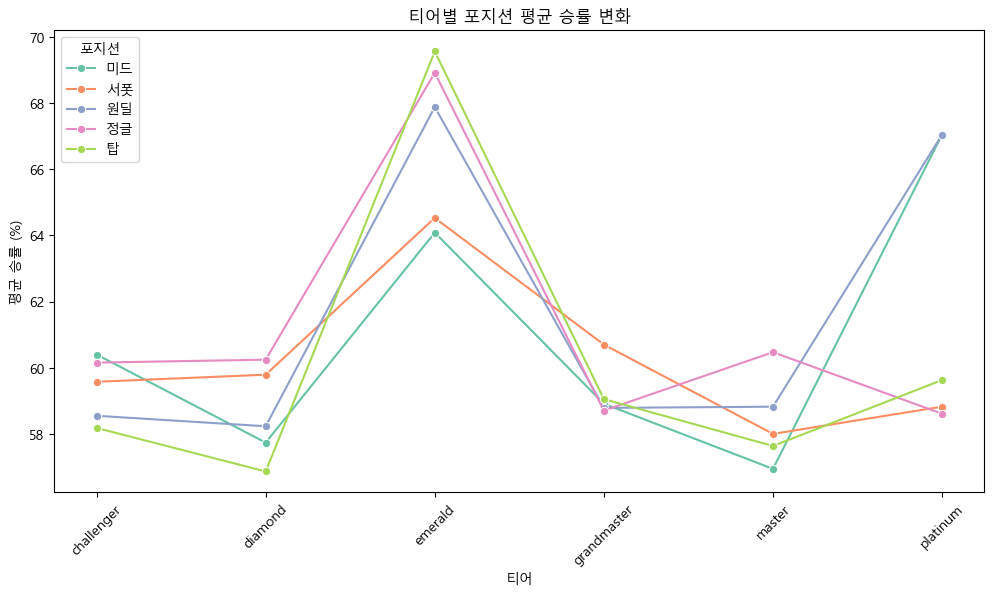

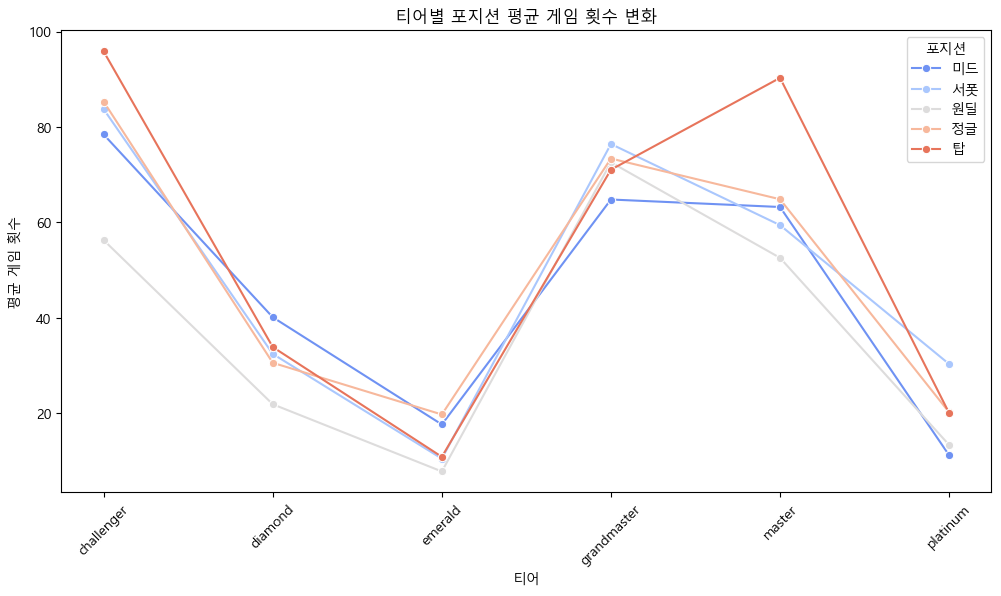

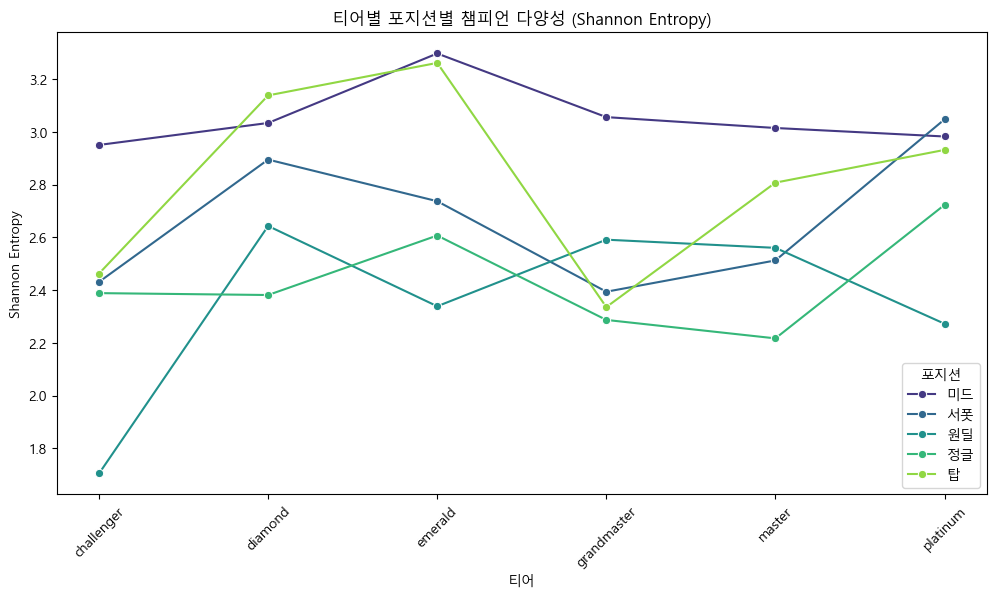

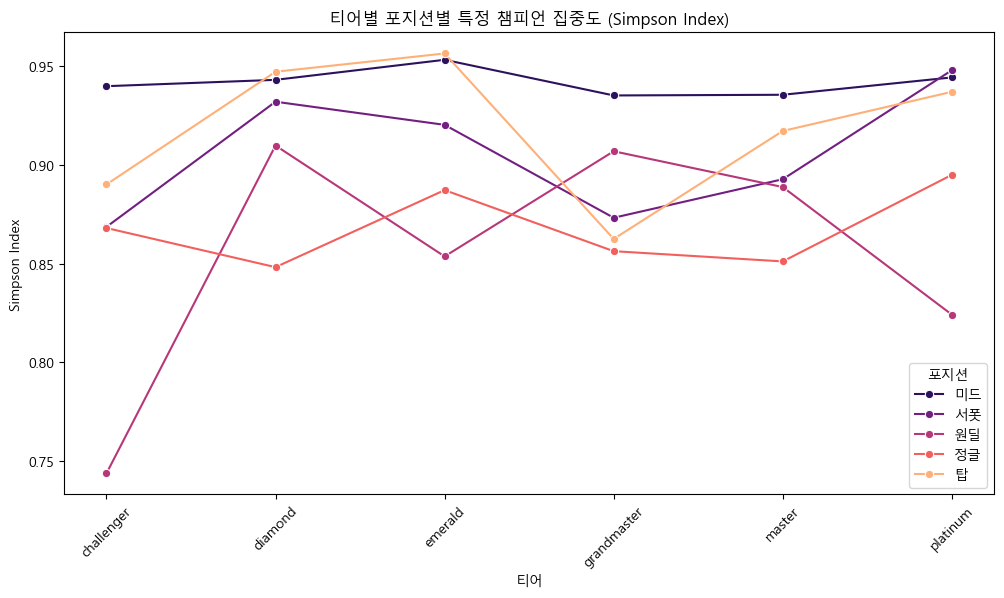

,티어,포지션,Shannon Entropy,Simpson Index,챔피언 개수
0,challenger,미드,2.950172,0.940000,22
1,challenger,서폿,2.430971,0.868687,16
2,challenger,원딜,1.704477,0.743764,10
3,challenger,정글,2.388331,0.868148,16
4,challenger,탑,2.462682,0.890204,16
5,diamond,미드,3.033464,0.943213,24
6,diamond,서폿,2.894659,0.932133,22
7,diamond,원딜,2.642930,0.909928,18
8,diamond,정글,2.381162,0.848305,17
9,diamond,탑,3.137995,0.947314,27


In [ ]:
def shannon_entropy(champion_counts):
    proportions = champion_counts / champion_counts.sum()
    return entropy(proportions)

def simpson_index(champion_counts):
    proportions = champion_counts / champion_counts.sum()
    return 1 - np.sum(proportions**2)

tier_positions = df_ranker_info.groupby(["티어", "포지션"])

tier_winrate = tier_positions["승률"].mean().reset_index()

tier_games = tier_positions["게임횟수"].mean().reset_index()

diversity_stats = []

for (tier, position), group in tier_positions:
    champ_counts = group["주챔피언"].value_counts()
    shannon = shannon_entropy(champ_counts)
    simpson = simpson_index(champ_counts)
    
    diversity_stats.append({
        "티어": tier,
        "포지션": position,
        "Shannon Entropy": shannon,
        "Simpson Index": simpson,
        "챔피언 개수": len(champ_counts)
    })

df_diversity = pd.DataFrame(diversity_stats)

plt.figure(figsize=(12, 6))
sns.lineplot(x="티어", y="승률", hue="포지션", data=tier_winrate, marker="o", palette="Set2")
plt.title("티어별 포지션 평균 승률 변화")
plt.xlabel("티어")
plt.ylabel("평균 승률 (%)")
plt.xticks(rotation=45)
plt.legend(title="포지션")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x="티어", y="게임횟수", hue="포지션", data=tier_games, marker="o", palette="coolwarm")
plt.title("티어별 포지션 평균 게임 횟수 변화")
plt.xlabel("티어")
plt.ylabel("평균 게임 횟수")
plt.xticks(rotation=45)
plt.legend(title="포지션")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x="티어", y="Shannon Entropy", hue="포지션", data=df_diversity, marker="o", palette="viridis")
plt.title("티어별 포지션별 챔피언 다양성 (Shannon Entropy)")
plt.xlabel("티어")
plt.ylabel("Shannon Entropy")
plt.xticks(rotation=45)
plt.legend(title="포지션")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x="티어", y="Simpson Index", hue="포지션", data=df_diversity, marker="o", palette="magma")
plt.title("티어별 포지션별 특정 챔피언 집중도 (Simpson Index)")
plt.xlabel("티어")
plt.ylabel("Simpson Index")
plt.xticks(rotation=45)
plt.legend(title="포지션")
plt.show()

df_diversity

#### 14-1. 티어 상승에 따른 특정 챔피언에 대한 집중도 확인 

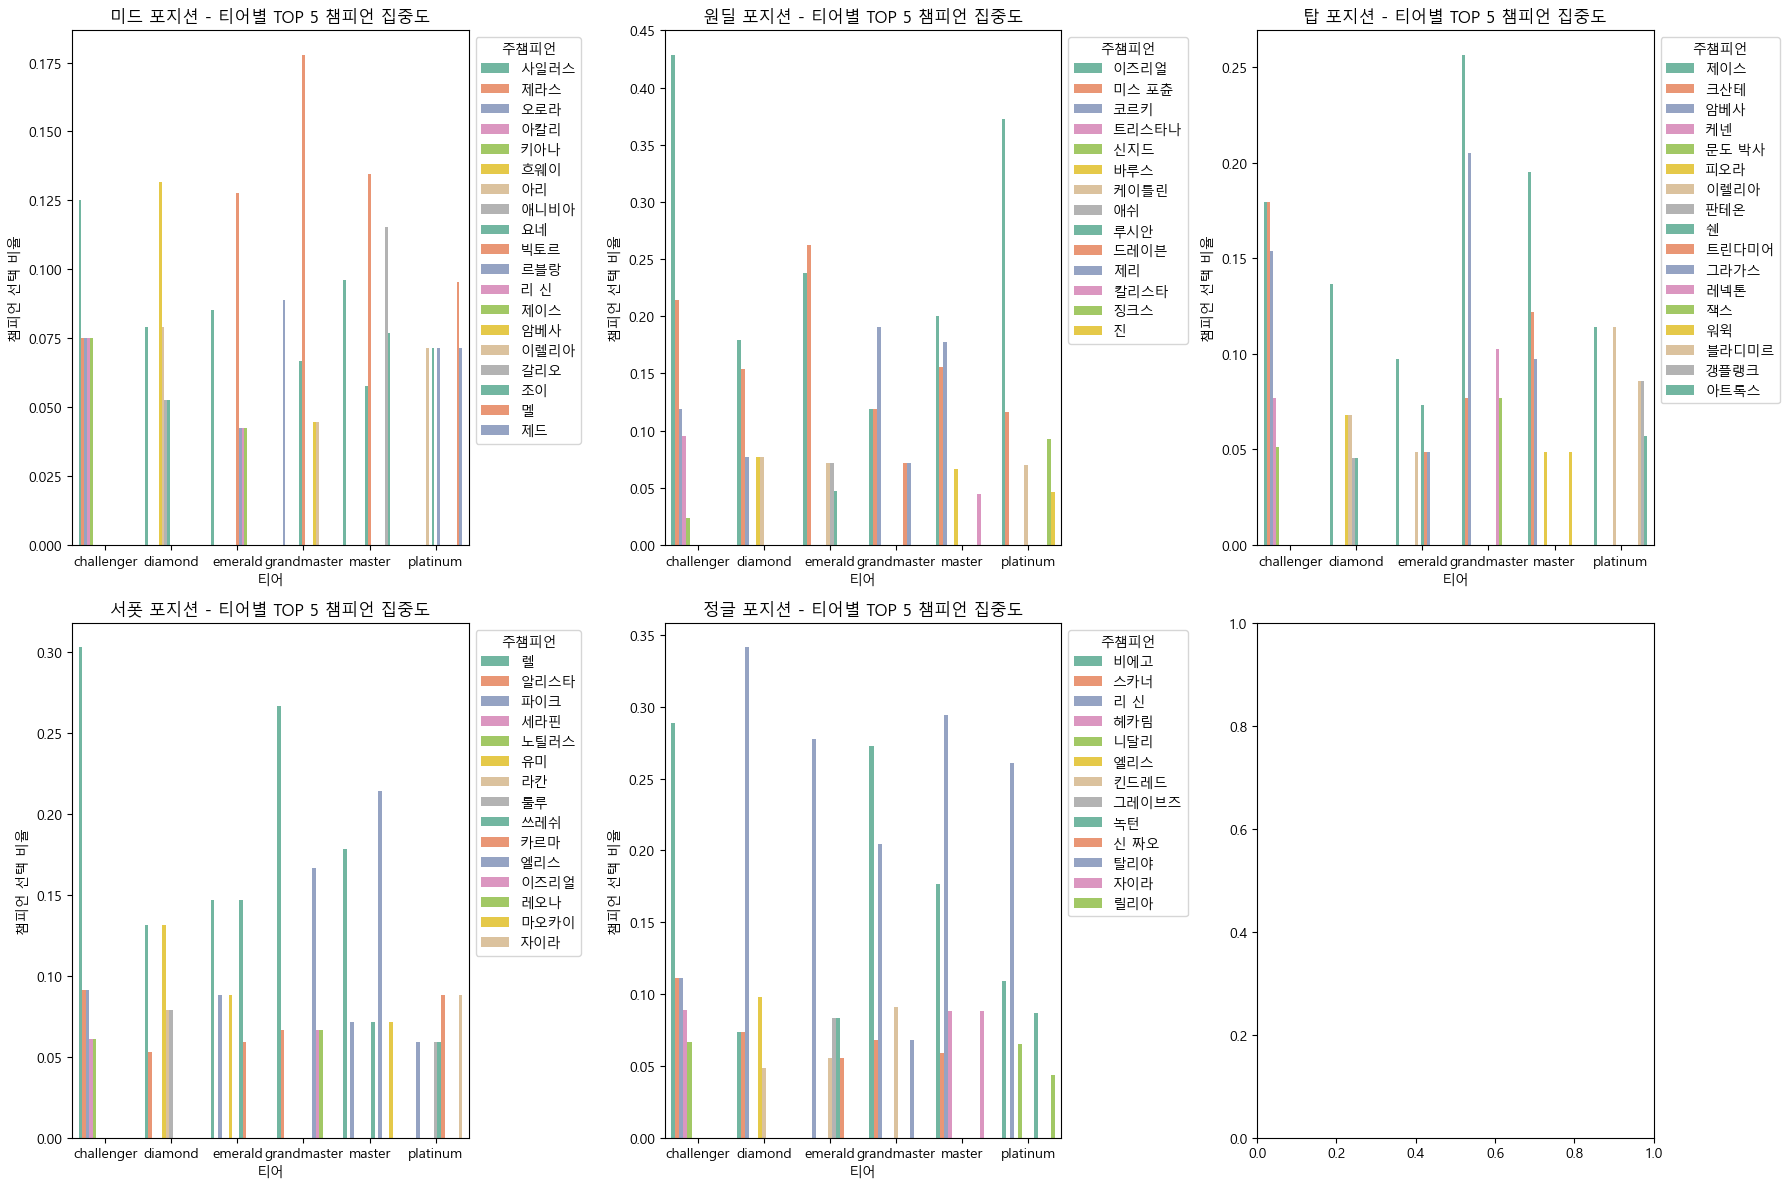

,티어,포지션,주챔피언,사용 횟수,비율
0,challenger,미드,사일러스,5,0.125000
1,challenger,미드,제라스,3,0.075000
2,challenger,미드,오로라,3,0.075000
3,challenger,미드,아칼리,3,0.075000
4,challenger,미드,키아나,3,0.075000
...,...,...,...,...,...
145,platinum,탑,이렐리아,4,0.114286
146,platinum,탑,제이스,4,0.114286
147,platinum,탑,블라디미르,3,0.085714
148,platinum,탑,갱플랭크,3,0.085714


In [ ]:
top_champion_data = []

for (tier, position), group in df_combined.groupby(["티어", "포지션"]):
    top_champs = group["주챔피언"].value_counts().head(5) 
    for champ, count in top_champs.items():
        top_champion_data.append({
            "티어": tier,
            "포지션": position,
            "주챔피언": champ,
            "사용 횟수": count,
            "비율": count / len(group)  
        })

df_top_champs = pd.DataFrame(top_champion_data)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, position in enumerate(df_ranker_info["포지션"].unique()):
    subset = df_top_champs[df_top_champs["포지션"] == position]
    
    sns.barplot(x="티어", y="비율", hue="주챔피언", data=subset, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{position} 포지션 - 티어별 TOP 5 챔피언 집중도")
    axes[i].set_xlabel("티어")
    axes[i].set_ylabel("챔피언 선택 비율")
    axes[i].legend(title="주챔피언", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

df_top_champs


### 15. 게임횟수와 승률의 관계 분석

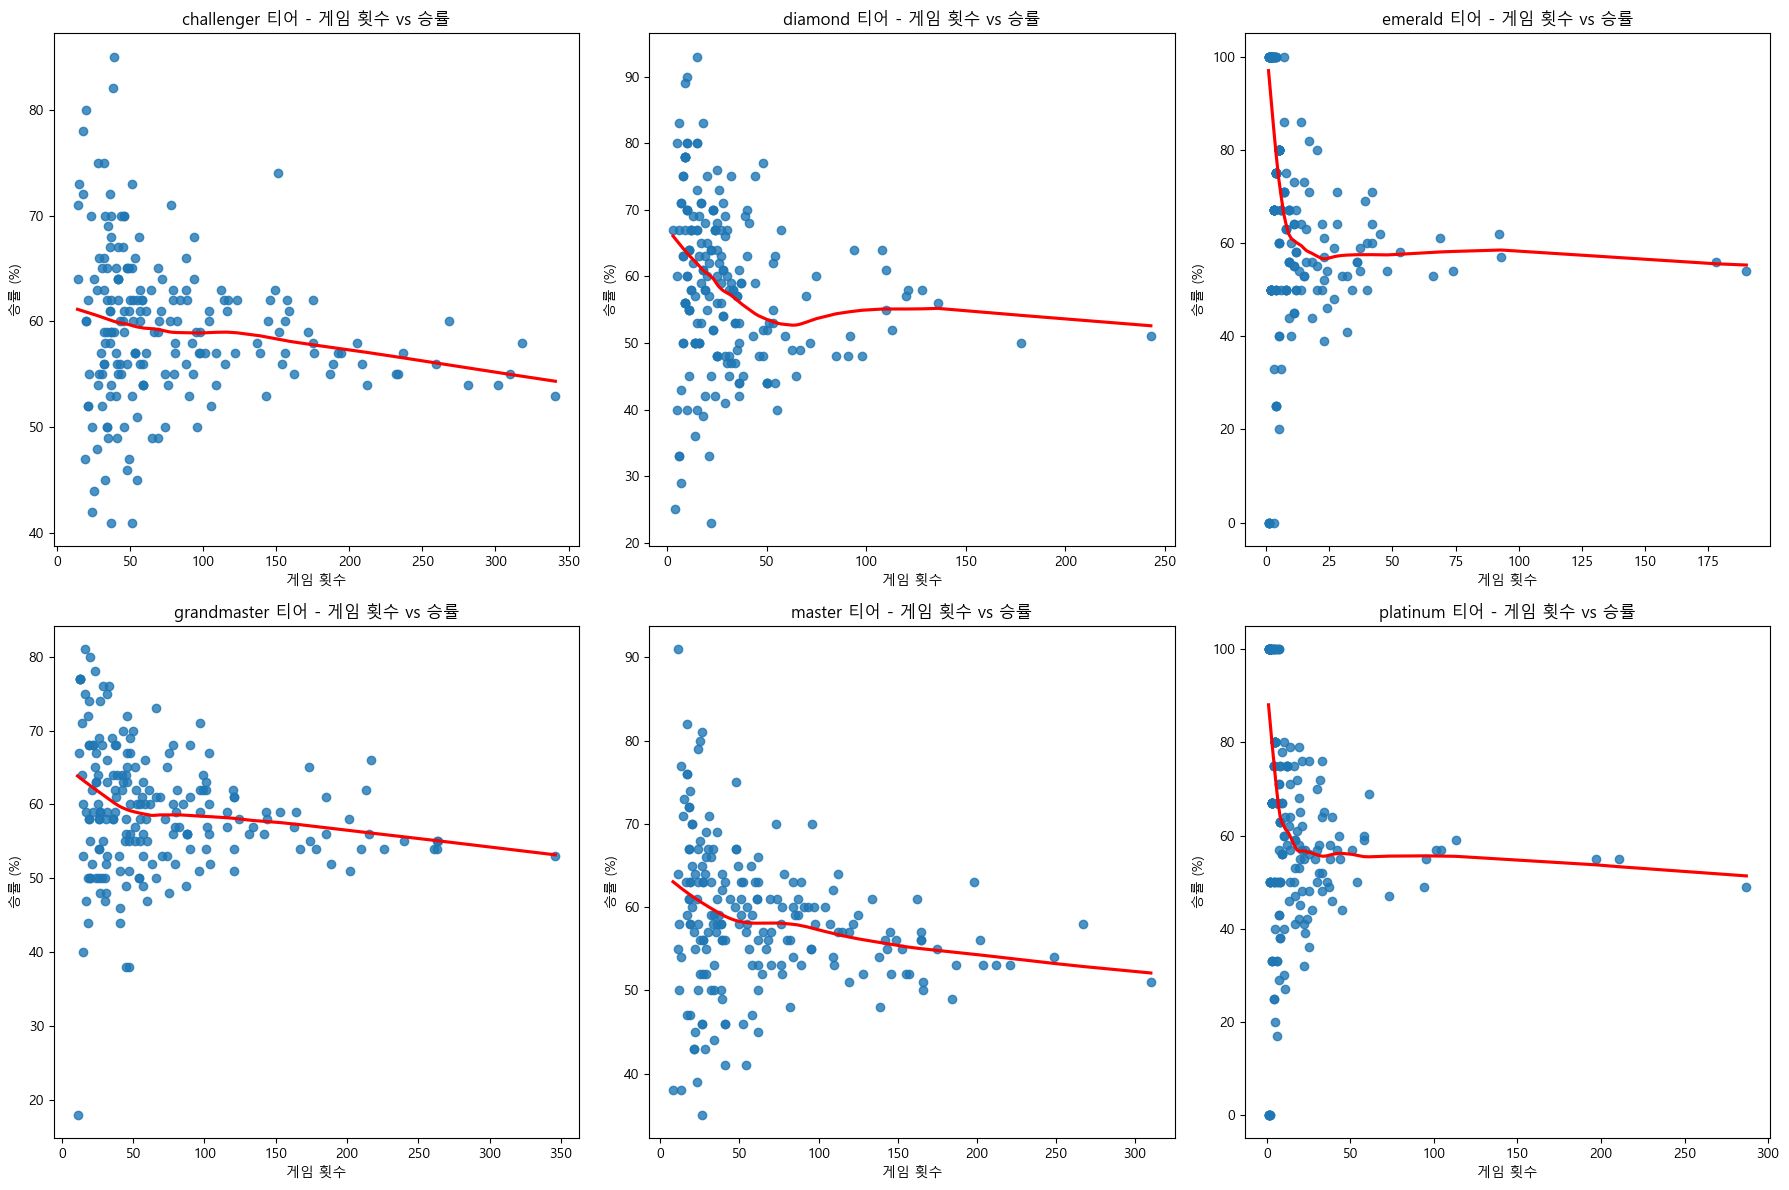

,티어,선형 회귀 R²,다항 회귀 R²
0,challenger,0.024807,0.024846
1,diamond,0.033850,0.046455
2,emerald,0.034220,0.063471
3,grandmaster,0.027114,0.028589
4,master,0.042960,0.046266
5,platinum,0.018992,0.033782


In [ ]:
regression_results = []

for tier, group in df_ranker_info.groupby("티어"):
    X = group["게임횟수"].values.reshape(-1, 1)  
    y = group["승률"].values 

    X_const = sm.add_constant(X)  
    model_linear = sm.OLS(y, X_const).fit()
    r_squared_linear = model_linear.rsquared  
    
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    model_poly = LinearRegression().fit(X_poly, y)
    r_squared_poly = model_poly.score(X_poly, y) 

    regression_results.append({
        "티어": tier,
        "선형 회귀 R²": r_squared_linear,
        "다항 회귀 R²": r_squared_poly
    })

df_regression = pd.DataFrame(regression_results)


fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (tier, group) in enumerate(df_ranker_info.groupby("티어")):
    X = group["게임횟수"].values.reshape(-1, 1)
    y = group["승률"].values
    
    sns.regplot(x=X, y=y, scatter=True, lowess=True, line_kws={"color": "red"}, ax=axes[i])
    
    axes[i].set_title(f"{tier} 티어 - 게임 횟수 vs 승률")
    axes[i].set_xlabel("게임 횟수")
    axes[i].set_ylabel("승률 (%)")

plt.tight_layout()
plt.show()

df_regression


### 16. 챔피언과 승률의 관계 분석

Kruskal-Wallis 통계량: 123.4662, p-value: 0.7898
챔피언에 따른 승률 차이가 유의미하지 않음 (귀무가설 채택)


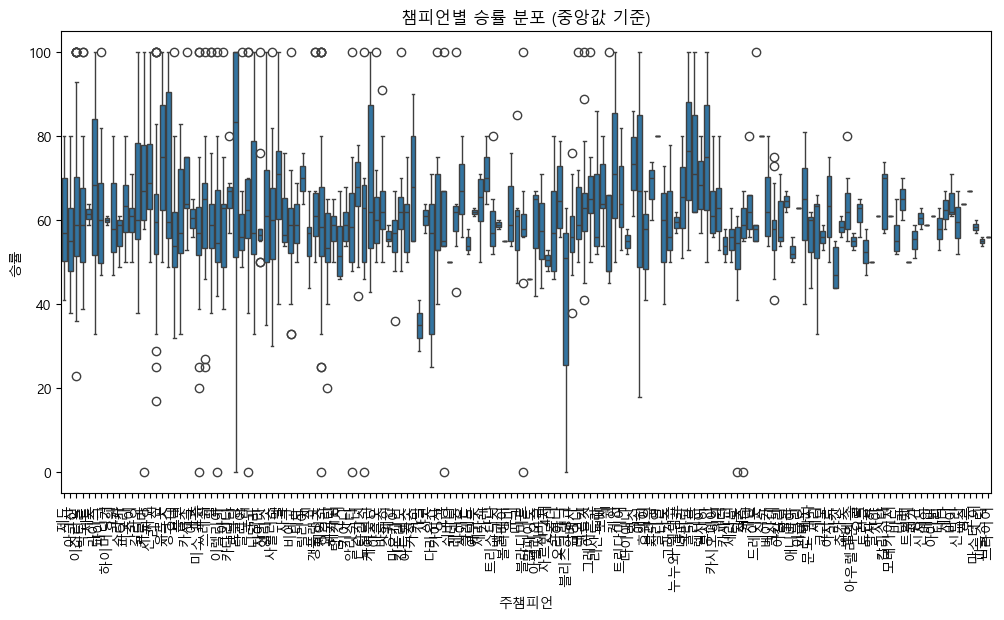

In [ ]:
df_median = df_ranker_info.groupby('주챔피언', as_index=False)['승률'].median()

grouped_data = [df_ranker_info[df_ranker_info['주챔피언'] == champ]['승률'] for champ in df_median['주챔피언']]

grouped_data = [g for g in grouped_data if len(g) > 1]

if len(grouped_data) > 1:
    stat, p = stats.kruskal(*grouped_data)
    print(f"Kruskal-Wallis 통계량: {stat:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print("챔피언에 따른 승률 차이가 유의미함 (귀무가설 기각)")
    else:
        print("챔피언에 따른 승률 차이가 유의미하지 않음 (귀무가설 채택)")
else:
    print("데이터가 부족하여 Kruskal-Wallis 검정을 실행할 수 없습니다.")

plt.figure(figsize=(12, 6))
sns.boxplot(x='주챔피언', y='승률', data=df_ranker_info)
plt.xticks(rotation=90)
plt.title("챔피언별 승률 분포 (중앙값 기준)")
plt.show()


## 2. 챔피언 조합별 승률 분석

In [ ]:
team_com = pd.read_csv('match_combination.csv')

### 1. 포지션별 최빈챔피언 분석

In [ ]:
team_com['TOP'].value_counts()

TOP
제이스       11542
크산테       10551
암베사        7012
아트록스       6610
레넥톤        5412
          ...  
블리츠크랭크        3
브라움           2
나미            1
소나            1
밀리오           1
Name: count, Length: 169, dtype: int64

In [ ]:
team_com['JUNGLE'].value_counts()

JUNGLE
리 신      25633
비에고      19723
그레이브즈     8862
니달리       8059
바이        7861
         ...  
애쉬           1
브라움          1
룰루           1
말자하          1
카르마          1
Name: count, Length: 137, dtype: int64

In [ ]:
team_com['MID'].value_counts()

MID
사일러스    11688
요네       8598
빅토르      8429
갈리오      7951
아칼리      7230
        ...  
렐           1
타릭          1
닐라          1
헤카림         1
바드          1
Name: count, Length: 165, dtype: int64

In [ ]:
team_com['BOTTOM'].value_counts()

BOTTOM
이즈리얼      26278
미스 포츈     13964
진         13917
카이사       13417
징크스       12193
          ...  
아이번           1
일라오이          1
샤코            1
요릭            1
블리츠크랭크        1
Name: count, Length: 157, dtype: int64

In [ ]:
team_com['SUPPORT'].value_counts()

SUPPORT
룰루       11027
카르마      10932
렐        10138
쓰레쉬       9892
노틸러스      9717
         ...  
피오라          1
레넥톤          1
자야           1
그레이브즈        1
코르키          1
Name: count, Length: 165, dtype: int64

### 2. 승리팀과 패배팀의 포지션별 최빈챔피언 분석

In [ ]:
winner = team_com[team_com['승패'] == 1]
loser = team_com[team_com['승패'] == 0]

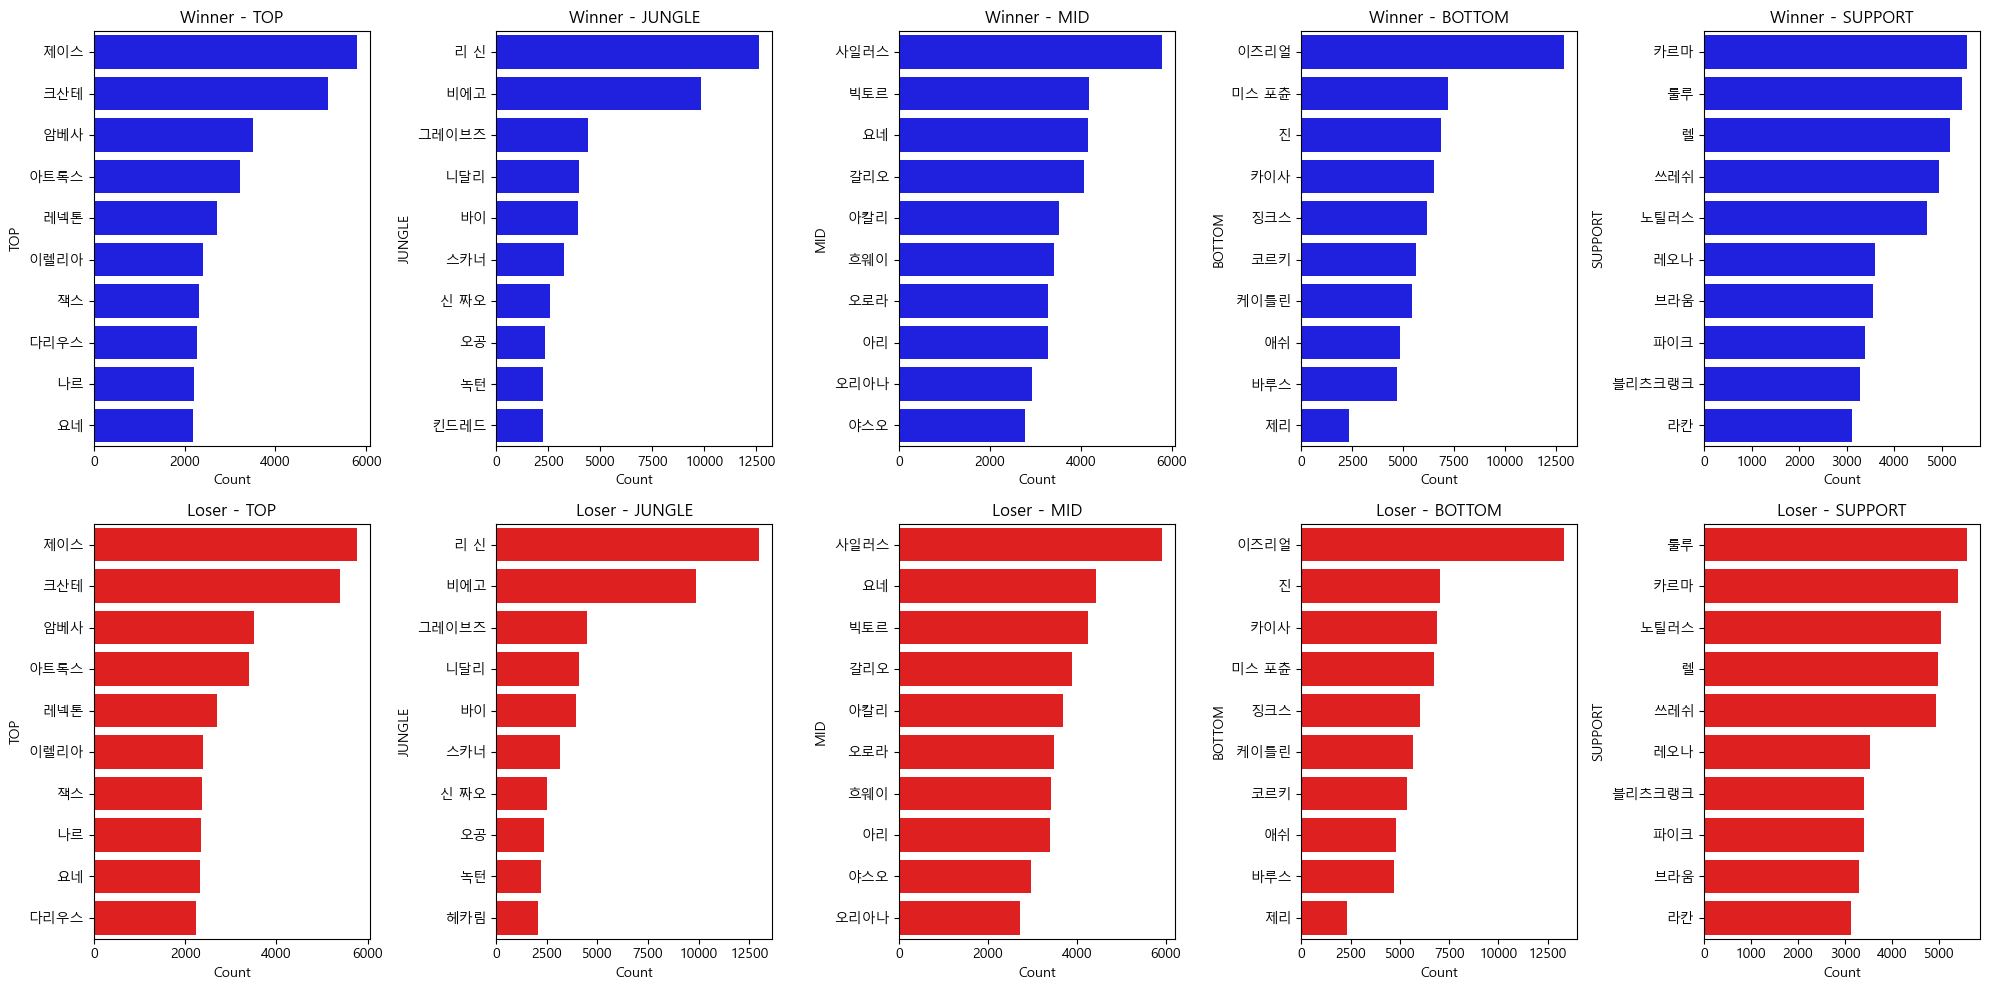

In [ ]:
positions = ["TOP", "JUNGLE", "MID", "BOTTOM", "SUPPORT"]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10)) 
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

for idx, position in enumerate(positions):
   
    winner_counts = winner[position].value_counts().head(10)
    ax_winner = axes[0, idx]
    sns.barplot(x=winner_counts.values, y=winner_counts.index, ax=ax_winner, color="blue")
    ax_winner.set_title(f"Winner - {position}")
    ax_winner.set_xlabel("Count")
    
    
    loser_counts = loser[position].value_counts().head(10)
    ax_loser = axes[1, idx]
    sns.barplot(x=loser_counts.values, y=loser_counts.index, ax=ax_loser, color="red")
    ax_loser.set_title(f"Loser - {position}")
    ax_loser.set_xlabel("Count")

plt.tight_layout()
plt.show()


### 3. 각 포지션별 챔피언 승률 분석

C:\Users\Haeun\AppData\Local\Temp\ipykernel_22160\3215932090.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_position = filtered_champion_stats.groupby("Position").apply(lambda x: x.nlargest(5, "Win Rate")).reset_index(drop=True)
C:\Users\Haeun\AppData\Local\Temp\ipykernel_22160\3215932090.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Win Rate", y="Champion", data=data, ax=ax, palette="Blues_r")
C:\Users\Haeun\AppData\Local\Temp\ipykernel_22160\3215932090.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is 

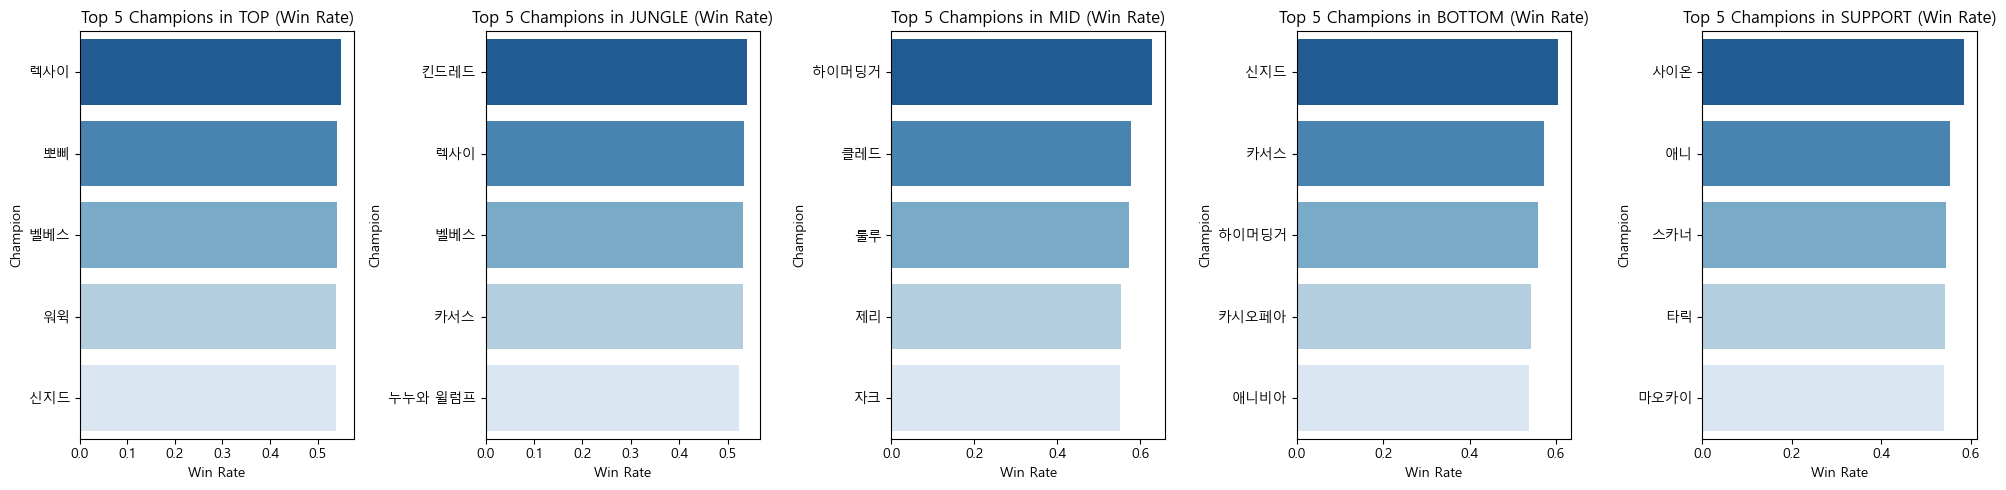

In [ ]:
team_com_melted = team_com.melt(id_vars=["matchID", "승패"], value_vars=["TOP", "JUNGLE", "MID", "BOTTOM", "SUPPORT"], 
                                var_name="Position", value_name="Champion")

champion_stats = team_com_melted.groupby(["Position", "Champion"])["승패"].agg(["count", "mean"]).reset_index()
champion_stats.rename(columns={"count": "Appearances", "mean": "Win Rate"}, inplace=True)

filtered_champion_stats = champion_stats[champion_stats["Appearances"] >= 100]

top_5_per_position = filtered_champion_stats.groupby("Position").apply(lambda x: x.nlargest(5, "Win Rate")).reset_index(drop=True)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

positions = ["TOP", "JUNGLE", "MID", "BOTTOM", "SUPPORT"]

for idx, position in enumerate(positions):
    ax = axes[idx]
    data = top_5_per_position[top_5_per_position["Position"] == position]
    sns.barplot(x="Win Rate", y="Champion", data=data, ax=ax, palette="Blues_r")
    ax.set_title(f"Top 5 Champions in {position} (Win Rate)")
    ax.set_xlabel("Win Rate")
    ax.set_ylabel("Champion")

plt.tight_layout()
plt.show()


### 4. TOP-JUNGLE-MID / BOTTOM-SUPPORT 조합별 승률분석

In [ ]:
team_com["TOP_JUNGLE_MID"] = team_com["TOP"] + " - " + team_com["JUNGLE"] + " - " + team_com["MID"]
team_com["BOTTOM_SUPPORT"] = team_com["BOTTOM"] + " - " + team_com["SUPPORT"]

top_jungle_mid_stats = team_com.groupby("TOP_JUNGLE_MID")["승패"].agg(["count", "mean"]).reset_index()
bottom_support_stats = team_com.groupby("BOTTOM_SUPPORT")["승패"].agg(["count", "mean"]).reset_index()

In [ ]:
top_jungle_mid_stats

,TOP_JUNGLE_MID,count,mean
0,가렌 - 그라가스 - 럼블,1,1.0
1,가렌 - 그라가스 - 리산드라,3,0.0
2,가렌 - 그라가스 - 베이가,1,1.0
3,가렌 - 그라가스 - 사일러스,2,0.0
4,가렌 - 그라가스 - 아리,1,0.0
...,...,...,...
72862,흐웨이 - 킨드레드 - 아지르,1,0.0
72863,흐웨이 - 탈론 - 아리,1,1.0
72864,흐웨이 - 헤카림 - 레넥톤,1,1.0
72865,흐웨이 - 헤카림 - 사일러스,1,1.0


In [ ]:
bottom_support_stats

,BOTTOM_SUPPORT,count,mean
0,가렌 - 스웨인,1,0.000000
1,가렌 - 아트록스,1,1.000000
2,가렌 - 조이,1,0.000000
3,갈리오 - 니코,1,1.000000
4,갈리오 - 라칸,1,1.000000
...,...,...,...
4236,흐웨이 - 티모,1,0.000000
4237,흐웨이 - 파이크,46,0.652174
4238,흐웨이 - 판테온,17,0.470588
4239,흐웨이 - 피들스틱,5,1.000000


C:\Users\Haeun\AppData\Local\Temp\ipykernel_26964\2107040717.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mean", y="TOP_JUNGLE_MID", data=top_jungle_mid_winrate, ax=axes[0], palette="Blues_r")
C:\Users\Haeun\AppData\Local\Temp\ipykernel_26964\2107040717.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mean", y="BOTTOM_SUPPORT", data=bottom_support_winrate, ax=axes[1], palette="Greens_r")


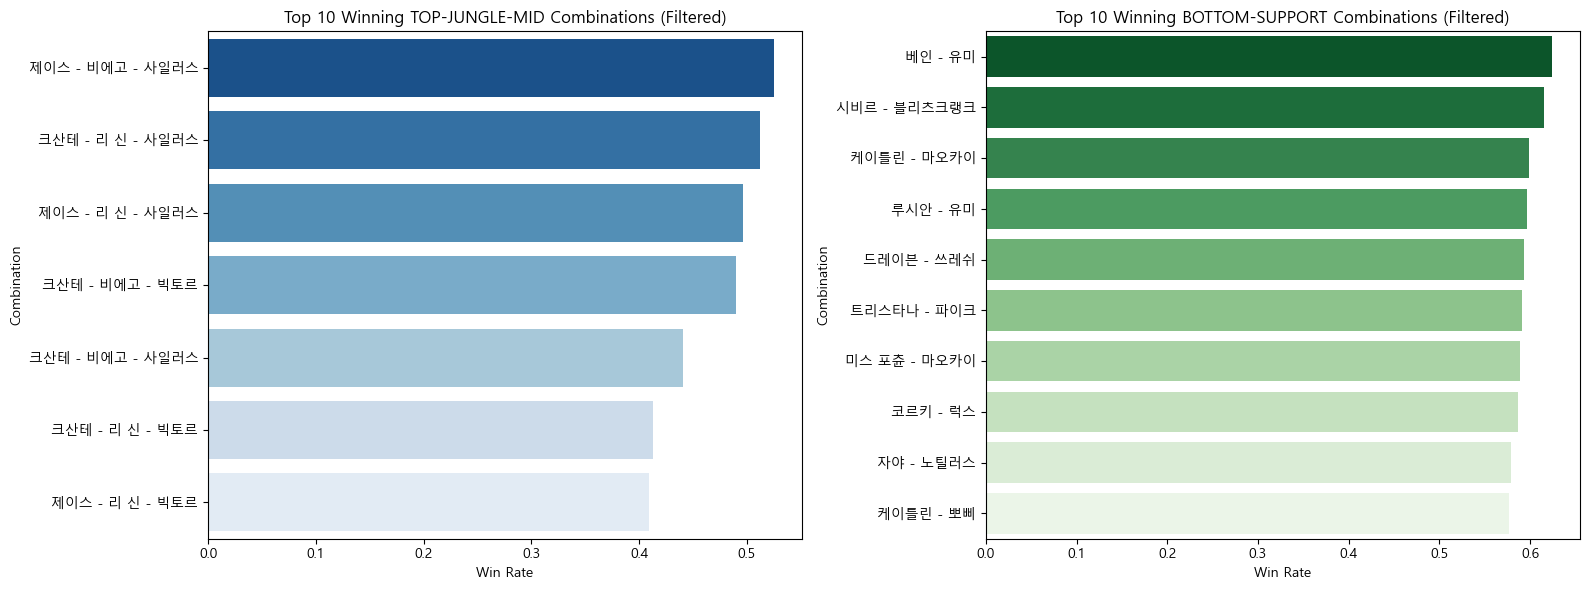

In [ ]:
top_jungle_mid_filtered = top_jungle_mid_stats[top_jungle_mid_stats["count"] >= 100]
bottom_support_filtered = bottom_support_stats[bottom_support_stats["count"] >= 100]

top_jungle_mid_winrate = top_jungle_mid_filtered.nlargest(10, "mean")
bottom_support_winrate = bottom_support_filtered.nlargest(10, "mean")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.barplot(x="mean", y="TOP_JUNGLE_MID", data=top_jungle_mid_winrate, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Winning TOP-JUNGLE-MID Combinations (Filtered)")
axes[0].set_xlabel("Win Rate")
axes[0].set_ylabel("Combination")

sns.barplot(x="mean", y="BOTTOM_SUPPORT", data=bottom_support_winrate, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 Winning BOTTOM-SUPPORT Combinations (Filtered)")
axes[1].set_xlabel("Win Rate")
axes[1].set_ylabel("Combination")

plt.tight_layout()
plt.show()

### 5. 특정 챔피언이 존재하는 팀에 대한 승률 분석

In [ ]:
all_champions = pd.unique(team_com[["TOP", "JUNGLE", "MID", "BOTTOM", "SUPPORT"]].values.ravel())

champion_win_rates = []

for champ in all_champions:
   
    team_with_champ = team_com[
        (team_com["TOP"] == champ) |
        (team_com["JUNGLE"] == champ) |
        (team_com["MID"] == champ) |
        (team_com["BOTTOM"] == champ) |
        (team_com["SUPPORT"] == champ)
    ]
    
   
    team_without_champ = team_com[
        ~((team_com["TOP"] == champ) |
          (team_com["JUNGLE"] == champ) |
          (team_com["MID"] == champ) |
          (team_com["BOTTOM"] == champ) |
          (team_com["SUPPORT"] == champ))
    ]

   
    if len(team_with_champ) > 0 and len(team_without_champ) > 0:
        win_rate_with = team_with_champ["승패"].mean()
        win_rate_without = team_without_champ["승패"].mean()
        win_rate_diff = win_rate_with - win_rate_without

        champion_win_rates.append({"Champion": champ, "Win Rate With": win_rate_with,
                                   "Win Rate Without": win_rate_without, "Win Rate Difference": win_rate_diff})

champion_winrate_df = pd.DataFrame(champion_win_rates)

champion_winrate_df = champion_winrate_df.sort_values(by="Win Rate Difference", ascending=False)

champion_winrate_df

,Champion,Win Rate With,Win Rate Without,Win Rate Difference
74,벡스,0.544198,0.499175,0.045023
160,타릭,0.538653,0.499724,0.038929
38,킨드레드,0.537949,0.499037,0.038912
135,신지드,0.537206,0.499538,0.037668
143,뽀삐,0.532378,0.498334,0.034045
...,...,...,...,...
30,사미라,0.469376,0.500318,-0.030942
75,이블린,0.468837,0.500199,-0.031361
166,스몰더,0.466092,0.500855,-0.034763
116,트위치,0.462668,0.500363,-0.037695


## 3. 티어별 챔피언 랭킹

In [ ]:
df_champ_rank = pd.read_csv('0205champ_list.csv')

In [ ]:
df_champ_rank["Win Rate"] = df_champ_rank["Win Rate"].str.replace("%", "").astype(float) / 100
df_champ_rank["Pick Rate"] = df_champ_rank["Pick Rate"].str.replace("%", "").astype(float) / 100
df_champ_rank["Ban Rate"] = df_champ_rank["Ban Rate"].str.replace("%", "").astype(float) / 100
df_champ_rank["Play Count"] = df_champ_rank["Play Count"].str.replace(",", "").astype(int)

In [ ]:
df_champ_rank['Lane'] = df_champ_rank['Lane'].str.replace('바텀','원딜')

In [ ]:
champ_p = df_champ_rank[df_champ_rank['Tier'] == 'Platinum']
champ_d = df_champ_rank[df_champ_rank['Tier'] == 'Diamond']
champ_e = df_champ_rank[df_champ_rank['Tier'] == 'Emerald']
champ_m = df_champ_rank[df_champ_rank['Tier'] == 'Master']

### 1. 티어별 랭킹 200위에서 주챔피언들의 승률 및 플레이 횟수 확인

|티어|Top 5 챔피언(포지션)|
|-|-|
|Platinum|이즈리얼(원딜), 리신(정글), 제이스(탑), 비에고(정글), 요네(미드)|
|Emerald|리신(정글), 미스 포츈(원딜), 이즈리얼(원딜), 빅토르(미드), 제이스(탑)|
|Diamond|리신(정글), 이즈리얼(원딜),미스 포츈(원딜), 제이스(탑), 엘리스(정글)|
|Master|리신(정글), 이즈리얼(원딜),코르키(원딜), 빅토르(미드), 제이스(탑)|


Platinum 티어

In [ ]:
print(champ_p[(champ_p['Champion Name'] == '이즈리얼') & (champ_p['Lane'] == '원딜')])
print(champ_p[(champ_p['Champion Name'] == '리 신') & (champ_p['Lane'] == '정글')])
print(champ_p[(champ_p['Champion Name'] == '제이스') & (champ_p['Lane'] == '탑')])
print(champ_p[(champ_p['Champion Name'] == '비에고') & (champ_p['Lane'] == '정글')])
print(champ_p[(champ_p['Champion Name'] == '요네') & (champ_p['Lane'] == '미드')])

        Tier  Rank Champion Name Lane  Win Rate  Play Count
81  Platinum    82          이즈리얼   원딜     49.21      703208
       Tier  Rank Champion Name Lane  Win Rate  Play Count
2  Platinum     3           리 신   정글     49.74      553026
        Tier  Rank Champion Name Lane  Win Rate  Play Count
76  Platinum    77           제이스    탑     49.17      183700
       Tier  Rank Champion Name Lane  Win Rate  Play Count
4  Platinum     5           비에고   정글      50.6      359595
        Tier  Rank Champion Name Lane  Win Rate  Play Count
71  Platinum    72            요네   미드     49.18      244617


Emerald 티어

In [ ]:
print(champ_e[(champ_e['Champion Name'] == '리 신') & (champ_e['Lane'] == '정글')])
print(champ_e[(champ_e['Champion Name'] == '미스 포츈') & (champ_e['Lane'] == '원딜')])
print(champ_e[(champ_e['Champion Name'] == '이즈리얼') & (champ_e['Lane'] == '원딜')])
print(champ_e[(champ_e['Champion Name'] == '빅토르') & (champ_e['Lane'] == '미드')])
print(champ_e[(champ_e['Champion Name'] == '제이스') & (champ_e['Lane'] == '탑')])

        Tier  Rank Champion Name Lane  Win Rate  Play Count
254  Emerald     4           리 신   정글      49.7      125568
        Tier  Rank Champion Name Lane  Win Rate  Play Count
251  Emerald     1         미스 포츈   원딜      53.8       75056
        Tier  Rank Champion Name Lane  Win Rate  Play Count
278  Emerald    28          이즈리얼   원딜     49.21      145593
        Tier  Rank Champion Name Lane  Win Rate  Play Count
292  Emerald    42           빅토르   미드     49.23       40353
        Tier  Rank Champion Name Lane  Win Rate  Play Count
252  Emerald     2           제이스    탑     50.01       57349


Diamond 티어

In [ ]:
print(champ_d[(champ_d['Champion Name'] == '리 신') & (champ_d['Lane'] == '정글')])
print(champ_d[(champ_d['Champion Name'] == '이즈리얼') & (champ_d['Lane'] == '원딜')])
print(champ_d[(champ_d['Champion Name'] == '미스 포츈') & (champ_d['Lane'] == '원딜')])
print(champ_d[(champ_d['Champion Name'] == '제이스') & (champ_d['Lane'] == '탑')])
print(champ_d[(champ_d['Champion Name'] == '엘리스') & (champ_d['Lane'] == '정글')])

        Tier  Rank Champion Name Lane  Win Rate  Play Count
496  Diamond     4           리 신   정글     49.55       43890
        Tier  Rank Champion Name Lane  Win Rate  Play Count
509  Diamond    17          이즈리얼   원딜     49.02       51474
        Tier  Rank Champion Name Lane  Win Rate  Play Count
495  Diamond     3         미스 포츈   원딜     53.35       27726
        Tier  Rank Champion Name Lane  Win Rate  Play Count
493  Diamond     1           제이스    탑     50.06       21152
        Tier  Rank Champion Name Lane  Win Rate  Play Count
619  Diamond   127           엘리스   정글     48.86        4427


Master 티어

In [ ]:
print(champ_m[(champ_m['Champion Name'] == '리 신') & (champ_m['Lane'] == '정글')])
print(champ_m[(champ_m['Champion Name'] == '이즈리얼') & (champ_m['Lane'] == '원딜')])
print(champ_m[(champ_m['Champion Name'] == '코르키') & (champ_m['Lane'] == '원딜')])
print(champ_m[(champ_m['Champion Name'] == '빅토르') & (champ_m['Lane'] == '미드')])
print(champ_m[(champ_m['Champion Name'] == '제이스') & (champ_m['Lane'] == '탑')])

       Tier  Rank Champion Name Lane  Win Rate  Play Count
742  Master     3           리 신   정글     49.76       12130
       Tier  Rank Champion Name Lane  Win Rate  Play Count
757  Master    18          이즈리얼   원딜     49.15       15144
       Tier  Rank Champion Name Lane  Win Rate  Play Count
760  Master    21           코르키   원딜     50.34        7013
       Tier  Rank Champion Name Lane  Win Rate  Play Count
765  Master    26           빅토르   미드     48.77        3810
       Tier  Rank Champion Name Lane  Win Rate  Play Count
740  Master     1           제이스    탑     50.07        6603


확인 결과, 각 티어에서 가장 많이 사용되는 챔피언(라인)과 실제 챔피언의 승률 및 플레이 횟수의 순위가 일차하지는 않는 것으로 보임.

### 2. 티어별 챔피언 선택 경향 비교

Platinum 티어

In [ ]:
champ_p[:5]

,Tier,Rank,Champion Name,Lane,Win Rate,Play Count
0,Platinum,1,미스 포츈,원딜,53.99,495304
1,Platinum,2,녹턴,정글,52.63,229182
2,Platinum,3,리 신,정글,49.74,553026
3,Platinum,4,말자하,미드,52.93,110277
4,Platinum,5,비에고,정글,50.60,359595


In [ ]:
tier_p['주챔피언'].value_counts().head()

주챔피언
이즈리얼    18
리 신     14
제이스      6
비에고      6
요네       5
Name: count, dtype: int64

Emerald 티어

In [ ]:
champ_e[:5]

,Tier,Rank,Champion Name,Lane,Win Rate,Play Count
251,Emerald,1,미스 포츈,원딜,53.80,75056
252,Emerald,2,제이스,탑,50.01,57349
253,Emerald,3,비에고,정글,50.27,88163
254,Emerald,4,리 신,정글,49.70,125568
255,Emerald,5,룰루,서폿,50.86,53281


In [ ]:
tier_e['주챔피언'].value_counts().head()

주챔피언
리 신      14
미스 포츈    11
이즈리얼     10
빅토르       6
제이스       6
Name: count, dtype: int64

Diamond 티어

In [ ]:
champ_d[:5]

,Tier,Rank,Champion Name,Lane,Win Rate,Play Count
493,Diamond,1,제이스,탑,50.06,21152
494,Diamond,2,비에고,정글,50.27,35095
495,Diamond,3,미스 포츈,원딜,53.35,27726
496,Diamond,4,리 신,정글,49.55,43890
497,Diamond,5,렐,서폿,51.84,16546


In [ ]:
tier_d['주챔피언'].value_counts().head()

주챔피언
리 신      14
이즈리얼      8
제이스       7
미스 포츈     6
엘리스       5
Name: count, dtype: int64

Master 티어

In [ ]:
champ_m[:5]

,Tier,Rank,Champion Name,Lane,Win Rate,Play Count
740,Master,1,제이스,탑,50.07,6603
741,Master,2,비에고,정글,49.81,11894
742,Master,3,리 신,정글,49.76,12130
743,Master,4,렐,서폿,52.61,6793
744,Master,5,미스 포츈,원딜,52.69,9137


In [ ]:
tier_m['주챔피언'].value_counts().head()

주챔피언
리 신     10
이즈리얼     9
코르키      9
빅토르      9
제이스      9
Name: count, dtype: int64

확인 결과, 각 티어별 챔피언 랭킹과 top200 유저가 많이 사용하는 챔피언이 동일하지는 않으나 겹치는 부분이 있음

### 3. 라인별 승률, 픽률, 벤률 비교

In [ ]:
champ_summary = df_champ_rank.groupby("Lane").agg({
    "Win Rate": ["mean", "max", "min"],
    "Pick Rate": ["mean", "max", "min"],
    "Ban Rate": ["mean", "max", "min"],
    "Play Count": ["sum"]
}).reset_index()

team_com["승패"] = team_com["승패"].astype(int)
win_rates_by_combination = team_com.groupby(["TOP", "JUNGLE", "MID", "BOTTOM", "SUPPORT"])["승패"].mean().reset_index()
win_rates_by_combination.rename(columns={"승패": "Win Rate"}, inplace=True)

champ_summary

Lane  Win Rate                 Pick Rate                  Ban Rate          \
            mean     max     min      mean     max     min      mean     max   
0   미드  0.504792  0.5646  0.4340  0.034945  0.1354  0.0050  0.068429  0.7212   
1   서폿  0.499778  0.5459  0.4240  0.038633  0.1688  0.0051  0.076883  0.7212   
2   원딜  0.503971  0.5848  0.4361  0.066625  0.3981  0.0051  0.077322  0.7212   
3   정글  0.498190  0.5505  0.4131  0.042091  0.3434  0.0051  0.058596  0.4620   
4    탑  0.500821  0.5652  0.4286  0.029568  0.1641  0.0051  0.062461  0.7212   

          Play Count  
      min        sum  
0  0.0010    4934133  
1  0.0002    5013842  
2  0.0008    5162214  
3  0.0006    5091439  
4  0.0006    4978138

- 라인별 평균 승률 <br><br>

미드: 평균 50.48%, 최대 56.46% (최고 성능 챔피언), 최소 43.40%<br>
바텀 : 평균 50.40%, 최대 58.48%, 최소 43.61%<br>
서포터 : 평균 49.98%, 최대 54.59%, 최소 42.40%<br>
정글 : 평균 49.82%, 최대 55.05%, 최소 41.31%<br>
탑 : 평균 50.08%, 최대 56.52%, 최소 42.86%<br>
<br><br><br>

- 픽률 <br><br>

바텀 라인의 픽률이 가장 높음 (평균 6.66%), 최대 39.81%<br>
탑 라인의 픽률이 가장 낮음 (평균 2.96%), 최대 16.41%<br>
픽률이 높은 챔피언일수록 승률이 반드시 높은 것은 아님.<br>
<br><br><br>

- 밴률<br><br>

미드 및 바텀 라인이 상대적으로 높은 밴률을 보임.<br>
일부 챔피언은 최대 72.12% 밴률을 기록.<br>
<br><br><br>

- 플레이 횟수<br><br>

전체 플레이 횟수는 라인별로 큰 차이가 없으나, 미드와 바텀이 가장 많이 플레이됨.

### 4. 티어별 승률, 픽률, 밴률 비교

In [ ]:
tier_champ_summary = df_champ_rank.groupby("Tier").agg({
    "Win Rate": ["mean", "max", "min"],
    "Pick Rate": ["mean", "max", "min"],
    "Ban Rate": ["mean", "max", "min"],
    "Play Count": ["sum"]
}).reset_index()

tier_champ_summary

Tier  Win Rate                 Pick Rate                  Ban Rate  \
                 mean     max     min      mean     max     min      mean   
0   Diamond  0.502168  0.5684  0.4340  0.039181  0.3918  0.0050  0.066036   
1   Emerald  0.501821  0.5425  0.4166  0.039821  0.3981  0.0052  0.068358   
2    Master  0.501353  0.5848  0.4131  0.041217  0.3764  0.0051  0.067934   
3  Platinum  0.500164  0.5427  0.4321  0.038040  0.3358  0.0051  0.068833   

                  Play Count  
      max     min        sum  
0  0.6939  0.0003    1271665  
1  0.7212  0.0003    3524092  
2  0.7055  0.0002     388028  
3  0.6536  0.0007   19995981

1. 티어별 평균 승률<br>
Diamond: 평균 50.22%, 최고 56.84%, 최저 43.40%<br>
Emerald: 평균 50.18%, 최고 54.25%, 최저 41.66%<br>
Master: 평균 50.14%, 최고 58.48%, 최저 41.31%<br>
Platinum: 평균 50.01%, 최고 54.27%, 최저 43.21%<br>
결론: 티어가 올라갈수록 승률 차이가 줄어들며 50% 수준에서 균형을 이룸.<br><br>

2. 티어별 픽률<br>
Master 티어에서 픽률이 가장 높으며 최대 37.64%<br>
Emerald 티어에서는 바텀 챔피언의 픽률이 가장 높음 (최대 39.81%)<br>
Diamond 티어에서는 특정 챔피언 픽률이 39.18%로 높은 편<br>
결론: 높은 티어일수록 챔피언을 다양하게 활용하지만 특정 챔피언이 여전히 인기.<br><br>

3. 티어별 밴률<br>
밴률이 가장 높은 티어: Emerald(72.12%) > Master(70.55%) > Diamond(69.39%) <br>
Platinum에서도 65.36% 밴률을 기록하는 챔피언 존재.<br>
결론: 티어가 높을수록 밴률이 중요한 변수로 작용하며 특정 챔피언이 반복적으로 밴됨.<br>

4. 플레이 횟수<br>
Platinum 티어의 플레이 횟수가 가장 많음 (약 19,995,981 게임)<br>
Master 티어의 총 플레이 횟수는 상대적으로 적음 (약 388,028 게임)<br>
결론: 플레이 횟수는 낮을수록 승률과 픽률의 변동성이 커질 가능성이 있음.<br>

### 5. 승률 / 픽률 / 밴률이 높은 챔피언

In [ ]:
top_win_rate_champions = df_champ_rank.sort_values(by="Win Rate", ascending=False).head(10)

top_pick_rate_champions = df_champ_rank.sort_values(by="Pick Rate", ascending=False).head(10)

top_ban_rate_champions = df_champ_rank.sort_values(by="Ban Rate", ascending=False).head(10)

In [ ]:
top_win_rate_champions

,Tier,Rank,Champion Name,Lane,Win Rate,Pick Rate,Ban Rate,Play Count
859,Master,120,닐라,원딜,0.5848,0.0085,0.0022,342
574,Diamond,82,닐라,원딜,0.5684,0.0086,0.0038,1126
796,Master,57,우르곳,탑,0.5652,0.0212,0.0032,851
828,Master,89,럼블,미드,0.5646,0.0052,0.0480,209
825,Master,86,애니비아,미드,0.5584,0.0117,0.0073,471
767,Master,28,뽀삐,탑,0.5519,0.0230,0.2458,924
578,Diamond,86,카시오페아,원딜,0.5508,0.0116,0.1285,1527
822,Master,83,아이번,정글,0.5505,0.0121,0.0036,485
827,Master,88,카시오페아,원딜,0.5497,0.0155,0.1061,624
538,Diamond,46,케넨,탑,0.5489,0.0224,0.0180,2937


In [ ]:
top_ban_rate_champions

,Tier,Rank,Champion Name,Lane,Win Rate,Pick Rate,Ban Rate,Play Count
461,Emerald,211,멜,서폿,0.4809,0.0267,0.7212,9755
463,Emerald,213,멜,탑,0.4844,0.0075,0.7212,2754
351,Emerald,101,멜,미드,0.4836,0.0845,0.7212,30897
395,Emerald,145,멜,원딜,0.4952,0.0190,0.7212,6942
773,Master,34,멜,미드,0.4821,0.0784,0.7055,3153
917,Master,178,멜,서폿,0.4767,0.0224,0.7055,900
779,Master,40,멜,원딜,0.5103,0.0361,0.7055,1452
705,Diamond,213,멜,서폿,0.4629,0.0237,0.6939,3115
569,Diamond,77,멜,원딜,0.4960,0.0249,0.6939,3276
554,Diamond,62,멜,미드,0.4818,0.0812,0.6939,10674


In [ ]:
top_pick_rate_champions

,Tier,Rank,Champion Name,Lane,Win Rate,Pick Rate,Ban Rate,Play Count
278,Emerald,28,이즈리얼,원딜,0.4921,0.3981,0.1481,145593
509,Diamond,17,이즈리얼,원딜,0.4902,0.3918,0.1620,51474
757,Master,18,이즈리얼,원딜,0.4915,0.3764,0.1788,15144
254,Emerald,4,리 신,정글,0.4970,0.3434,0.3996,125568
81,Platinum,82,이즈리얼,원딜,0.4921,0.3358,0.1264,703208
496,Diamond,4,리 신,정글,0.4955,0.3340,0.3626,43890
742,Master,3,리 신,정글,0.4976,0.3015,0.2949,12130
741,Master,2,비에고,정글,0.4981,0.2956,0.2959,11894
494,Diamond,2,비에고,정글,0.5027,0.2671,0.2597,35095
2,Platinum,3,리 신,정글,0.4974,0.2641,0.3541,553026


1. 승률이 높은 챔피언 (TOP 10) <br>
Emerald와 Master 티어에서 멜의 승률이 높은 편<br>
미드, 서폿, 원딜에서 멜의 승률이 48~49% 수준으로, 픽률 대비 승률이 안정적.<br><br>

2. 픽률이 높은 챔피언 (TOP 10)<br>
높은 픽률을 가진 챔피언들이 반드시 높은 승률을 기록하는 것은 아님.<br>
특정 챔피언의 픽률이 약 39% 이상으로, 특정 메타에서 강세를 보이는 챔피언이 존재.<br><br>

3. 밴률이 높은 챔피언 (TOP 10)<br>
멜이 밴률 72.12%로 가장 높은 챔피언으로 확인됨.<br>
특정 티어에서는 밴률 70% 이상의 챔피언이 몇 명 존재, 이들은 경기에서 강력한 영향력을 발휘할 가능성이 높음.<br>

### 6. 승률이 높은 조합과 낮은 조합 확인
- 조합 자체의 등장이 적어 승률이 100% 혹은 0%로 나오는 조합 제외하고 확인

In [ ]:
valid_combinations = win_rates_by_combination[(win_rates_by_combination["Win Rate"] < 1.0) & (win_rates_by_combination["Win Rate"] > 0.0)]

top_valid_combinations = valid_combinations.sort_values(by="Win Rate", ascending=False).head(10)

bottom_valid_combinations = valid_combinations.sort_values(by="Win Rate", ascending=True).head(10)

In [ ]:
top_valid_combinations

,TOP,JUNGLE,MID,BOTTOM,SUPPORT,Win Rate
85457,암베사,리 신,빅토르,징크스,룰루,0.750000
124276,제이스,리 신,사일러스,미스 포츈,렐,0.750000
86935,암베사,비에고,갈리오,이즈리얼,카르마,0.666667
27918,럼블,바이,야스오,케이틀린,룰루,0.666667
122936,제이스,니달리,요네,이즈리얼,카르마,0.666667
80520,아트록스,비에고,사일러스,징크스,룰루,0.666667
126756,제이스,비에고,리산드라,케이틀린,럭스,0.666667
21456,다리우스,리 신,사일러스,징크스,룰루,0.666667
14722,나르,리 신,사일러스,케이틀린,럭스,0.666667
85785,암베사,리 신,오로라,카이사,노틸러스,0.666667


In [ ]:
bottom_valid_combinations

,TOP,JUNGLE,MID,BOTTOM,SUPPORT,Win Rate
148450,크산테,비에고,빅토르,이즈리얼,카르마,0.200000
145820,크산테,리 신,블라디미르,카이사,노틸러스,0.200000
146390,크산테,리 신,오로라,이즈리얼,카르마,0.250000
124469,제이스,리 신,아리,징크스,룰루,0.250000
128806,제이스,신 짜오,사일러스,이즈리얼,카르마,0.250000
27821,럼블,바이,빅토르,이즈리얼,카르마,0.250000
145981,크산테,리 신,사일러스,징크스,쓰레쉬,0.250000
148505,크산테,비에고,사일러스,바루스,렐,0.250000
127010,제이스,비에고,사일러스,이즈리얼,카르마,0.250000
14641,나르,리 신,빅토르,미스 포츈,노틸러스,0.333333


1. 승률이 높은 유효 챔피언 조합 <br>
게임 횟수가 충분한 조합 중, 승률이 높은 조합을 추출하여 확인해 본 결과,<br>
특정 챔피언(정글과 미드 조합)이 지속적으로 높은 승률을 기록하는 패턴이 있음.<br>
정확한 분석을 위해 머신러닝 회귀 분석을 추가 적용할 필요가 있음.<br><br>

2. 승률이 낮은 유효 챔피언 조합<br>
게임 횟수가 적은 조합을 제외한 상태에서도, 크산테(탑) - 리신(정글) - 이즈리얼(바텀) - 카르마마(서포트) 조합과 같은 조합이 지속적으로 낮은 승률을 보임.
특정 챔피언 조합이 메타와 맞지 않거나 조합의 시너지 부족으로 낮은 승률을 기록하는 것으로 보임. <br>
마찬가지로, 정확한 분석을 위해 머신러닝 회귀 분석을 추가 적용할 필요가 있음.